## Telecom Churn Prediction

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

#Metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix

#Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

Data Understanding, Preparation and Preprocessing:

In [ ]:
train = pd.read_csv("train.csv")

In [ ]:
pd.set_option('display.max_columns', 250)
pd.set_option('display.max_rows', 250)

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# Basic summary
print("Number of rows:", train.shape[0])
print("Number of columns:", train.shape[1])

# Displaying column names
print("Column names:", train.columns.tolist())

# Display the first few rows
print("First few rows:\n", train.head())

# Display data types of columns
print("Data types:\n", train.dtypes)

# Display summary statistics
print("Summary statistics:\n", train.describe())

# Check for missing values
print("Missing values:\n", train.isnull().sum())

Number of rows: 69999
Number of columns: 172
Column names: ['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mo

In [ ]:
empty_rows = train.isnull().all(axis=1).sum()
print(empty_rows)
empty_columns = train.isnull().all(axis=0).sum()
print(empty_columns)


0
0


In [ ]:
train['churn_probability'].value_counts()/train.shape[0]

churn_probability
0    0.898113
1    0.101887
Name: count, dtype: float64

Heavily imbalanced dataset

In [ ]:
#compute_weights sklearn - each sample will have it's own weight

Some of these rows may not have equal amounts of data: Handle Missing Values via median imputation

In [ ]:
# Calculate the percentage of missing values for each column
missing_values = train.isnull().sum() / len(train) * 100
print("Missing values percentage:\n", missing_values[missing_values > 0].sort_values(ascending=False))

# Drop columns with a high percentage of missing values if necessary
# Drop columns with more than 70% missing values
columns_to_drop = missing_values[missing_values > 70].index
train_cleaned = train.drop(columns=columns_to_drop)

print("Data after handling missing values:\n", train_cleaned.isnull().sum().sum())

Missing values percentage:
 max_rech_data_6             74.902499
fb_user_6                   74.902499
date_of_last_rech_data_6    74.902499
av_rech_amt_data_6          74.902499
night_pck_user_6            74.902499
count_rech_2g_6             74.902499
total_rech_data_6           74.902499
arpu_2g_6                   74.902499
count_rech_3g_6             74.902499
arpu_3g_6                   74.902499
arpu_3g_7                   74.478207
count_rech_2g_7             74.478207
av_rech_amt_data_7          74.478207
max_rech_data_7             74.478207
total_rech_data_7           74.478207
arpu_2g_7                   74.478207
date_of_last_rech_data_7    74.478207
night_pck_user_7            74.478207
fb_user_7                   74.478207
count_rech_3g_7             74.478207
total_rech_data_8           73.689624
max_rech_data_8             73.689624
date_of_last_rech_data_8    73.689624
count_rech_2g_8             73.689624
fb_user_8                   73.689624
arpu_3g_8             

In [ ]:
missing_val = train_cleaned.isnull().sum() / len(train_cleaned) * 100

In [ ]:
missing_val

id                      0.000000
circle_id               0.000000
loc_og_t2o_mou          1.002871
std_og_t2o_mou          1.002871
loc_ic_t2o_mou          1.002871
last_date_of_month_6    0.000000
last_date_of_month_7    0.570008
last_date_of_month_8    1.047158
arpu_6                  0.000000
arpu_7                  0.000000
arpu_8                  0.000000
onnet_mou_6             3.954342
onnet_mou_7             3.838626
onnet_mou_8             5.290076
offnet_mou_6            3.954342
offnet_mou_7            3.838626
offnet_mou_8            5.290076
roam_ic_mou_6           3.954342
roam_ic_mou_7           3.838626
roam_ic_mou_8           5.290076
roam_og_mou_6           3.954342
roam_og_mou_7           3.838626
roam_og_mou_8           5.290076
loc_og_t2t_mou_6        3.954342
loc_og_t2t_mou_7        3.838626
loc_og_t2t_mou_8        5.290076
loc_og_t2m_mou_6        3.954342
loc_og_t2m_mou_7        3.838626
loc_og_t2m_mou_8        5.290076
loc_og_t2f_mou_6        3.954342
loc_og_t2f

In [ ]:
#imputation:
train_cleaned.shape

(69999, 142)

In [ ]:
missing_val

id                      0.000000
circle_id               0.000000
loc_og_t2o_mou          1.002871
std_og_t2o_mou          1.002871
loc_ic_t2o_mou          1.002871
last_date_of_month_6    0.000000
last_date_of_month_7    0.570008
last_date_of_month_8    1.047158
arpu_6                  0.000000
arpu_7                  0.000000
arpu_8                  0.000000
onnet_mou_6             3.954342
onnet_mou_7             3.838626
onnet_mou_8             5.290076
offnet_mou_6            3.954342
offnet_mou_7            3.838626
offnet_mou_8            5.290076
roam_ic_mou_6           3.954342
roam_ic_mou_7           3.838626
roam_ic_mou_8           5.290076
roam_og_mou_6           3.954342
roam_og_mou_7           3.838626
roam_og_mou_8           5.290076
loc_og_t2t_mou_6        3.954342
loc_og_t2t_mou_7        3.838626
loc_og_t2t_mou_8        5.290076
loc_og_t2m_mou_6        3.954342
loc_og_t2m_mou_7        3.838626
loc_og_t2m_mou_8        5.290076
loc_og_t2f_mou_6        3.954342
loc_og_t2f

In [ ]:
#Because these values are quite less in terms of % i will use simple imputer. I would use a multi-variate imputer in the case where the % levels were higher that were null because simple imputer affects the kurtosis
from sklearn.impute import SimpleImputer

# Select numerical columns
numerical_cols = train_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Impute missing values with the median
imputer_num = SimpleImputer(strategy='median')
train_cleaned[numerical_cols] = imputer_num.fit_transform(train_cleaned[numerical_cols])


In [ ]:
# Select categorical columns
categorical_cols = train_cleaned.select_dtypes(include=['object']).columns

# Impute missing values with the most frequent value (mode)
imputer_cat = SimpleImputer(strategy='most_frequent')
train_cleaned[categorical_cols] = imputer_cat.fit_transform(train_cleaned[categorical_cols])


In [ ]:
print("Data after handling missing values:\n", train_cleaned.isnull().sum().sum())


Data after handling missing values:
 0


In [ ]:
train_cleaned.shape

(69999, 142)

In [ ]:
non_numeric_cols = train.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

Non-numeric columns: Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')


In [ ]:
print(train_cleaned.columns)

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'churn_probability'],
      dtype='object', length=142)


In [ ]:
#from dataset we know there are total values for some features. so lets make total data recharge

train_cleaned['total_recharge_amount'] = train_cleaned['total_rech_amt_6'] + train_cleaned['total_rech_amt_7'] + train_cleaned['total_rech_amt_8']



<ipython-input-19-00773c141cf7>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_cleaned['total_recharge_amount'] = train_cleaned['total_rech_amt_6'] + train_cleaned['total_rech_amt_7'] + train_cleaned['total_rech_amt_8']


In [ ]:
#lets get an idea of the threshold of high-value customers which the problem statement is centered around
print(train_cleaned['total_recharge_amount'].quantile(0.75))

1244.0


In [ ]:
#Retain records which have more than 70% for filterings high value peoples

train_cleaned_filtered = train_cleaned.loc[train_cleaned['total_recharge_amount'] >= train_cleaned['total_recharge_amount'].quantile(0.75), :]
train_cleaned_filtered = train_cleaned_filtered.reset_index(drop = True)
#no filtering on test data
train_test_cleaned_filtered = train_cleaned.reset_index(drop = True)

In [ ]:
drop_high_val = ['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8']
train_cleaned_filtered = train_cleaned_filtered.drop(columns=drop_high_val,axis=1)
train_test_cleaned_filtered = train_test_cleaned_filtered.drop(columns=drop_high_val,axis=1)

In [ ]:
train_cleaned_filtered.shape

(17523, 140)

In [ ]:
#more feature engineering:
#the ratio of ONNET calls to OFFNET calls
train_cleaned_filtered['onnet_offnet_ratio'] = train_cleaned_filtered['onnet_mou_6'] / train_cleaned_filtered['offnet_mou_6']

In [ ]:
#total incoming/out going minutes of usage from data dict
train_cleaned_filtered['total_calls_mou_8'] = train_cleaned_filtered['total_ic_mou_8'] + train_cleaned_filtered['total_og_mou_8']

In [ ]:
#2g and 3g consumption
train_cleaned_filtered['2g_3g_consumption'] = train_cleaned_filtered['vol_2g_mb_8'] + train_cleaned_filtered['vol_3g_mb_8']


In [ ]:
# we check in next part to see if calls or internet was not used in month 8, by then these customers have churned. thus what is the probability:
train_cleaned_filtered['churn_probability'] = train_cleaned_filtered.apply(lambda row: 1 if row['total_calls_mou_8'] == 0 and row['2g_3g_consumption'] == 0 else 0, axis=1)

In [ ]:
#Drop derived values and turn churn into a categorical value
train_cleaned_filtered['churn_probability'] = train_cleaned_filtered['churn_probability'].astype('category')
print("Ratio of Churn:")
print(train_cleaned_filtered['churn_probability'].value_counts()*100/train_cleaned_filtered.shape[0])

Ratio of Churn:
churn_probability
0    96.872682
1     3.127318
Name: count, dtype: float64


In [ ]:
train_cleaned_filtered.describe()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  17523.000000    17523.0         17523.0         17523.0   
mean   35138.268276      109.0             0.0             0.0   
std    20167.301758        0.0             0.0             0.0   
min       12.000000      109.0             0.0             0.0   
25%    17732.500000      109.0             0.0             0.0   
50%    35352.000000      109.0             0.0             0.0   
75%    52486.000000      109.0             0.0             0.0   
max    69996.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         17523.0  17523.000000  17523.000000  17523.000000  17523.000000   
mean              0.0    614.923205    638.554834    627.938209    313.627861   
std               0.0    492.142889    505.172422    530.062754    489.220263   
min               0.0  -2258.709000  -1289.715000   -945.808000      0.000000   
25%               0.0    378.664000    406.442000    393.713000     41.905000   
50%               0.0    524.494000    542.446000    537.550000    131.680000   
75%               0.0    747.689500    754.262500    750.296000    367.950000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  17523.000000  17523.000000  17523.000000  17523.000000  17523.000000   
mean     337.355794    320.862896    443.909846    465.551434    446.615800   
std      519.453832    515.864149    494.469160    506.263273    509.133929   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       47.320000     41.640000    140.910000    153.745000    139.790000   
50%      142.880000    131.290000    297.910000    316.790000    301.910000   
75%      413.100000    378.740000    561.985000    598.175000    571.710000   
max     8157.780000  10752.560000   8362.360000   7043.980000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   17523.000000   17523.000000   17523.000000   17523.000000   
mean       18.340292      14.647979      14.784626      32.261571   
std        81.133127      83.086631      80.144806     129.316795   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2613.310000    3813.290000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   17523.000000   17523.000000      17523.000000      17523.000000   
mean       24.111362      24.769909         98.948539        103.086629   
std       105.376998     118.240872        248.122707        266.629169   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          9.235000         10.830000   
50%         0.000000       0.000000         33.690000         36.380000   
75%         0.000000       0.000000         95.635000         98.300000   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      17523.000000      17523.000000      17523.000000      17523.000000   
mean          99.199238        191.134035        193.878713        189.988123   
std          261.954369        262.938422        247.528025        244.432667   
min            0.000000          0.000000          0.000000          0.000000   
25%            9.960000         32.990000         38.785000         35.835000   
50%           35.110000        105.290000        113.160000        110.480000   
75%           97.095000        252.940000        257.560000        256.645000   
max        10752.560000       4696

Everything below is experimental work from before


ValueError: supplied range of [0.0, inf] is not finite

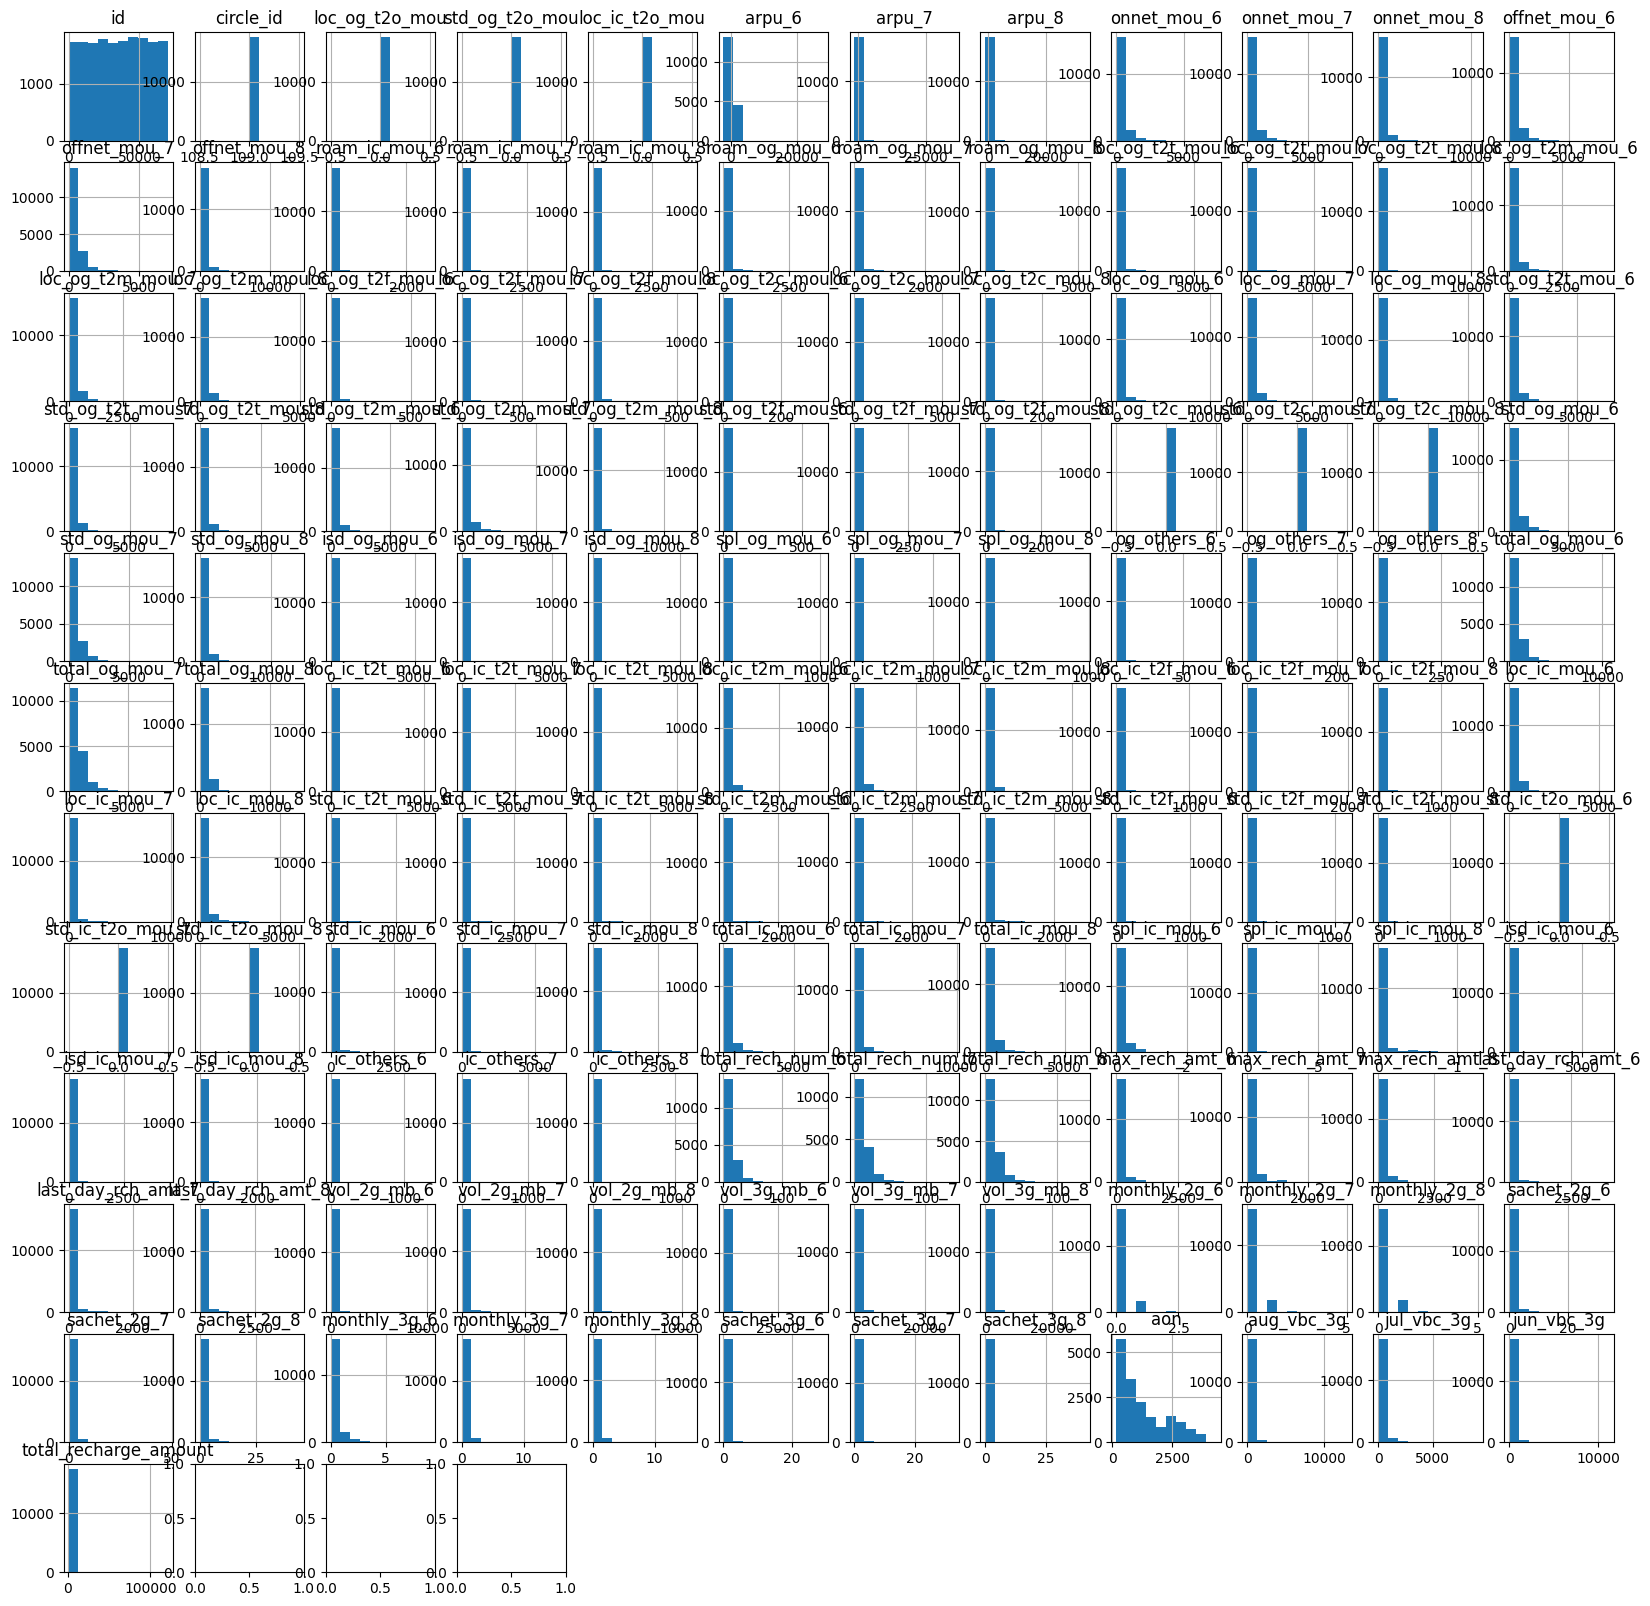

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of numerical columns
train_cleaned_filtered.hist(figsize=(20, 20))
plt.show()

# Distribution of categorical columns
categorical_columns = train_cleaned_filtered.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=train_cleaned_filtered, x=col)
    plt.xticks(rotation=90)
    plt.show()


In [ ]:
numeric_columns = train_cleaned.select_dtypes(include=['float64', 'int64']).columns

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='date_of_last_rech_6', ylabel='count'>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, '6/29/2014'),
  Text(1, 0, '6/27/2014'),
  Text(2, 0, '6/30/2014'),
  Text(3, 0, '6/22/2014'),
  Text(4, 0, '6/28/2014'),
  Text(5, 0, '6/18/2014'),
  Text(6, 0, '6/26/2014'),
  Text(7, 0, '6/25/2014'),
  Text(8, 0, '6/23/2014'),
  Text(9, 0, '6/17/2014'),
  Text(10, 0, '6/24/2014'),
  Text(11, 0, '6/21/2014'),
  Text(12, 0, '6/20/2014'),
  Text(13, 0, '6/10/2014'),
  Text(14, 0, '6/19/2014'),
  Text(15, 0, '6/12/2014'),
  Text(16, 0, '6/14/2014'),
  Text(17, 0, '6/16/2014'),
  Text(18, 0, '6/4/2014'),
  Text(19, 0, '6/8/2014'),
  Text(20, 0, '6/11/2014'),
  Text(21, 0, '6/6/2014'),
  Text(22, 0, '6/3/2014'),
  Text(23, 0, '6/1/2014'),
  Text(24, 0, '6/13/2014'),
  Text(25, 0, '6/15/2014'),
  Text(26, 0, '6/5/2014'),
  Text(27, 0, '6/7/2014'),
  Text(28, 0, '6/2/2014'),
  Text(29, 0, '6/9/2014')])

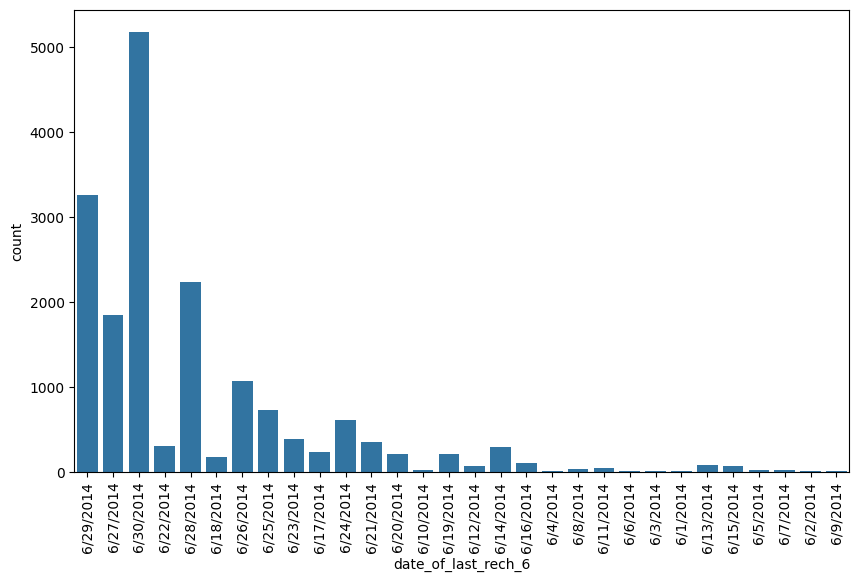

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='date_of_last_rech_7', ylabel='count'>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 [Text(0, 0, '7/30/2014'),
  Text(1, 0, '7/25/2014'),
  Text(2, 0, '7/31/2014'),
  Text(3, 0, '7/29/2014'),
  Text(4, 0, '7/20/2014'),
  Text(5, 0, '7/26/2014'),
  Text(6, 0, '7/12/2014'),
  Text(7, 0, '7/28/2014'),
  Text(8, 0, '7/24/2014'),
  Text(9, 0, '7/21/2014'),
  Text(10, 0, '7/23/2014'),
  Text(11, 0, '7/27/2014'),
  Text(12, 0, '7/17/2014'),
  Text(13, 0, '7/15/2014'),
  Text(14, 0, '7/16/2014'),
  Text(15, 0, '7/22/2014'),
  Text(16, 0, '7/19/2014'),
  Text(17, 0, '7/9/2014'),
  Text(18, 0, '7/14/2014'),
  Text(19, 0, '7/2/2014'),
  Text(20, 0, '7/18/2014'),
  Text(21, 0, '7/11/2014'),
  Text(22, 0, '7/8/2014'),
  Text(23, 0, '7/3/2014'),
  Text(24, 0, '7/6/2014'),
  Text(25, 0, '7/13/2014'),
  Text(26, 0, '7/10/2014'),
  Text(27, 0, '7/1/2014'),
  Text(28, 0, '7/4/2014'),
  Text(29, 0, '7/7/2014'),
 

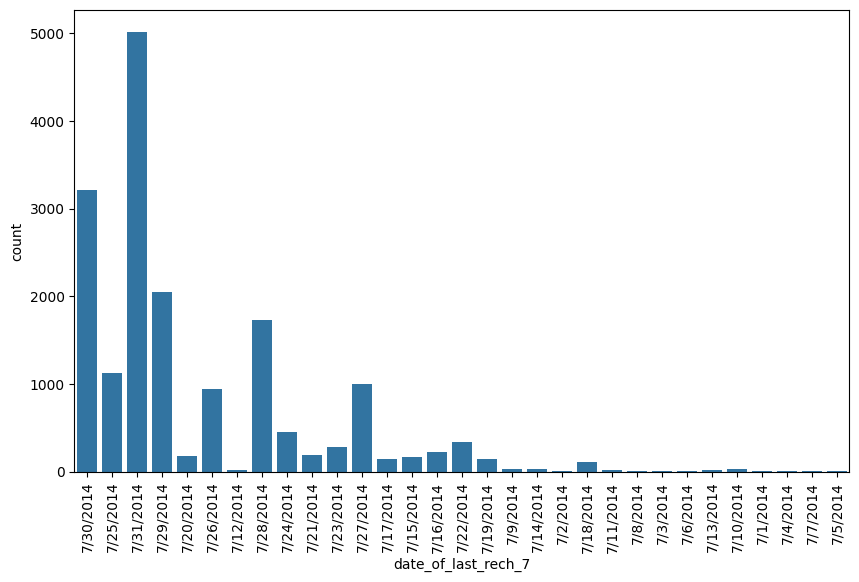

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='date_of_last_rech_8', ylabel='count'>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 [Text(0, 0, '8/30/2014'),
  Text(1, 0, '8/22/2014'),
  Text(2, 0, '8/23/2014'),
  Text(3, 0, '8/31/2014'),
  Text(4, 0, '8/25/2014'),
  Text(5, 0, '8/28/2014'),
  Text(6, 0, '8/18/2014'),
  Text(7, 0, '8/20/2014'),
  Text(8, 0, '8/24/2014'),
  Text(9, 0, '8/29/2014'),
  Text(10, 0, '8/27/2014'),
  Text(11, 0, '8/26/2014'),
  Text(12, 0, '8/12/2014'),
  Text(13, 0, '8/17/2014'),
  Text(14, 0, '8/21/2014'),
  Text(15, 0, '8/11/2014'),
  Text(16, 0, '8/8/2014'),
  Text(17, 0, '8/19/2014'),
  Text(18, 0, '8/15/2014'),
  Text(19, 0, '8/10/2014'),
  Text(20, 0, '8/3/2014'),
  Text(21, 0, '8/13/2014'),
  Text(22, 0, '8/4/2014'),
  Text(23, 0, '8/16/2014'),
  Text(24, 0, '8/5/2014'),
  Text(25, 0, '8/1/2014'),
  Text(26, 0, '8/14/2014'),
  Text(27, 0, '8/7/2014'),
  Text(28, 0, '8/2/2014'),
  Text(29, 0, '8/6/2014'),
 

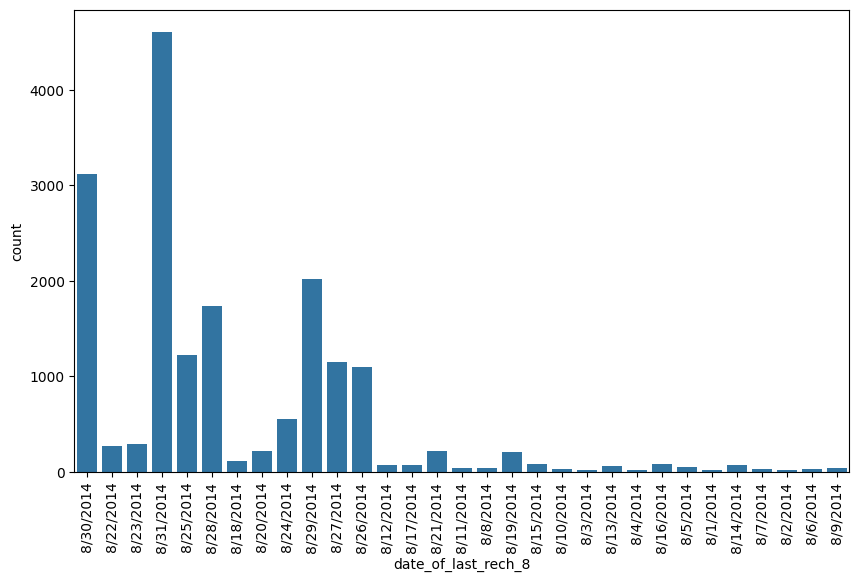

In [ ]:
date_columns = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']
for col in date_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train_cleaned_filtered, x=col)
    plt.xticks(rotation=90)
    plt.show()


In [ ]:
constant_columns = [col for col in train_cleaned_filtered.columns if train_cleaned_filtered[col].nunique() <= 1]
print("Columns with a single unique value:", constant_columns)





Columns with a single unique value: ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [ ]:
train_cleaned_filtered = train_cleaned_filtered.drop(columns=constant_columns)
train_test_cleaned_filtered = train_test_cleaned_filtered.drop(columns=constant_columns)
print("Shape of the dataset after removing constant columns:", train_cleaned.shape)
print("Shape of the dataset after removing constant columns:", train_test_cleaned_filtered.shape)

Shape of the dataset after removing constant columns: (69999, 143)
Shape of the dataset after removing constant columns: (69999, 127)


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='id'>

Text(0.5, 1.0, 'Boxplot of id')

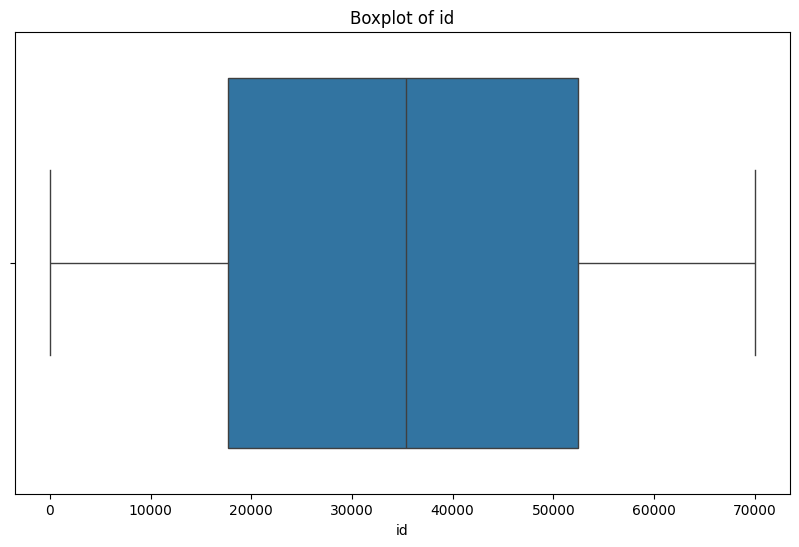

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='arpu_6'>

Text(0.5, 1.0, 'Boxplot of arpu_6')

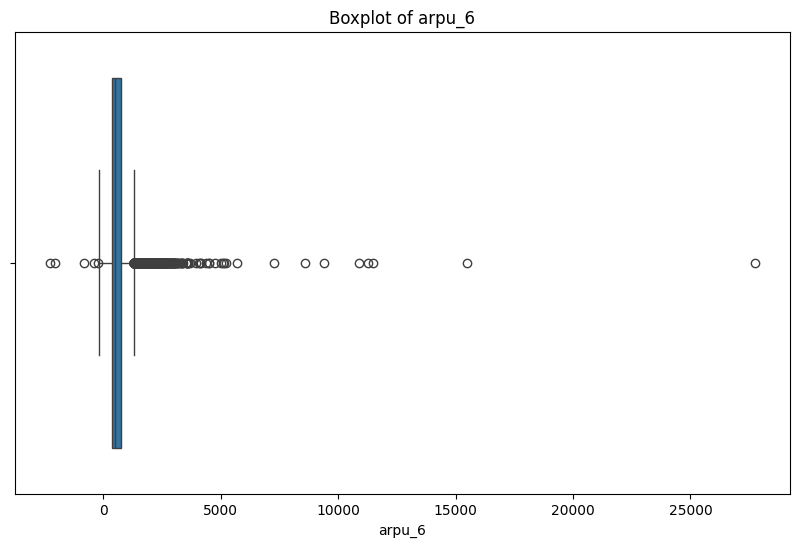

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='arpu_7'>

Text(0.5, 1.0, 'Boxplot of arpu_7')

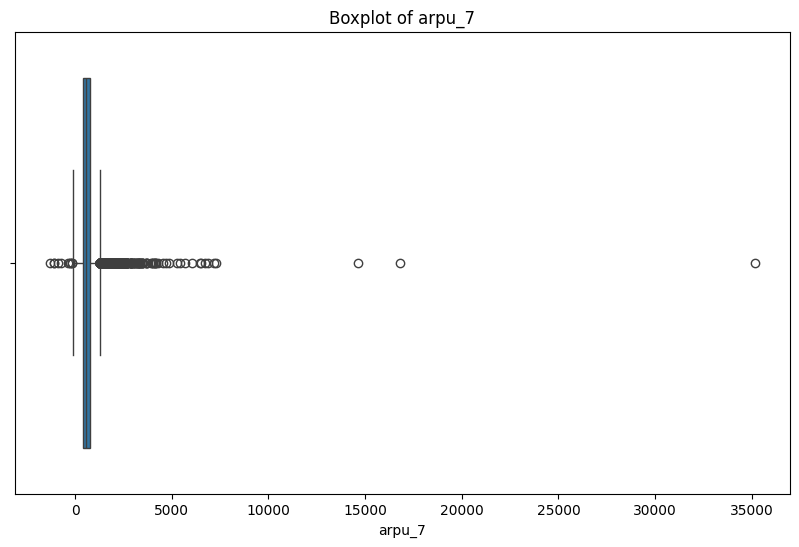

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='arpu_8'>

Text(0.5, 1.0, 'Boxplot of arpu_8')

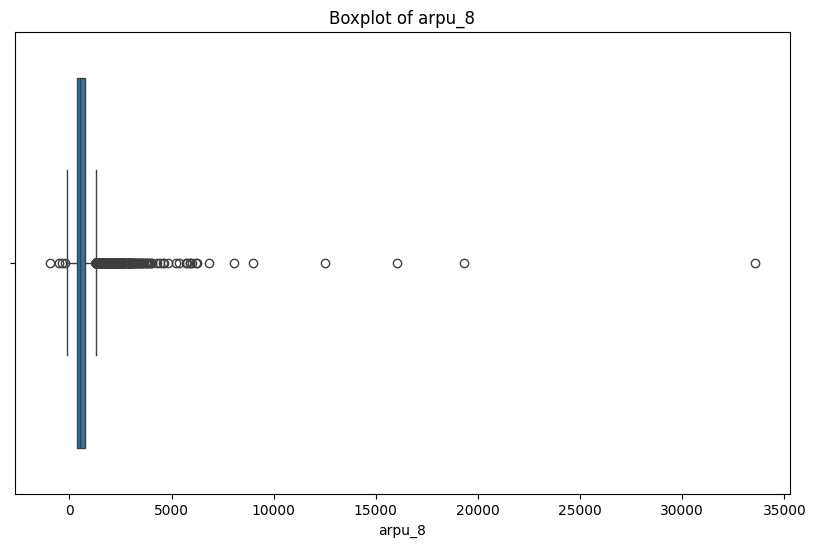

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='onnet_mou_6'>

Text(0.5, 1.0, 'Boxplot of onnet_mou_6')

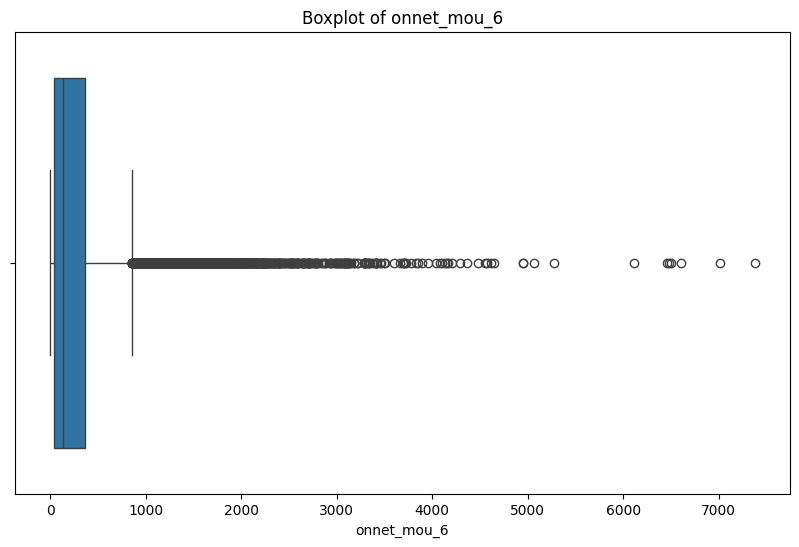

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='onnet_mou_7'>

Text(0.5, 1.0, 'Boxplot of onnet_mou_7')

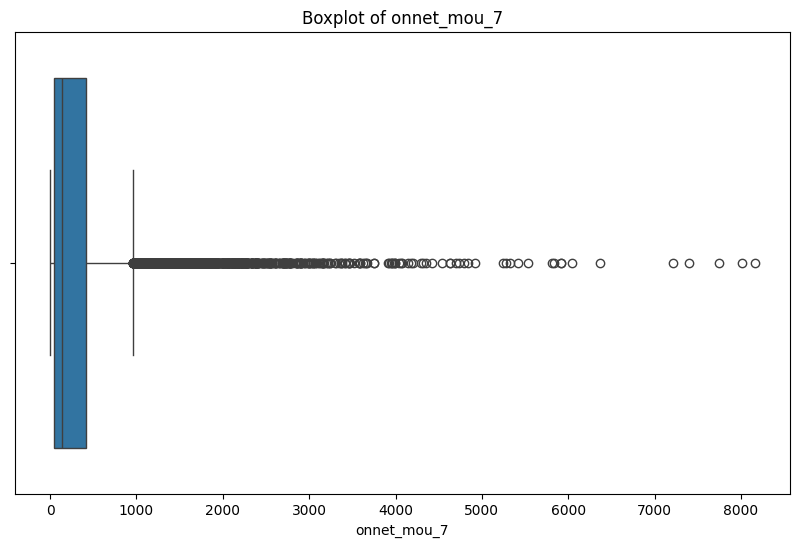

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='onnet_mou_8'>

Text(0.5, 1.0, 'Boxplot of onnet_mou_8')

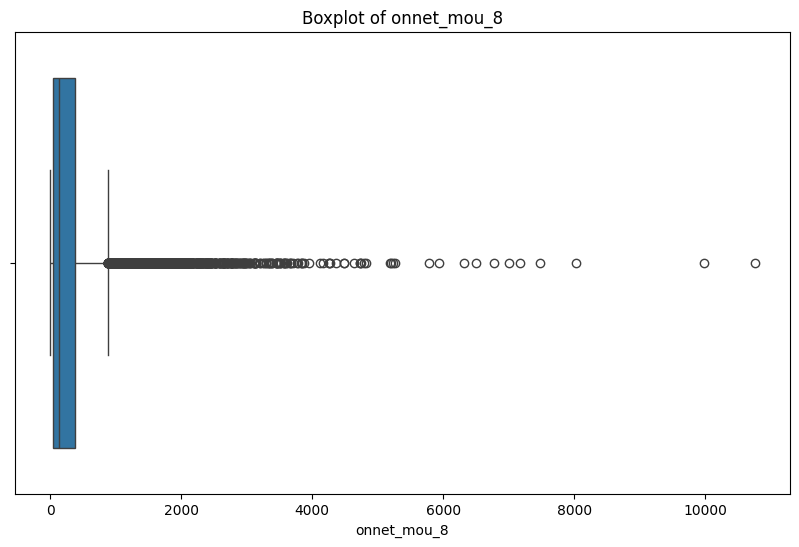

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='offnet_mou_6'>

Text(0.5, 1.0, 'Boxplot of offnet_mou_6')

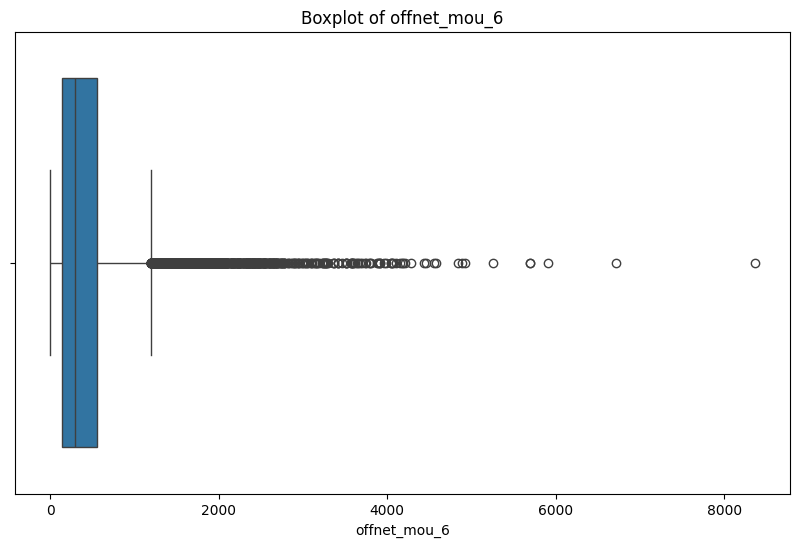

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='offnet_mou_7'>

Text(0.5, 1.0, 'Boxplot of offnet_mou_7')

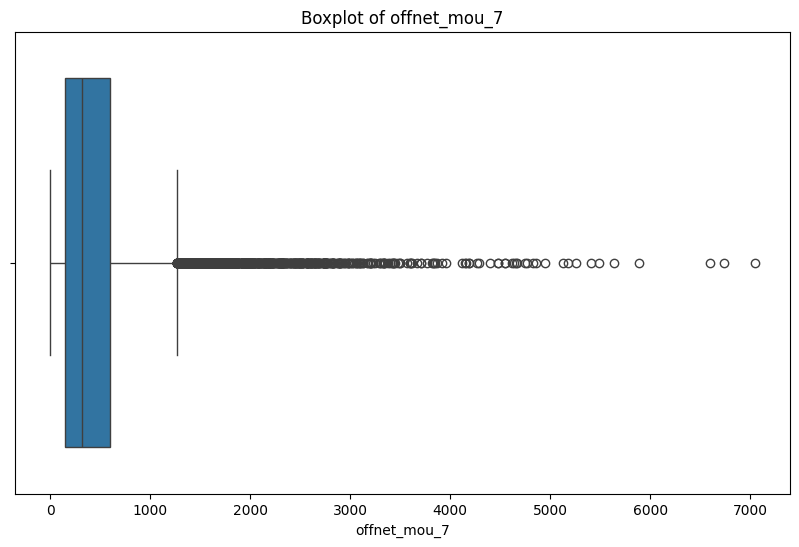

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='offnet_mou_8'>

Text(0.5, 1.0, 'Boxplot of offnet_mou_8')

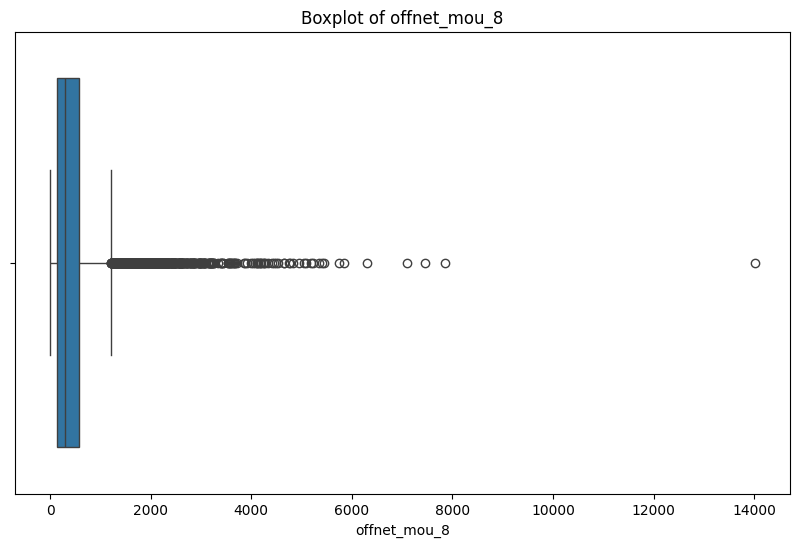

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='roam_ic_mou_6'>

Text(0.5, 1.0, 'Boxplot of roam_ic_mou_6')

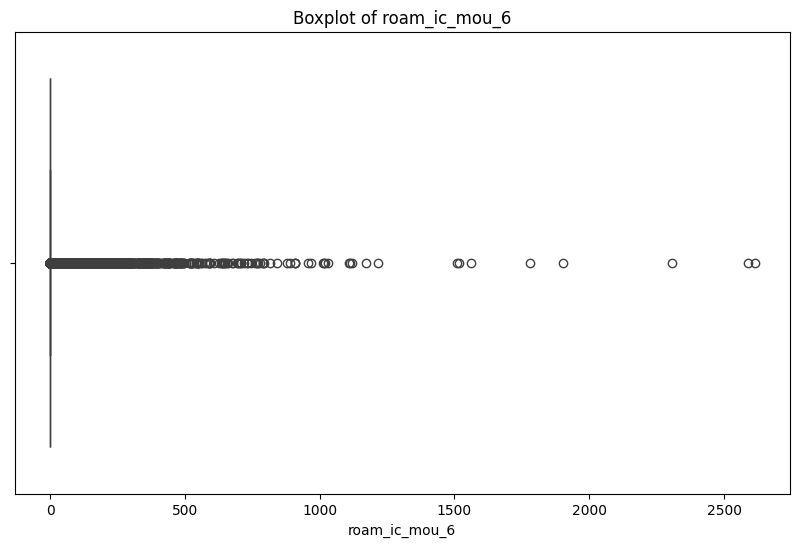

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='roam_ic_mou_7'>

Text(0.5, 1.0, 'Boxplot of roam_ic_mou_7')

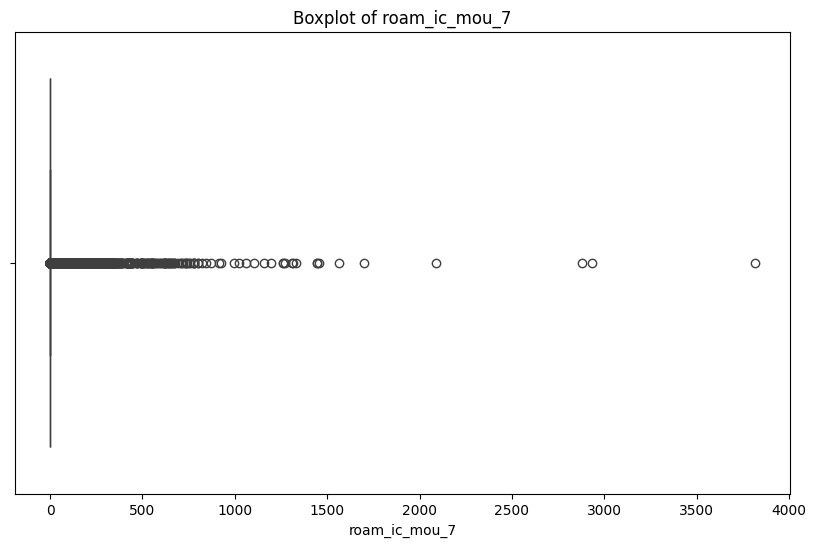

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='roam_ic_mou_8'>

Text(0.5, 1.0, 'Boxplot of roam_ic_mou_8')

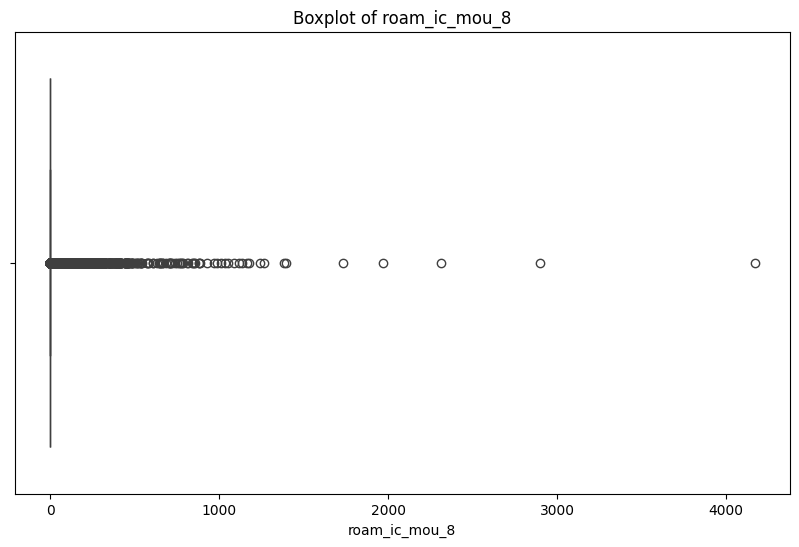

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='roam_og_mou_6'>

Text(0.5, 1.0, 'Boxplot of roam_og_mou_6')

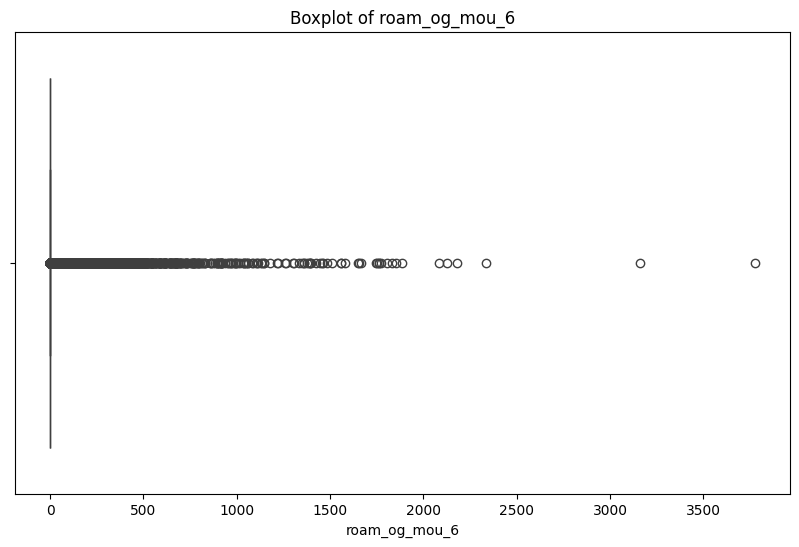

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='roam_og_mou_7'>

Text(0.5, 1.0, 'Boxplot of roam_og_mou_7')

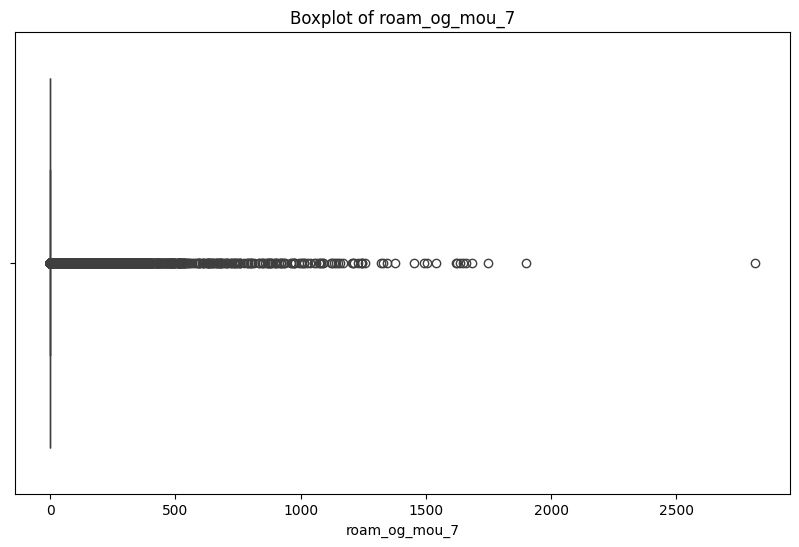

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='roam_og_mou_8'>

Text(0.5, 1.0, 'Boxplot of roam_og_mou_8')

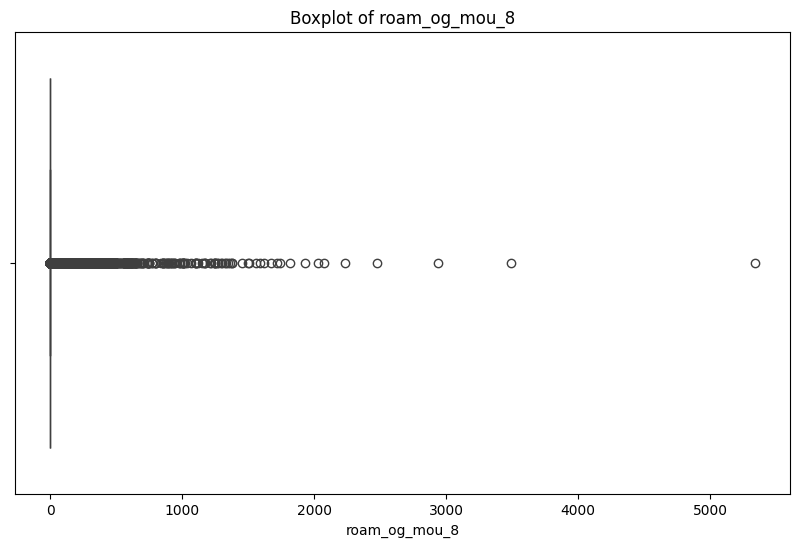

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='loc_og_t2t_mou_6'>

Text(0.5, 1.0, 'Boxplot of loc_og_t2t_mou_6')

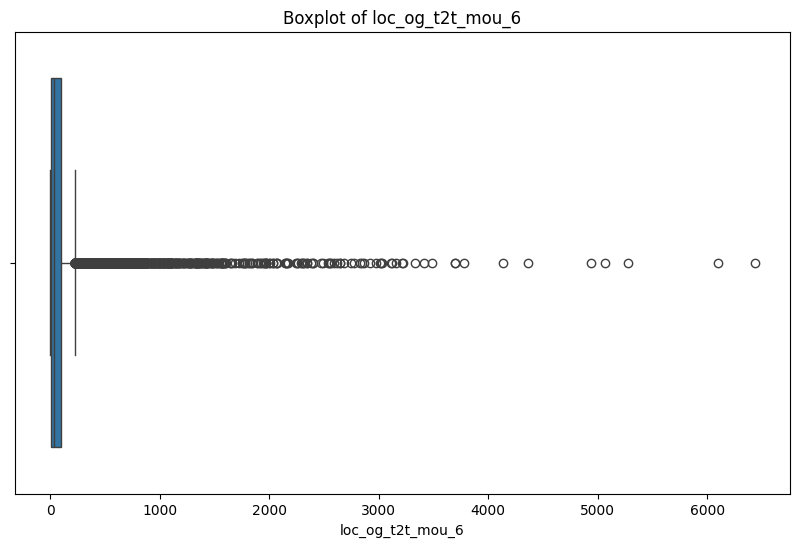

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='loc_og_t2t_mou_7'>

Text(0.5, 1.0, 'Boxplot of loc_og_t2t_mou_7')

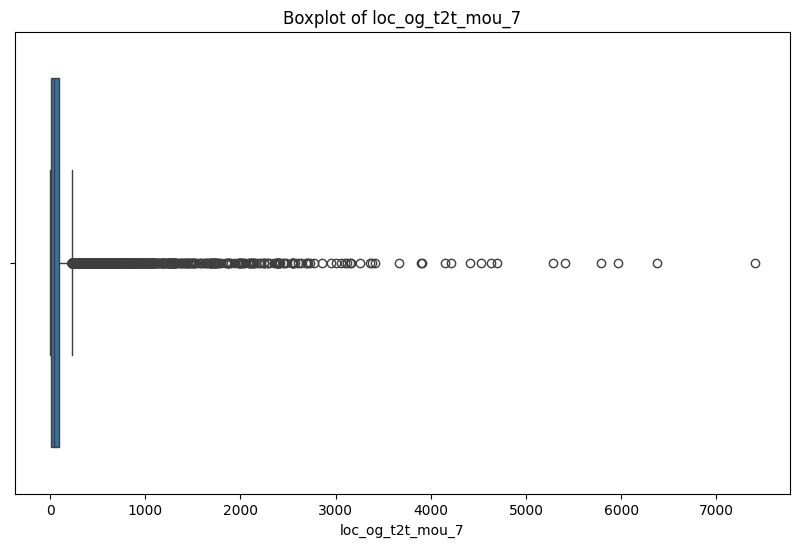

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='loc_og_t2t_mou_8'>

Text(0.5, 1.0, 'Boxplot of loc_og_t2t_mou_8')

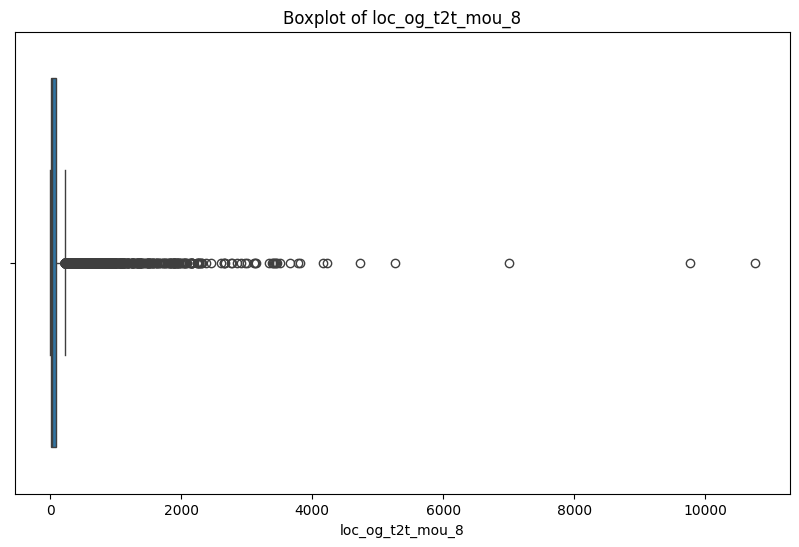

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='loc_og_t2m_mou_6'>

Text(0.5, 1.0, 'Boxplot of loc_og_t2m_mou_6')

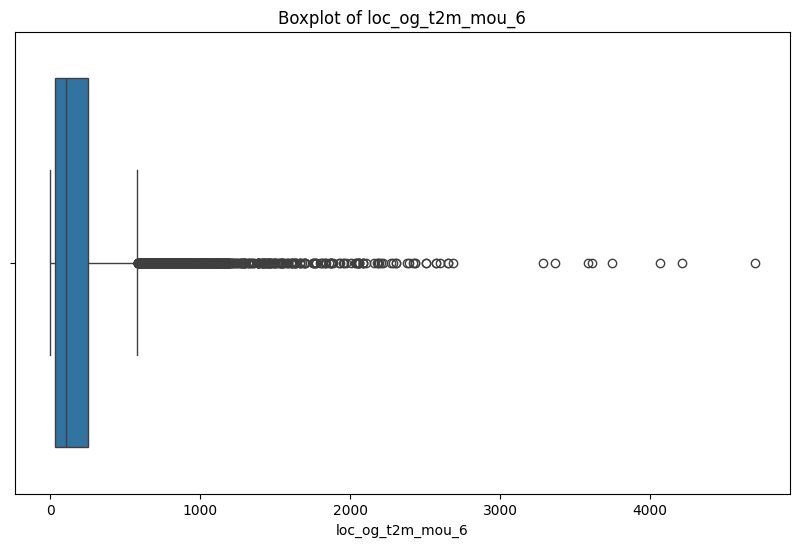

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='loc_og_t2m_mou_7'>

Text(0.5, 1.0, 'Boxplot of loc_og_t2m_mou_7')

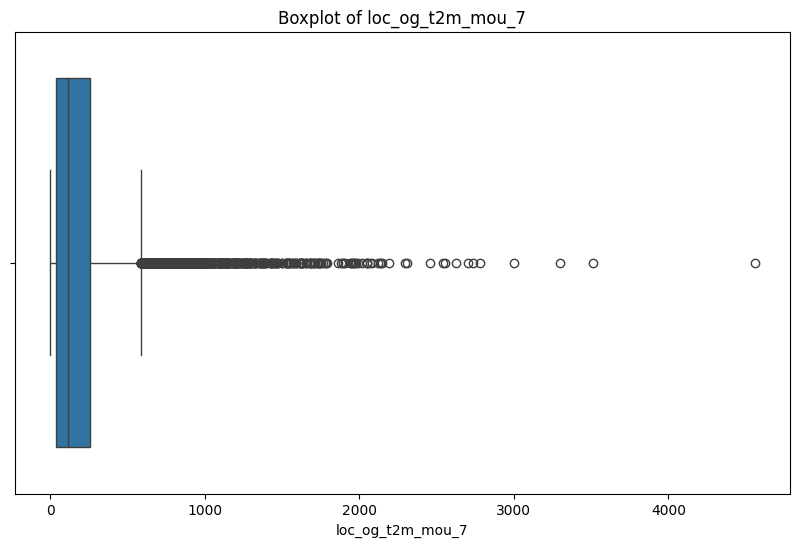

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='loc_og_t2m_mou_8'>

Text(0.5, 1.0, 'Boxplot of loc_og_t2m_mou_8')

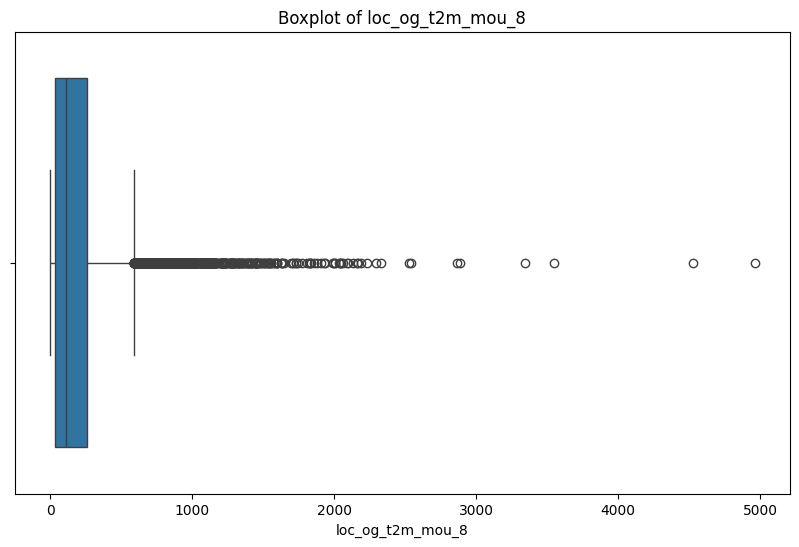

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='loc_og_t2f_mou_6'>

Text(0.5, 1.0, 'Boxplot of loc_og_t2f_mou_6')

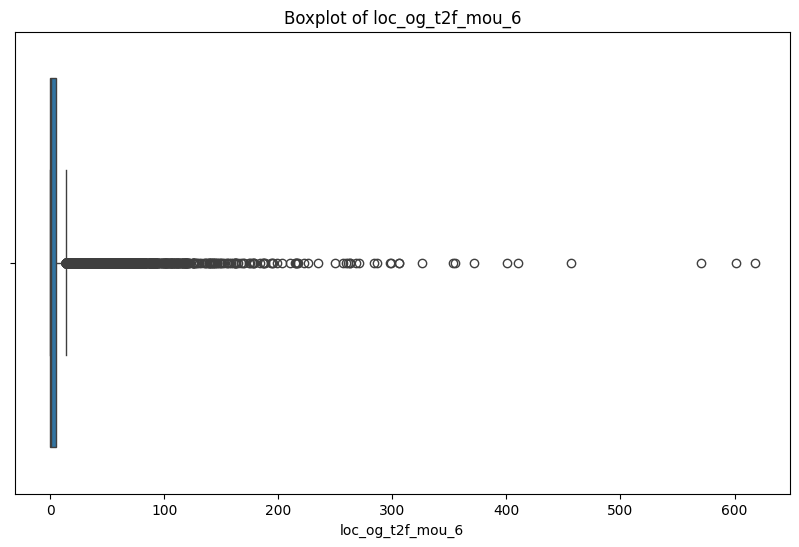

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='loc_og_t2f_mou_7'>

Text(0.5, 1.0, 'Boxplot of loc_og_t2f_mou_7')

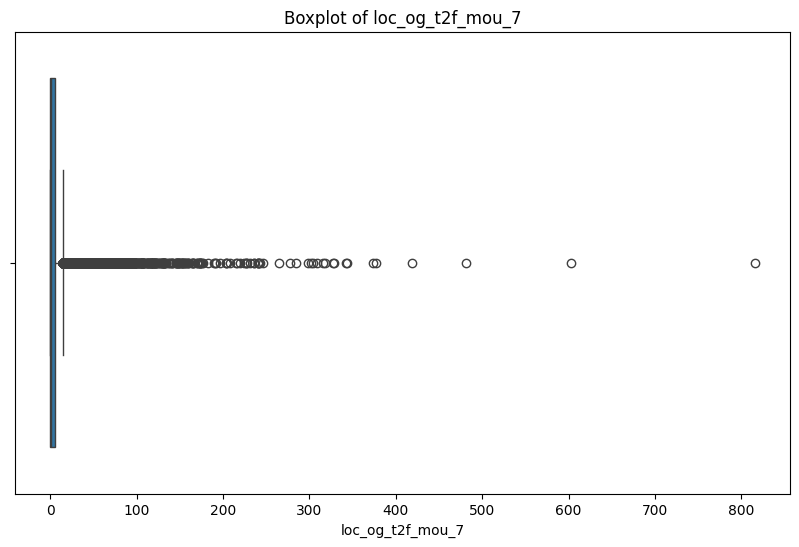

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='loc_og_t2f_mou_8'>

Text(0.5, 1.0, 'Boxplot of loc_og_t2f_mou_8')

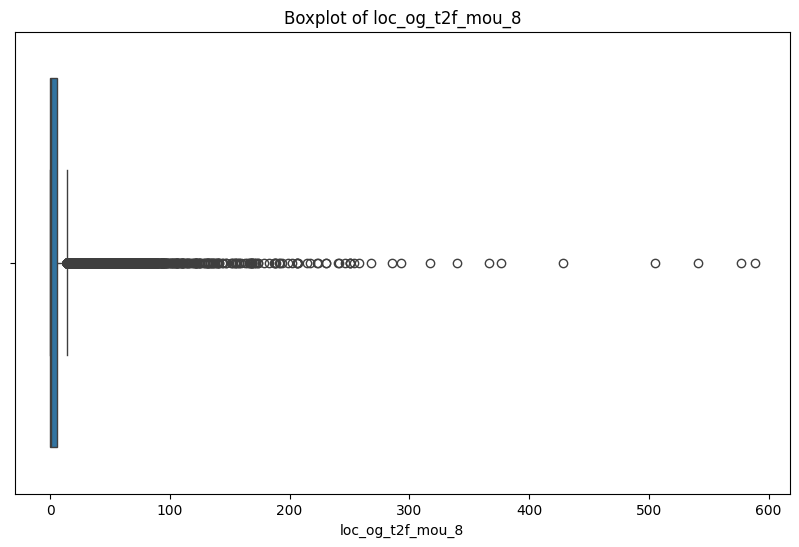

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='loc_og_t2c_mou_6'>

Text(0.5, 1.0, 'Boxplot of loc_og_t2c_mou_6')

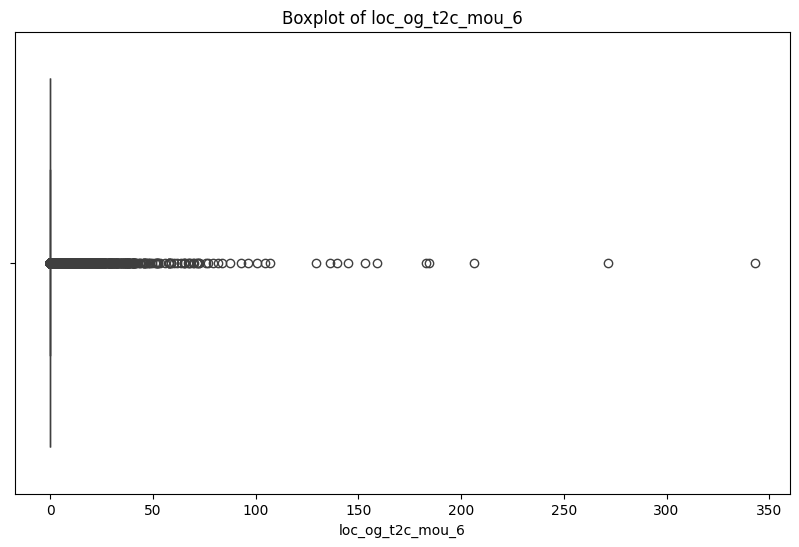

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='loc_og_t2c_mou_7'>

Text(0.5, 1.0, 'Boxplot of loc_og_t2c_mou_7')

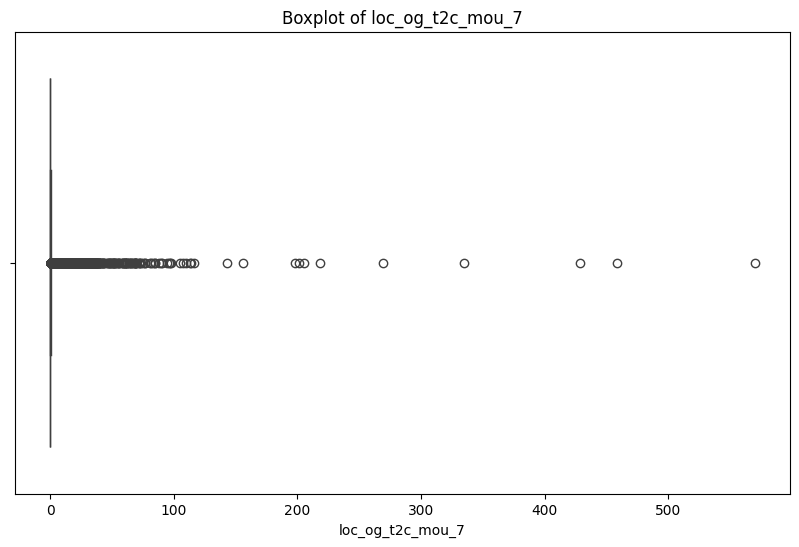

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='loc_og_t2c_mou_8'>

Text(0.5, 1.0, 'Boxplot of loc_og_t2c_mou_8')

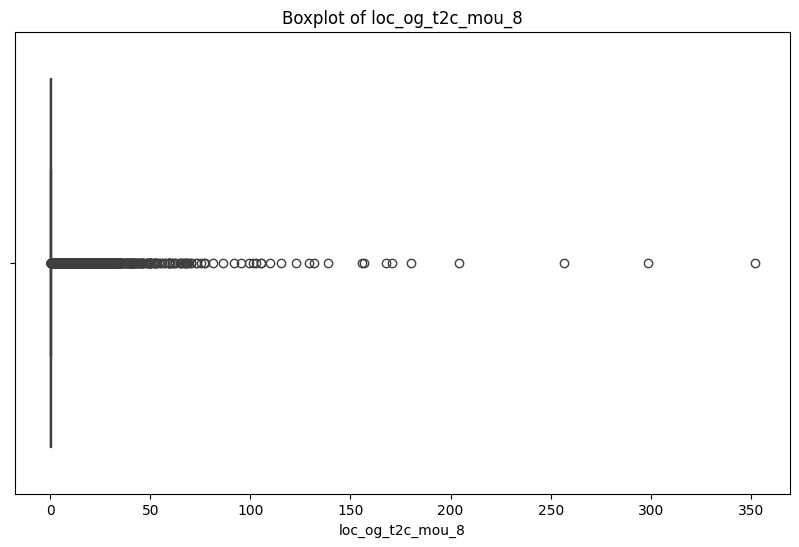

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='loc_og_mou_6'>

Text(0.5, 1.0, 'Boxplot of loc_og_mou_6')

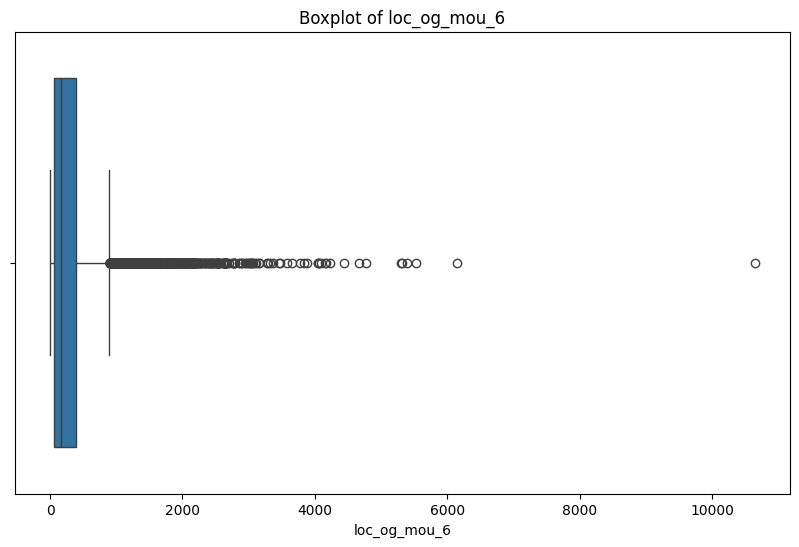

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='loc_og_mou_7'>

Text(0.5, 1.0, 'Boxplot of loc_og_mou_7')

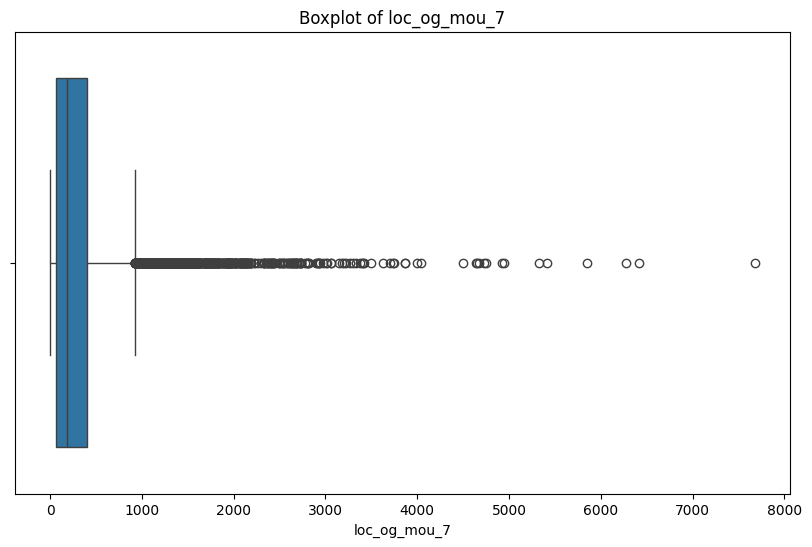

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='loc_og_mou_8'>

Text(0.5, 1.0, 'Boxplot of loc_og_mou_8')

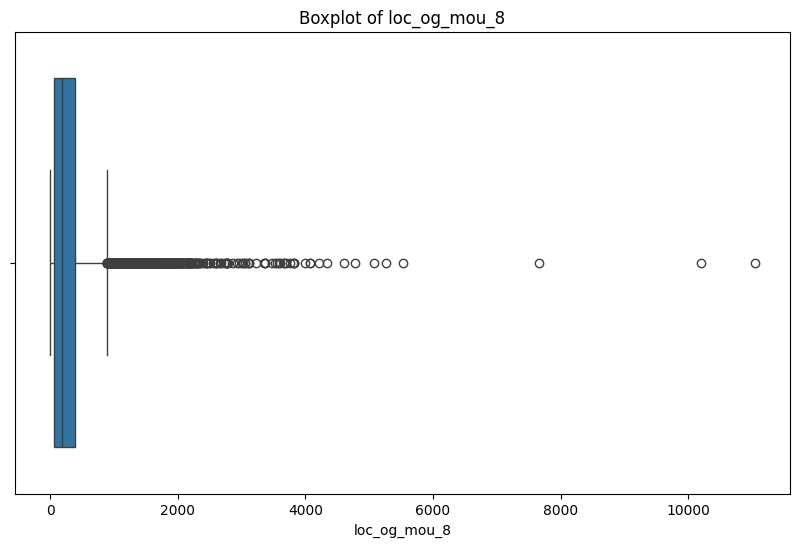

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='std_og_t2t_mou_6'>

Text(0.5, 1.0, 'Boxplot of std_og_t2t_mou_6')

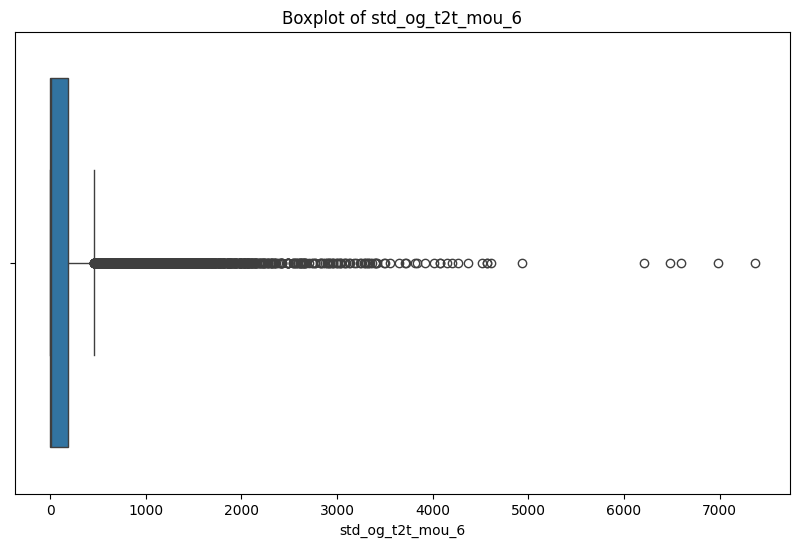

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='std_og_t2t_mou_7'>

Text(0.5, 1.0, 'Boxplot of std_og_t2t_mou_7')

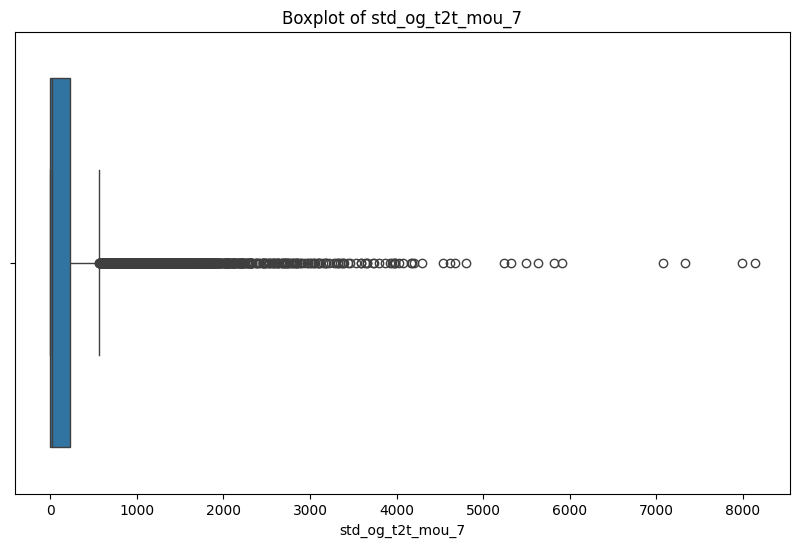

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='std_og_t2t_mou_8'>

Text(0.5, 1.0, 'Boxplot of std_og_t2t_mou_8')

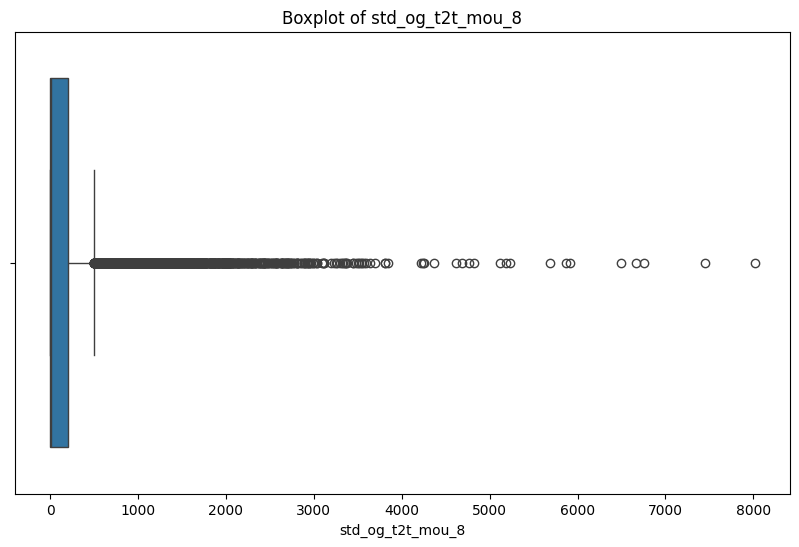

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='std_og_t2m_mou_6'>

Text(0.5, 1.0, 'Boxplot of std_og_t2m_mou_6')

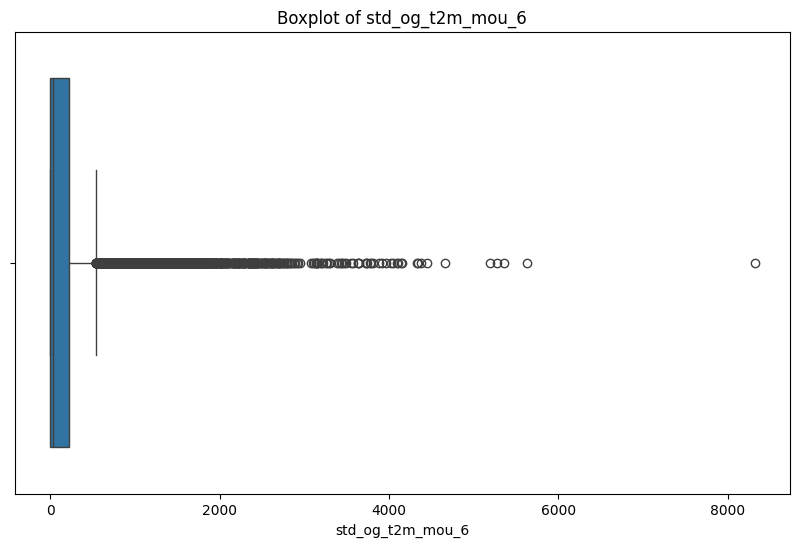

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='std_og_t2m_mou_7'>

Text(0.5, 1.0, 'Boxplot of std_og_t2m_mou_7')

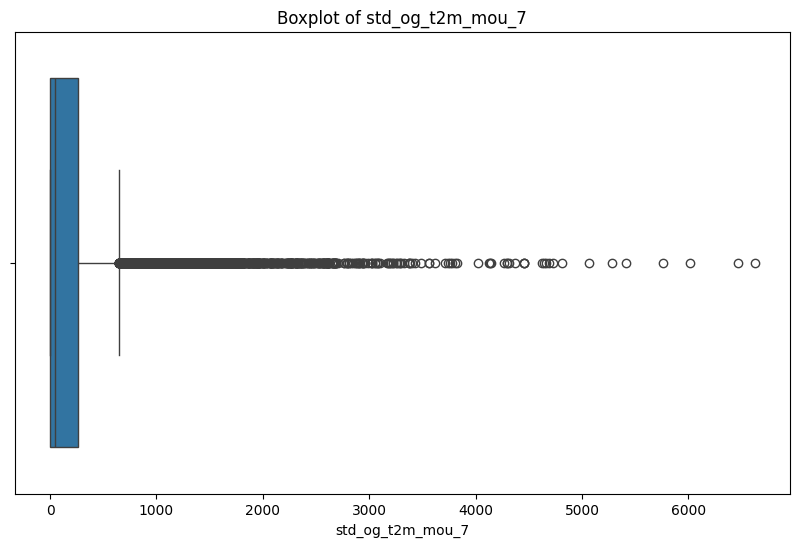

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='std_og_t2m_mou_8'>

Text(0.5, 1.0, 'Boxplot of std_og_t2m_mou_8')

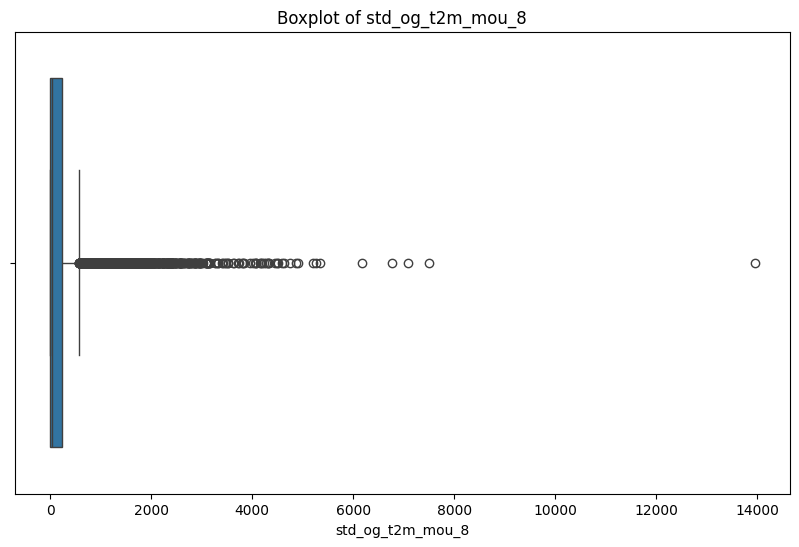

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='std_og_t2f_mou_6'>

Text(0.5, 1.0, 'Boxplot of std_og_t2f_mou_6')

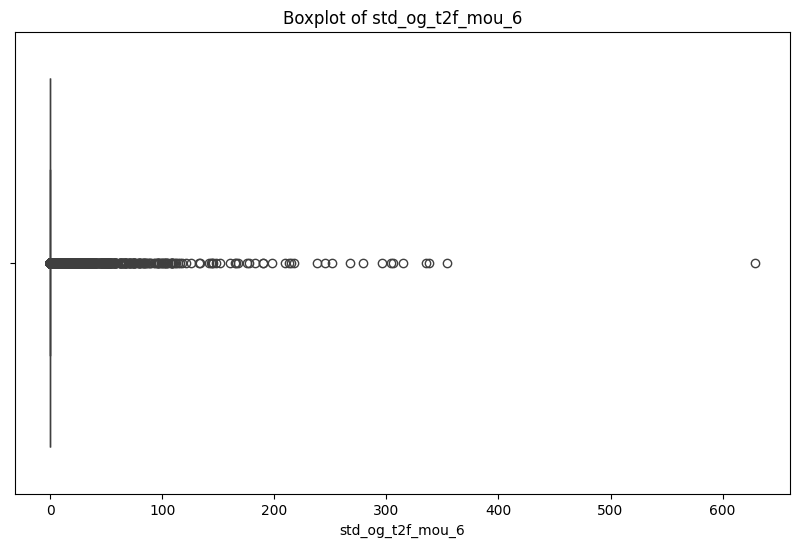

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='std_og_t2f_mou_7'>

Text(0.5, 1.0, 'Boxplot of std_og_t2f_mou_7')

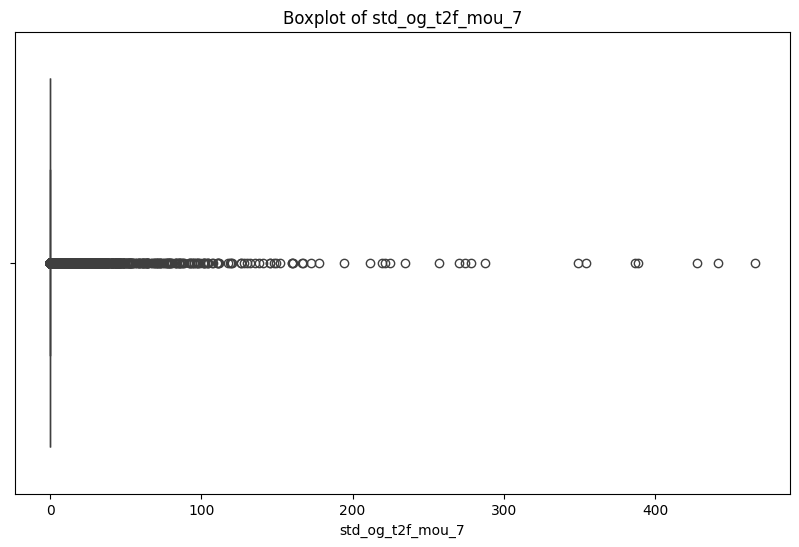

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='std_og_t2f_mou_8'>

Text(0.5, 1.0, 'Boxplot of std_og_t2f_mou_8')

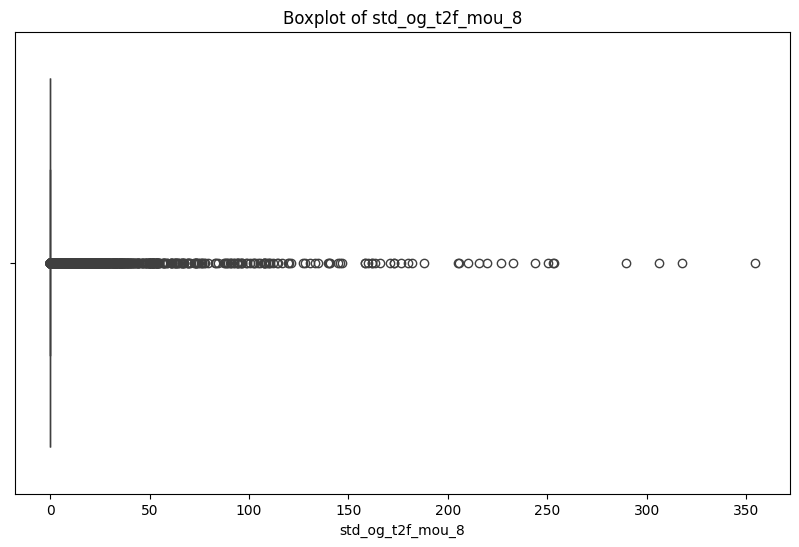

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='std_og_mou_6'>

Text(0.5, 1.0, 'Boxplot of std_og_mou_6')

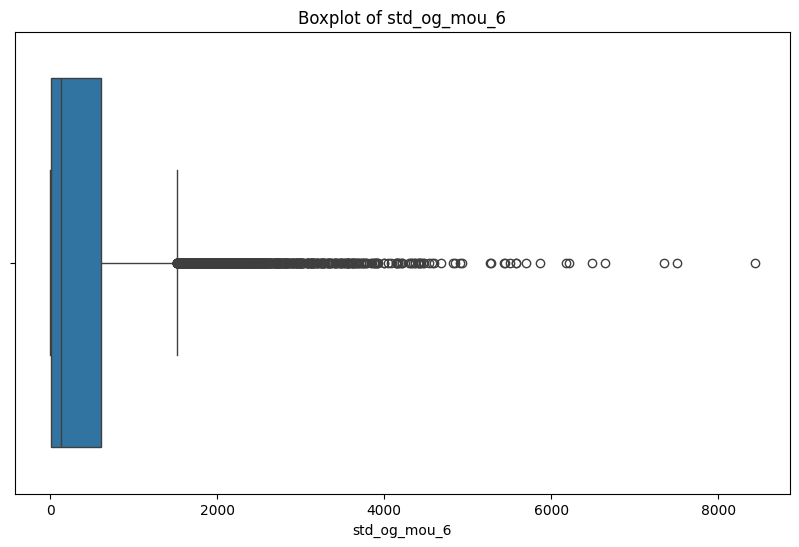

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='std_og_mou_7'>

Text(0.5, 1.0, 'Boxplot of std_og_mou_7')

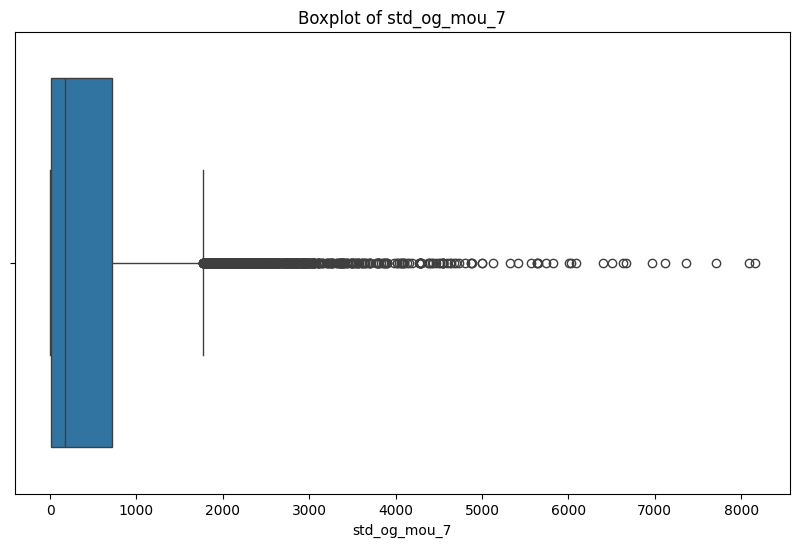

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='std_og_mou_8'>

Text(0.5, 1.0, 'Boxplot of std_og_mou_8')

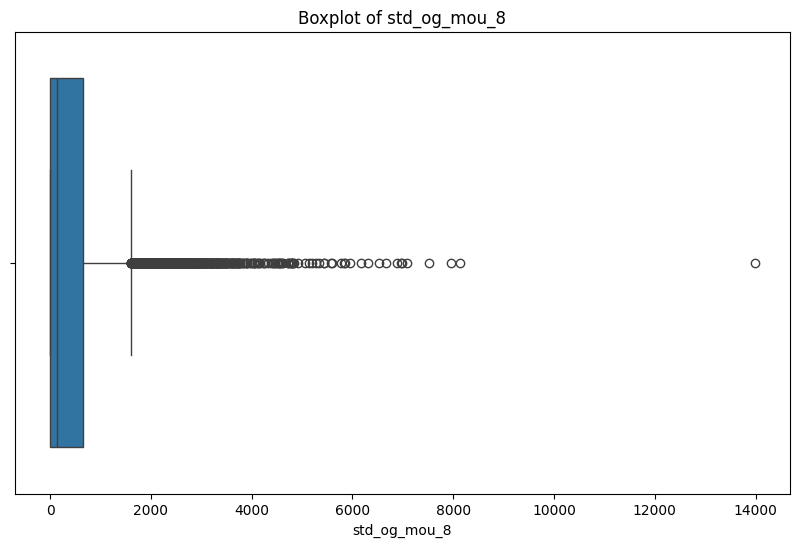

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='isd_og_mou_6'>

Text(0.5, 1.0, 'Boxplot of isd_og_mou_6')

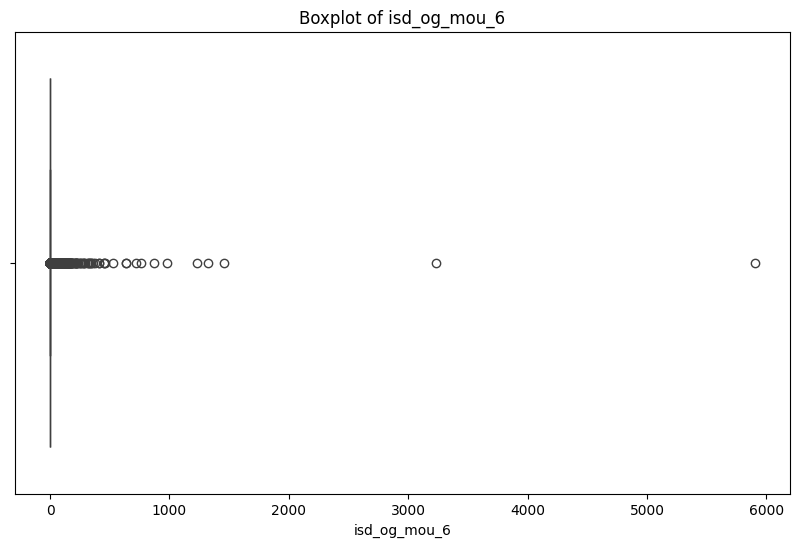

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='isd_og_mou_7'>

Text(0.5, 1.0, 'Boxplot of isd_og_mou_7')

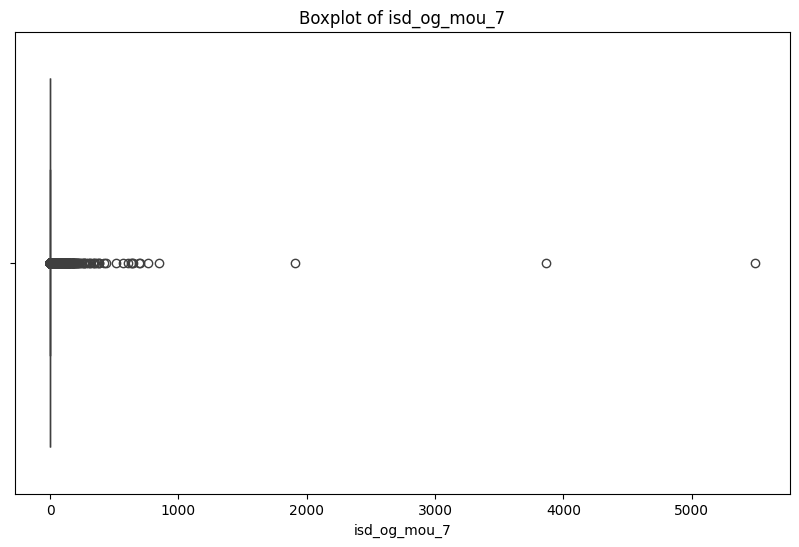

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='isd_og_mou_8'>

Text(0.5, 1.0, 'Boxplot of isd_og_mou_8')

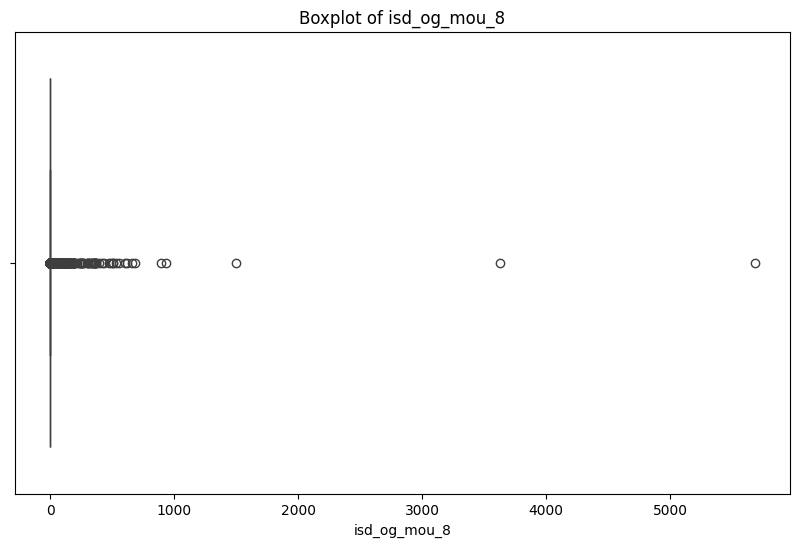

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='spl_og_mou_6'>

Text(0.5, 1.0, 'Boxplot of spl_og_mou_6')

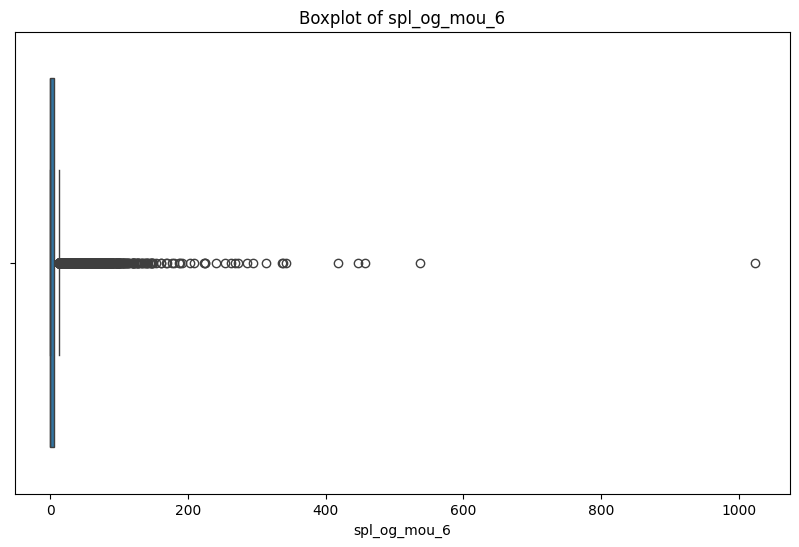

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='spl_og_mou_7'>

Text(0.5, 1.0, 'Boxplot of spl_og_mou_7')

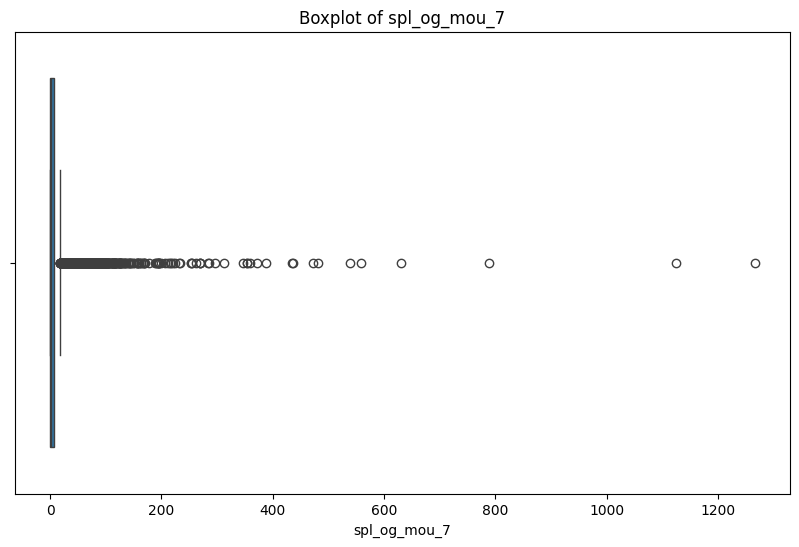

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='spl_og_mou_8'>

Text(0.5, 1.0, 'Boxplot of spl_og_mou_8')

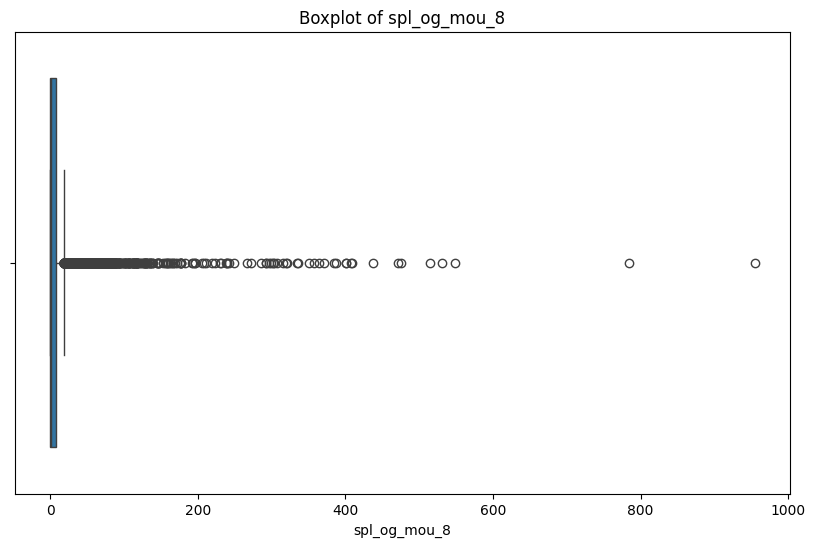

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='og_others_6'>

Text(0.5, 1.0, 'Boxplot of og_others_6')

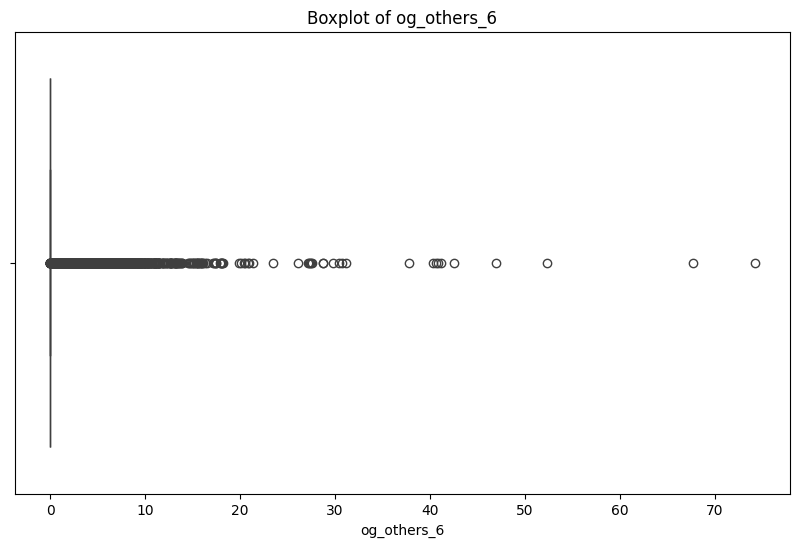

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='og_others_7'>

Text(0.5, 1.0, 'Boxplot of og_others_7')

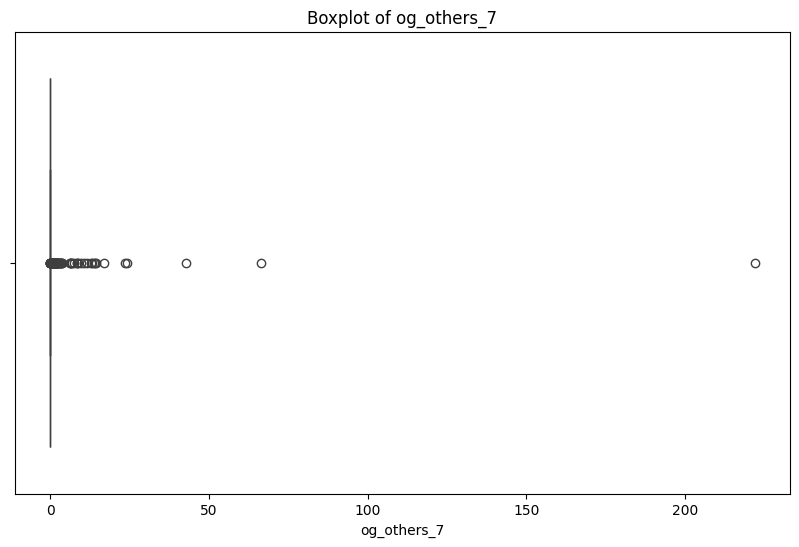

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='og_others_8'>

Text(0.5, 1.0, 'Boxplot of og_others_8')

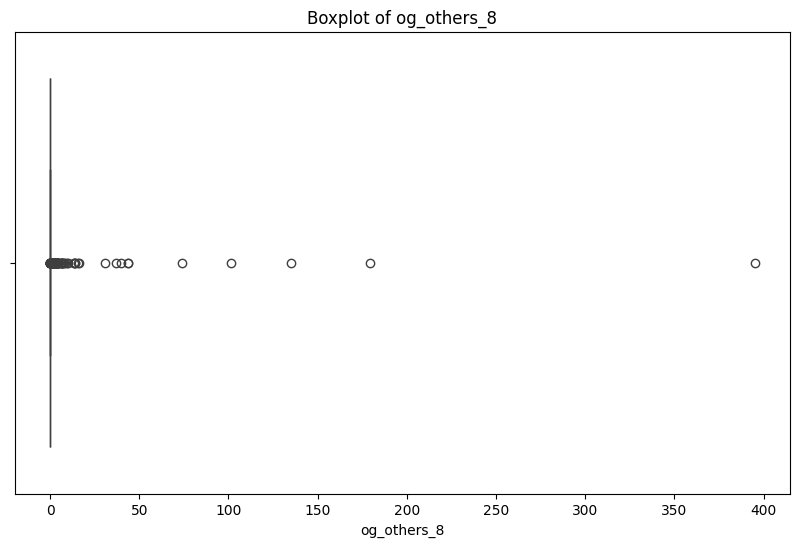

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='total_og_mou_6'>

Text(0.5, 1.0, 'Boxplot of total_og_mou_6')

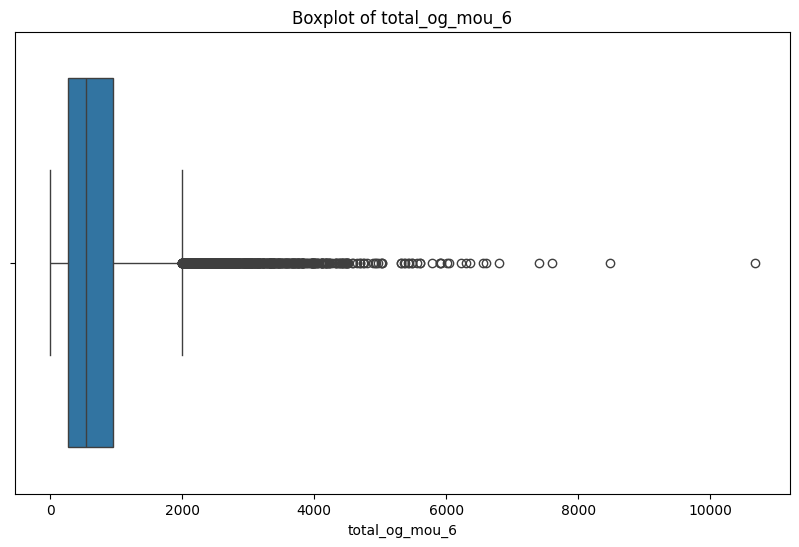

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='total_og_mou_7'>

Text(0.5, 1.0, 'Boxplot of total_og_mou_7')

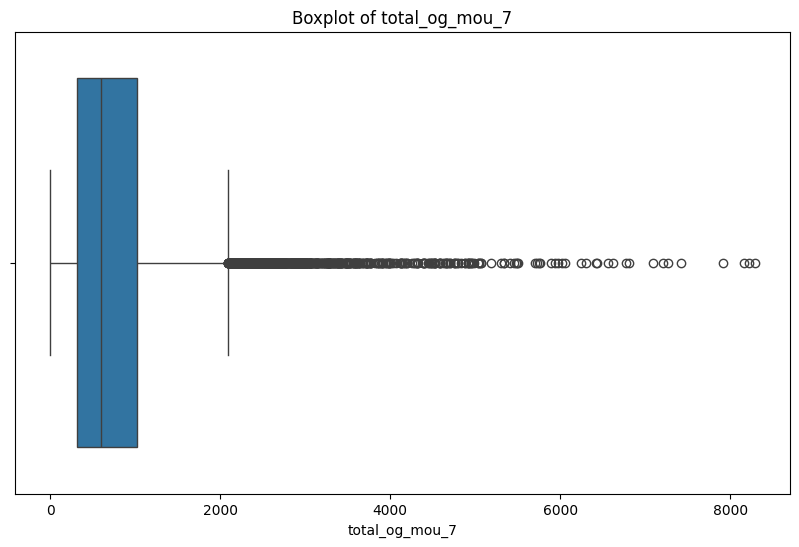

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='total_og_mou_8'>

Text(0.5, 1.0, 'Boxplot of total_og_mou_8')

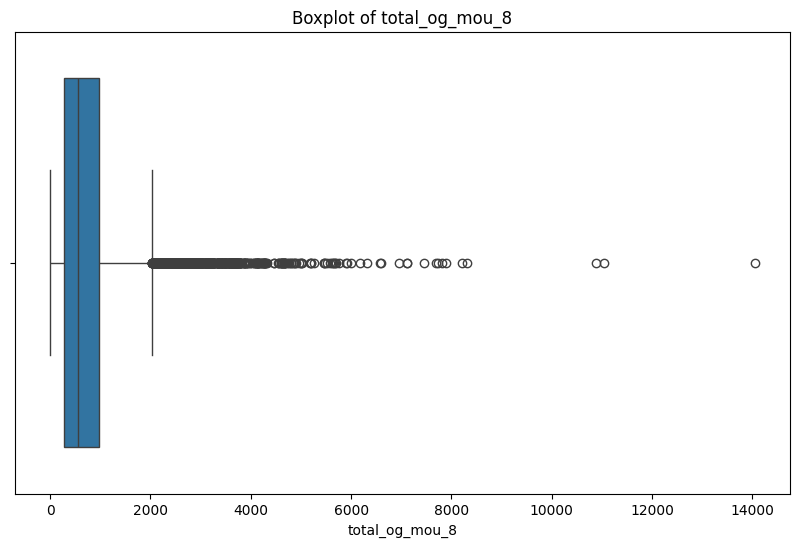

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='loc_ic_t2t_mou_6'>

Text(0.5, 1.0, 'Boxplot of loc_ic_t2t_mou_6')

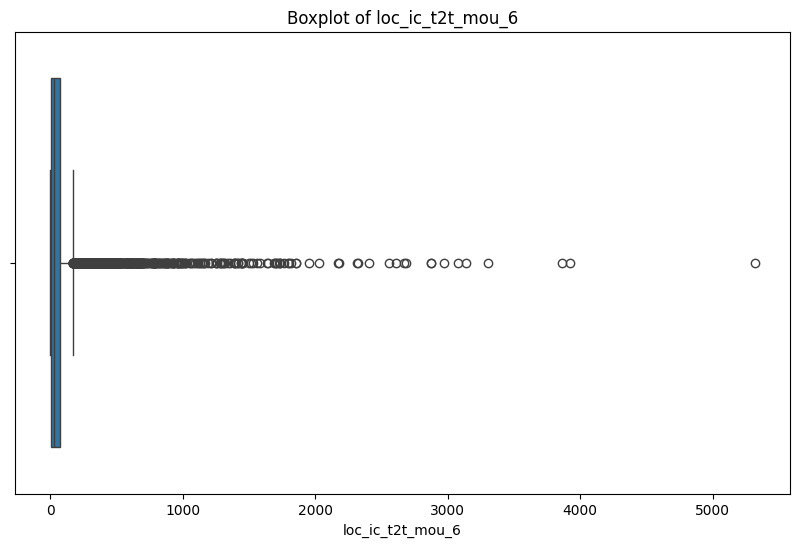

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='loc_ic_t2t_mou_7'>

Text(0.5, 1.0, 'Boxplot of loc_ic_t2t_mou_7')

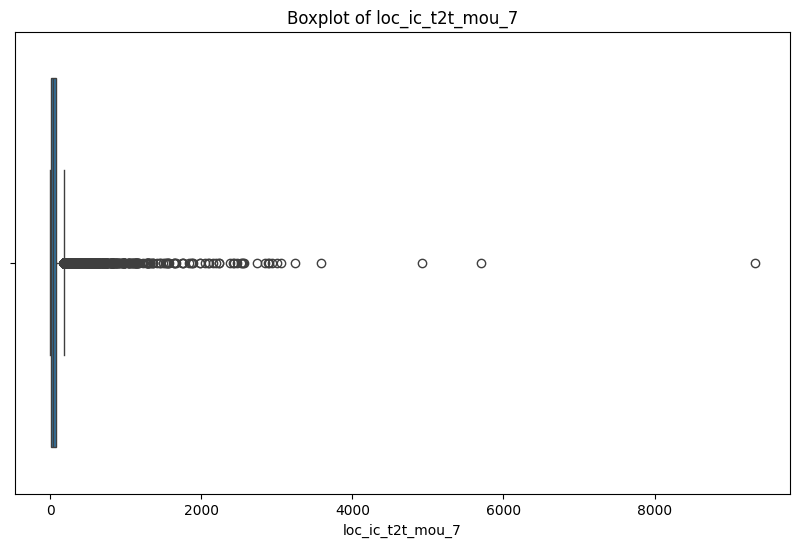

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='loc_ic_t2t_mou_8'>

Text(0.5, 1.0, 'Boxplot of loc_ic_t2t_mou_8')

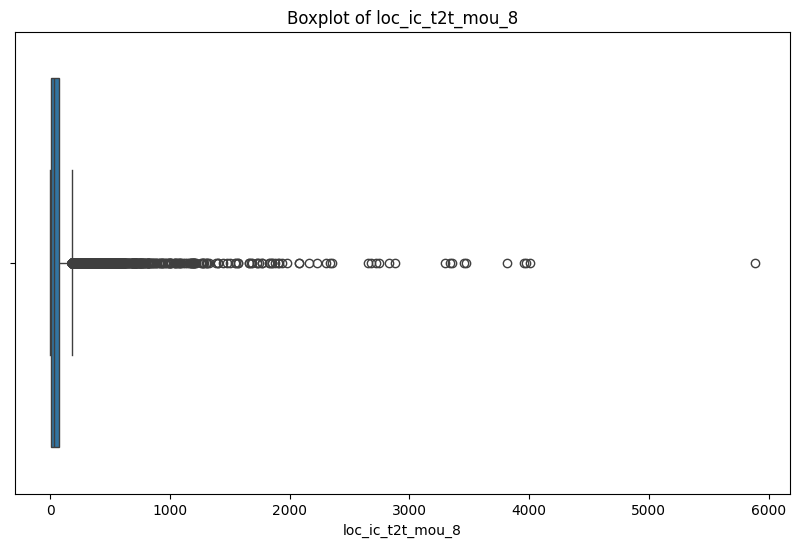

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='loc_ic_t2m_mou_6'>

Text(0.5, 1.0, 'Boxplot of loc_ic_t2m_mou_6')

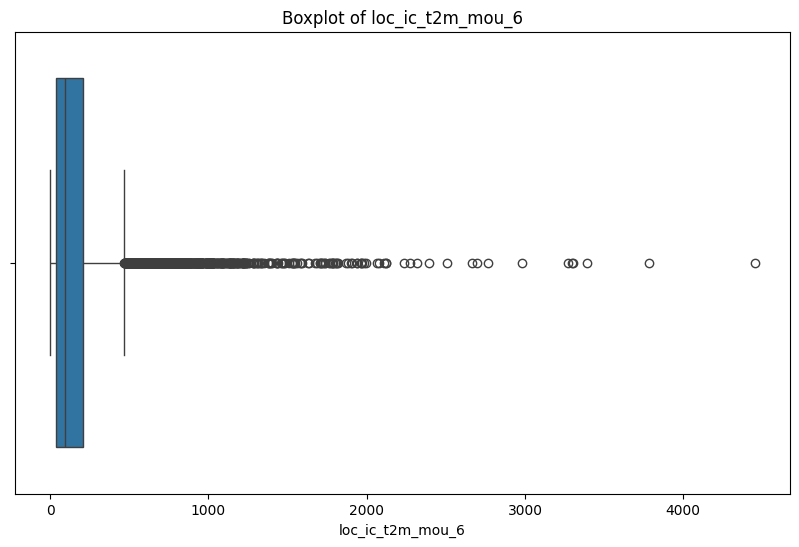

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='loc_ic_t2m_mou_7'>

Text(0.5, 1.0, 'Boxplot of loc_ic_t2m_mou_7')

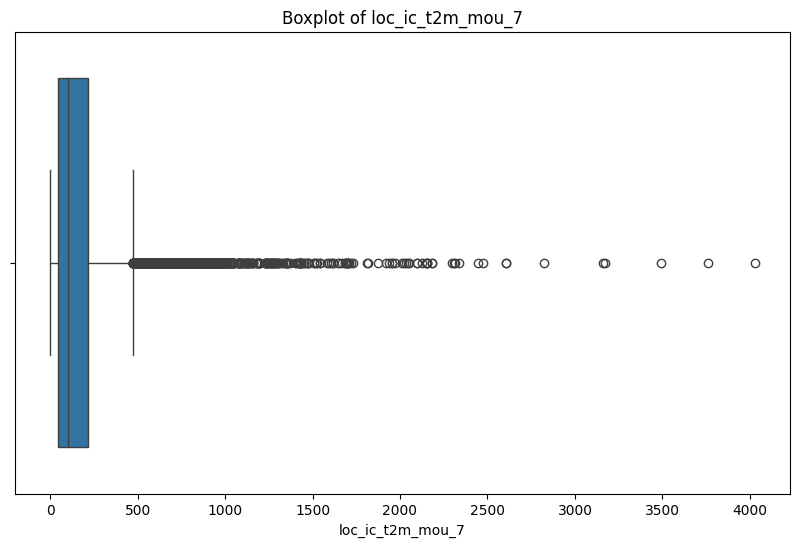

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='loc_ic_t2m_mou_8'>

Text(0.5, 1.0, 'Boxplot of loc_ic_t2m_mou_8')

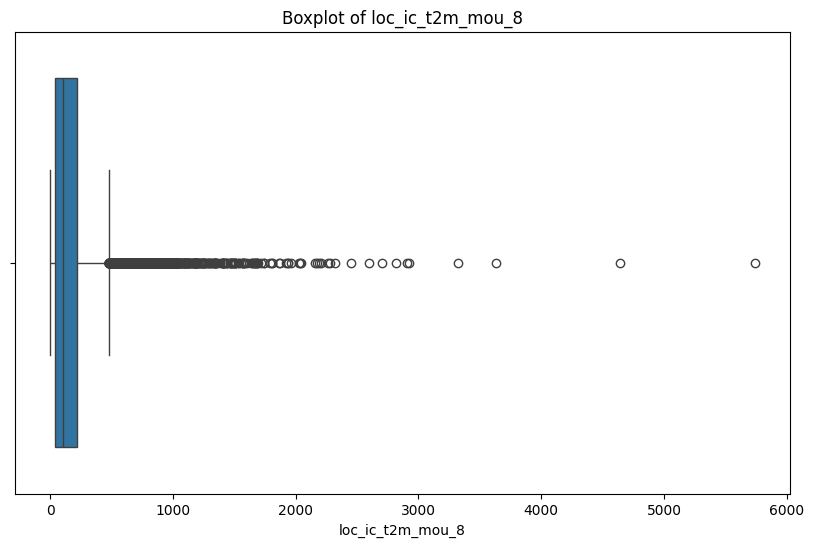

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='loc_ic_t2f_mou_6'>

Text(0.5, 1.0, 'Boxplot of loc_ic_t2f_mou_6')

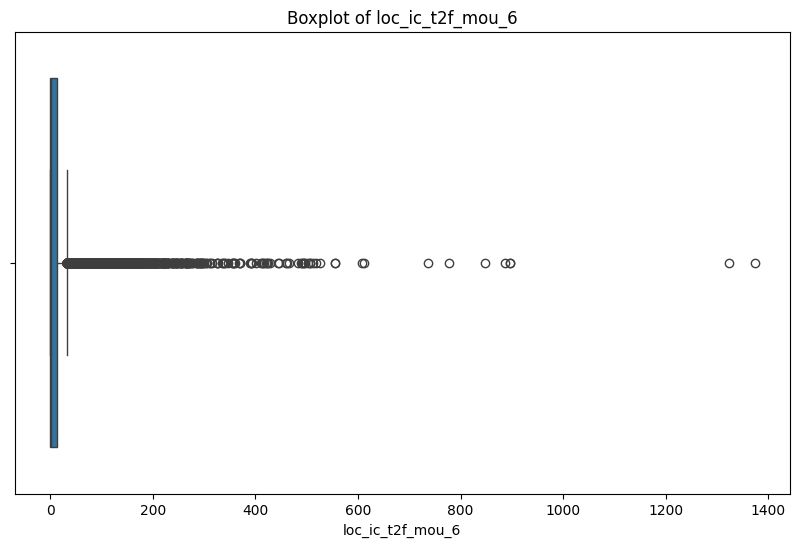

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='loc_ic_t2f_mou_7'>

Text(0.5, 1.0, 'Boxplot of loc_ic_t2f_mou_7')

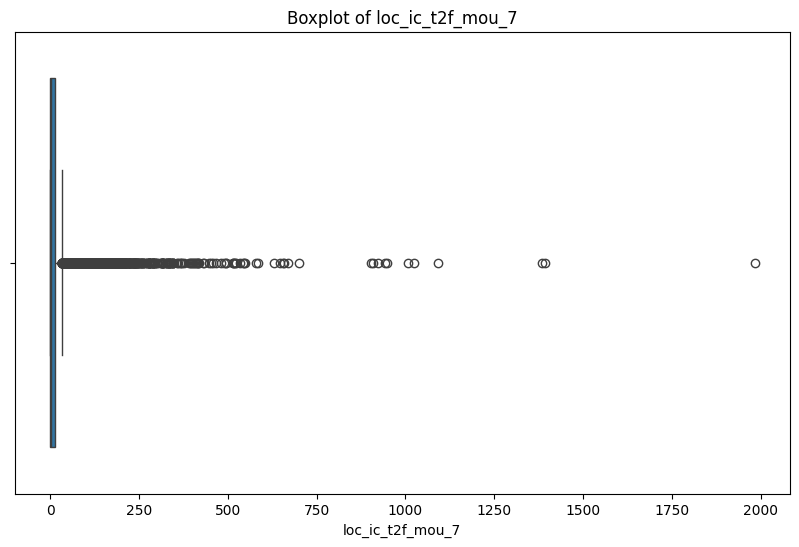

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='loc_ic_t2f_mou_8'>

Text(0.5, 1.0, 'Boxplot of loc_ic_t2f_mou_8')

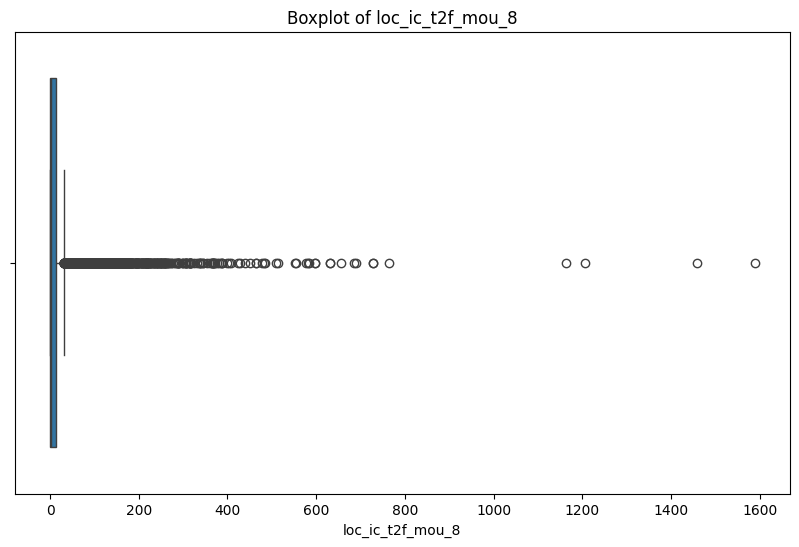

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='loc_ic_mou_6'>

Text(0.5, 1.0, 'Boxplot of loc_ic_mou_6')

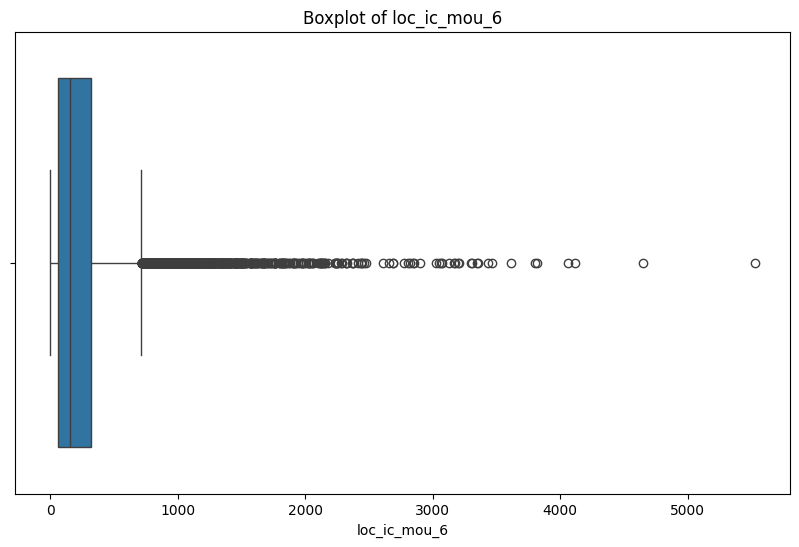

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='loc_ic_mou_7'>

Text(0.5, 1.0, 'Boxplot of loc_ic_mou_7')

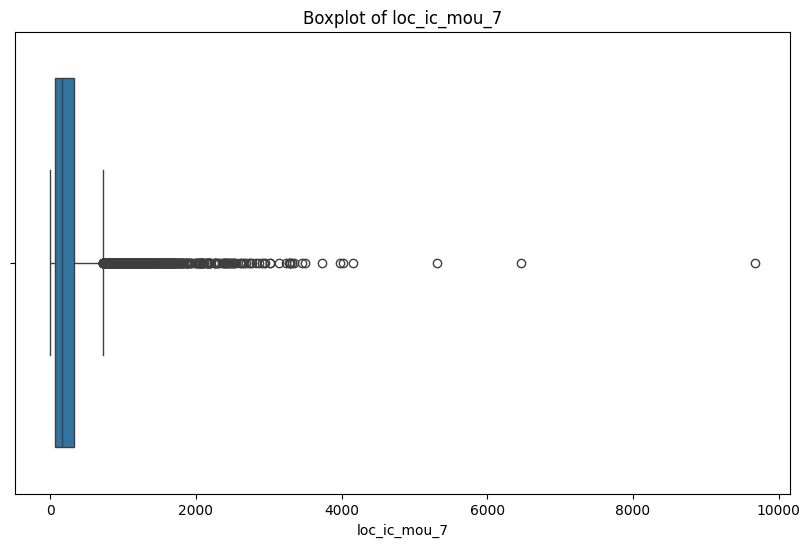

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='loc_ic_mou_8'>

Text(0.5, 1.0, 'Boxplot of loc_ic_mou_8')

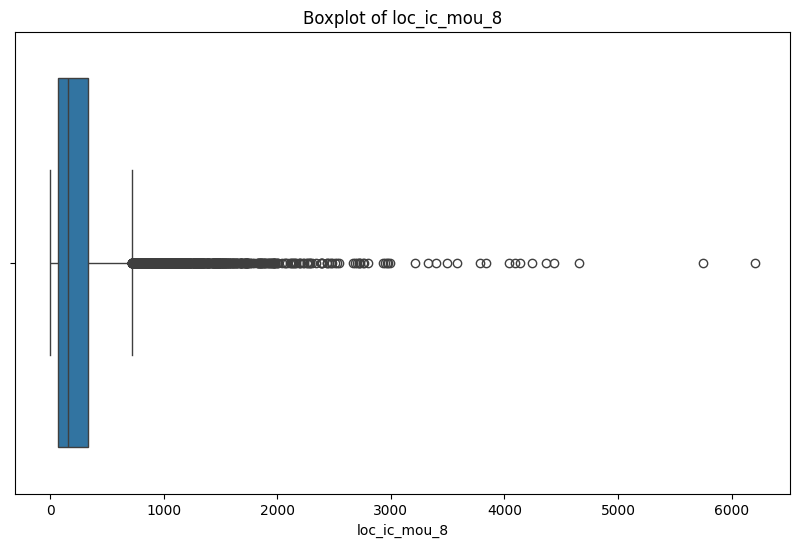

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='std_ic_t2t_mou_6'>

Text(0.5, 1.0, 'Boxplot of std_ic_t2t_mou_6')

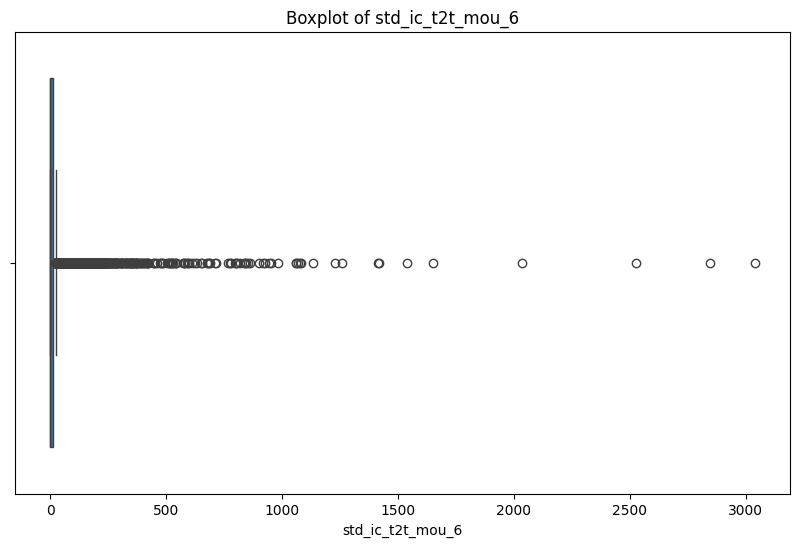

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='std_ic_t2t_mou_7'>

Text(0.5, 1.0, 'Boxplot of std_ic_t2t_mou_7')

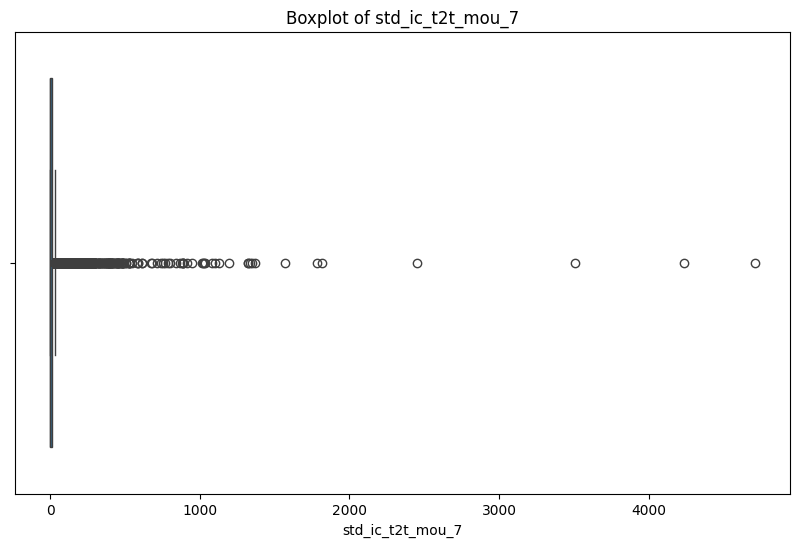

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='std_ic_t2t_mou_8'>

Text(0.5, 1.0, 'Boxplot of std_ic_t2t_mou_8')

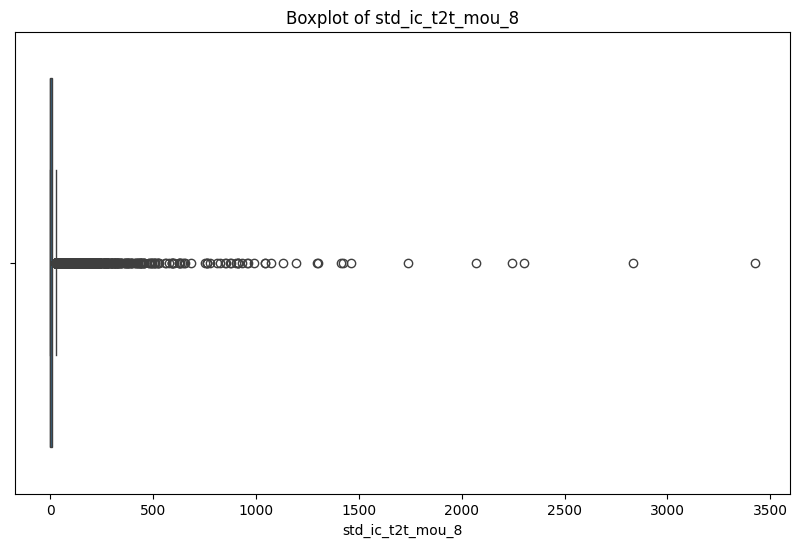

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='std_ic_t2m_mou_6'>

Text(0.5, 1.0, 'Boxplot of std_ic_t2m_mou_6')

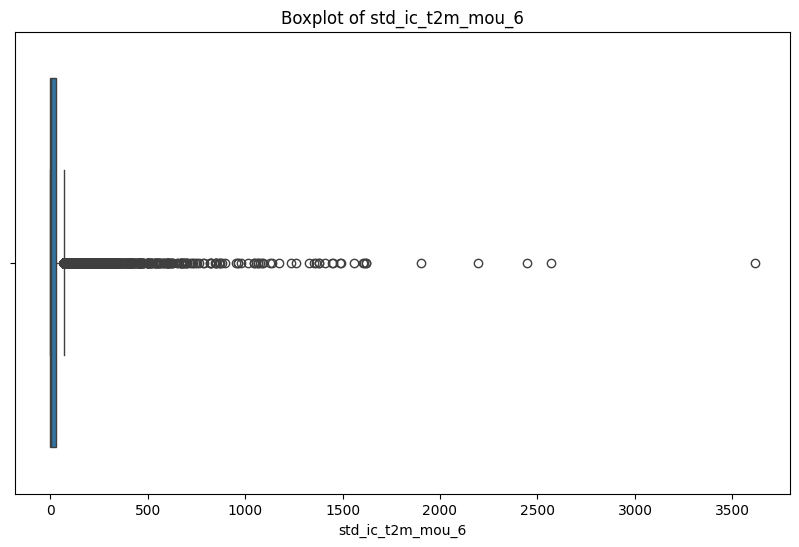

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='std_ic_t2m_mou_7'>

Text(0.5, 1.0, 'Boxplot of std_ic_t2m_mou_7')

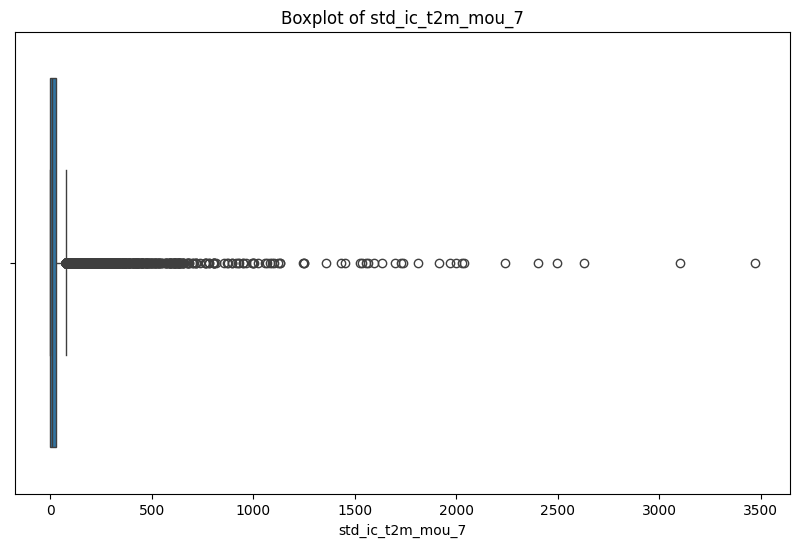

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='std_ic_t2m_mou_8'>

Text(0.5, 1.0, 'Boxplot of std_ic_t2m_mou_8')

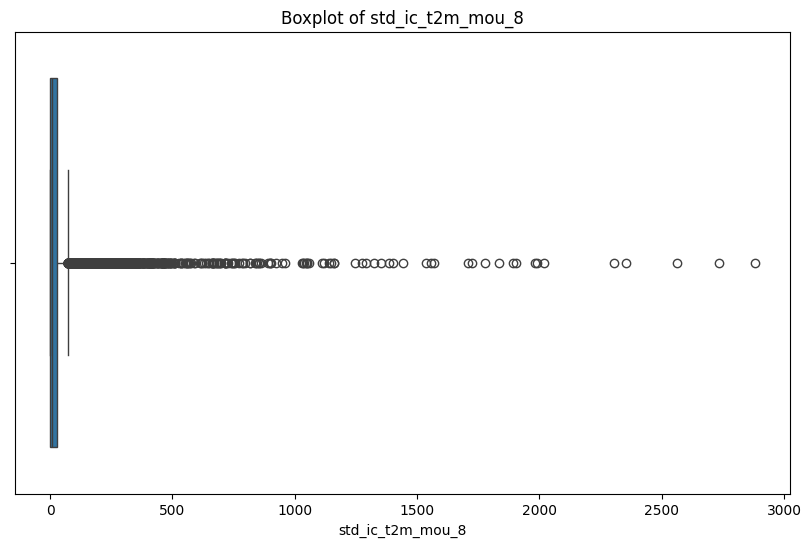

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='std_ic_t2f_mou_6'>

Text(0.5, 1.0, 'Boxplot of std_ic_t2f_mou_6')

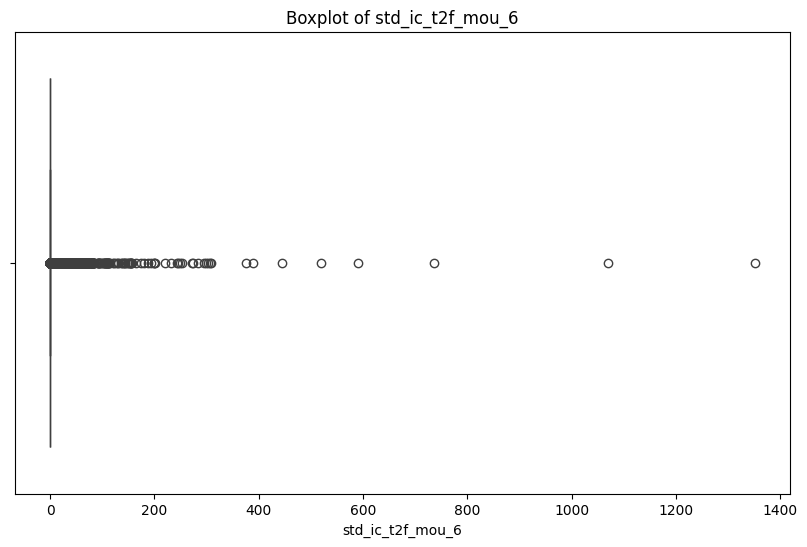

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='std_ic_t2f_mou_7'>

Text(0.5, 1.0, 'Boxplot of std_ic_t2f_mou_7')

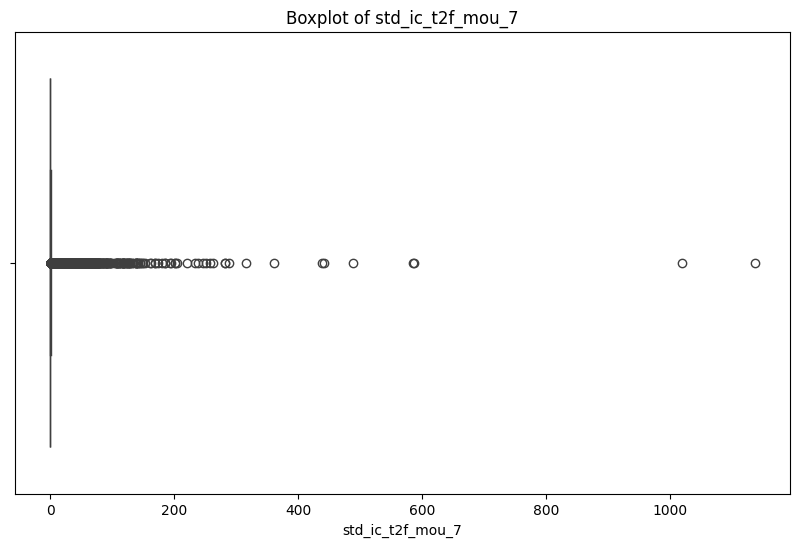

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='std_ic_t2f_mou_8'>

Text(0.5, 1.0, 'Boxplot of std_ic_t2f_mou_8')

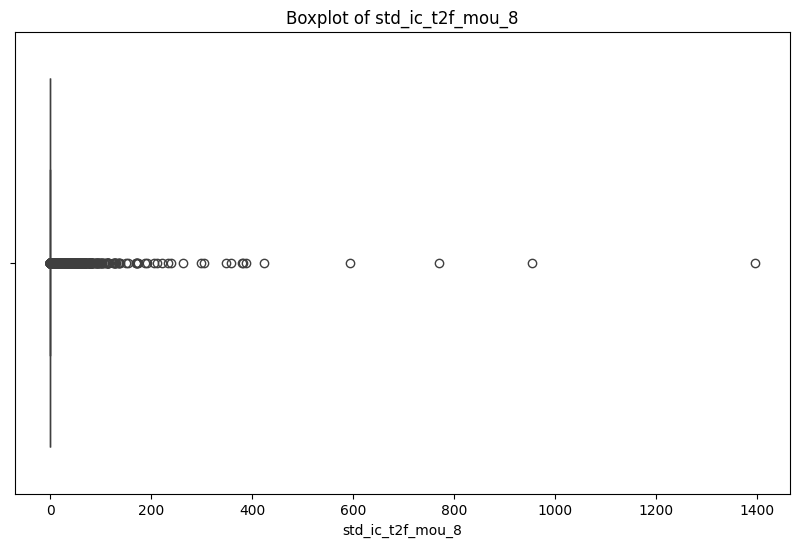

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='std_ic_mou_6'>

Text(0.5, 1.0, 'Boxplot of std_ic_mou_6')

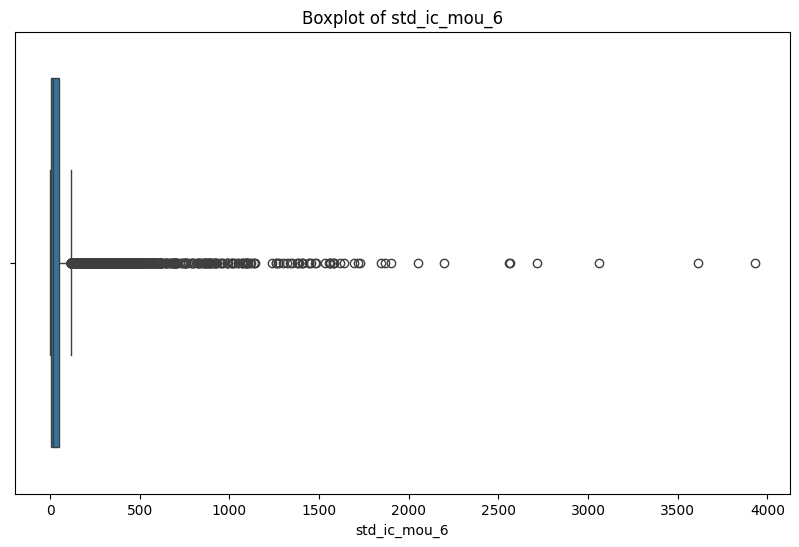

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='std_ic_mou_7'>

Text(0.5, 1.0, 'Boxplot of std_ic_mou_7')

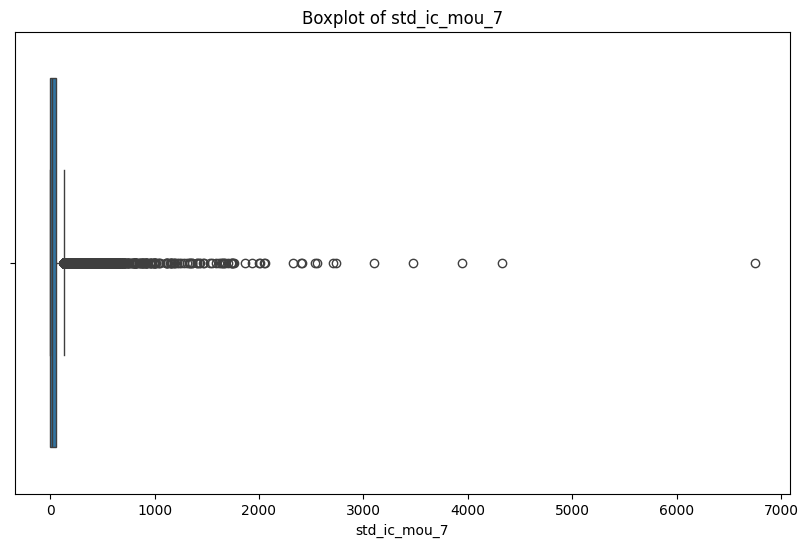

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='std_ic_mou_8'>

Text(0.5, 1.0, 'Boxplot of std_ic_mou_8')

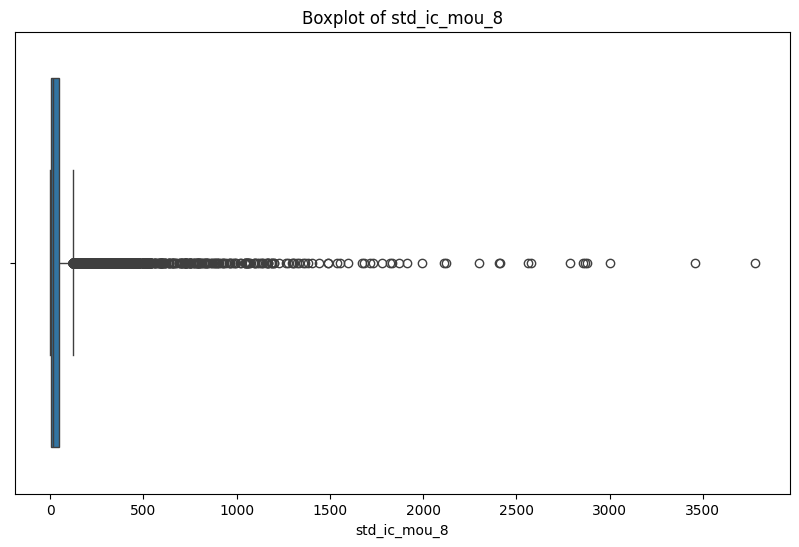

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='total_ic_mou_6'>

Text(0.5, 1.0, 'Boxplot of total_ic_mou_6')

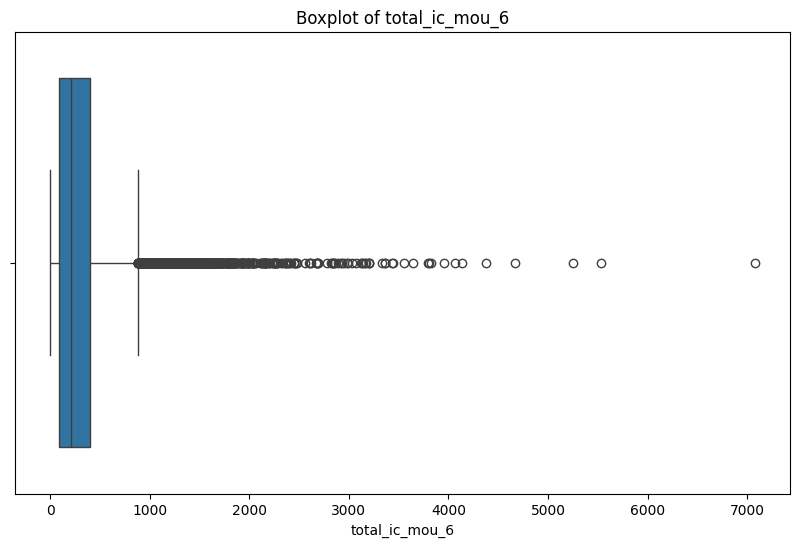

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='total_ic_mou_7'>

Text(0.5, 1.0, 'Boxplot of total_ic_mou_7')

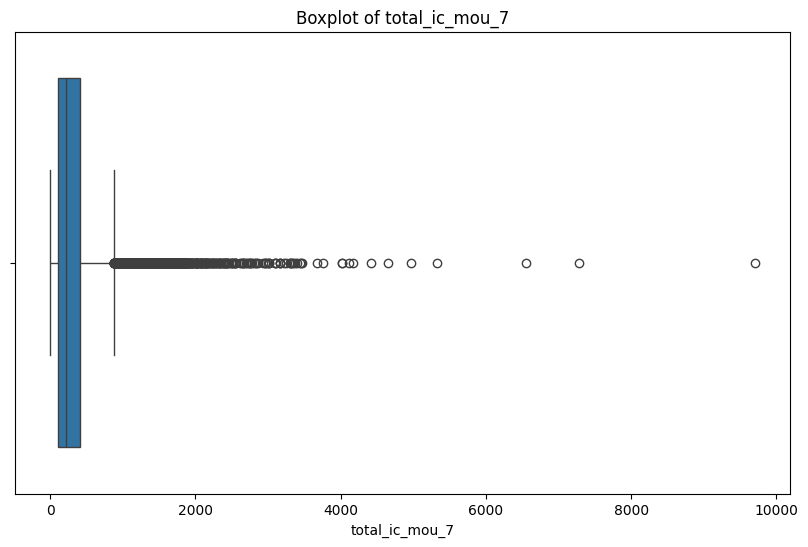

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='total_ic_mou_8'>

Text(0.5, 1.0, 'Boxplot of total_ic_mou_8')

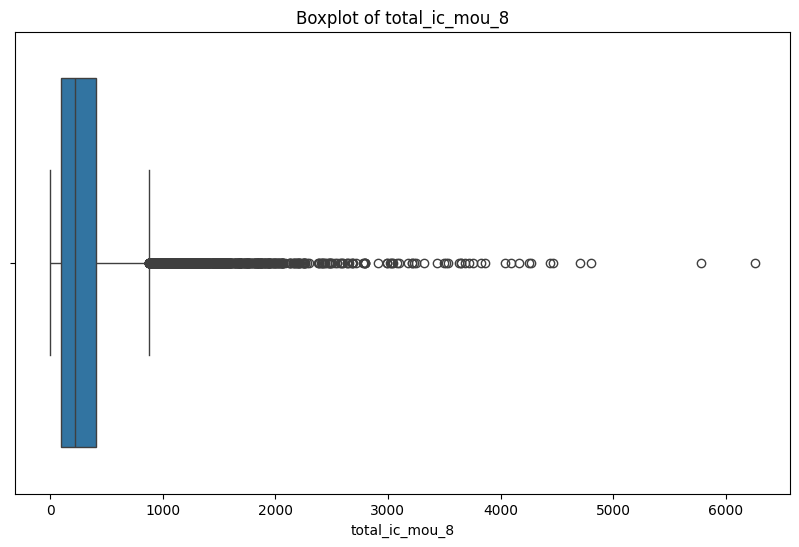

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='spl_ic_mou_6'>

Text(0.5, 1.0, 'Boxplot of spl_ic_mou_6')

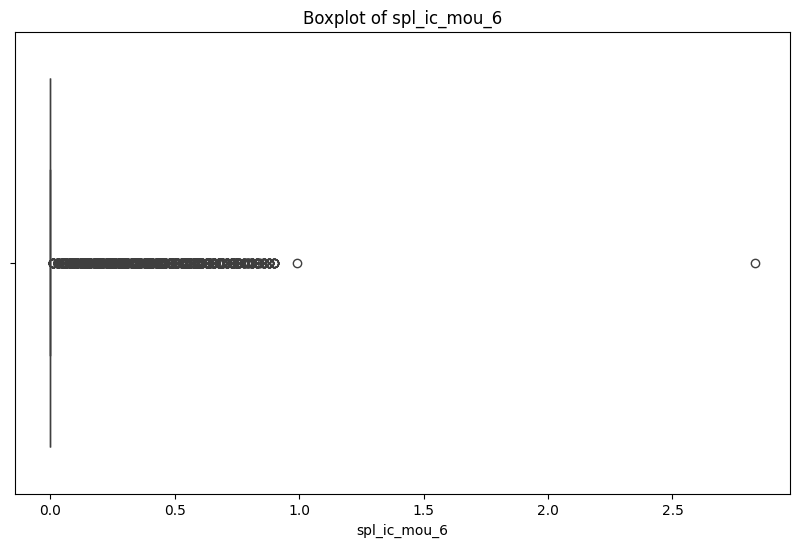

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='spl_ic_mou_7'>

Text(0.5, 1.0, 'Boxplot of spl_ic_mou_7')

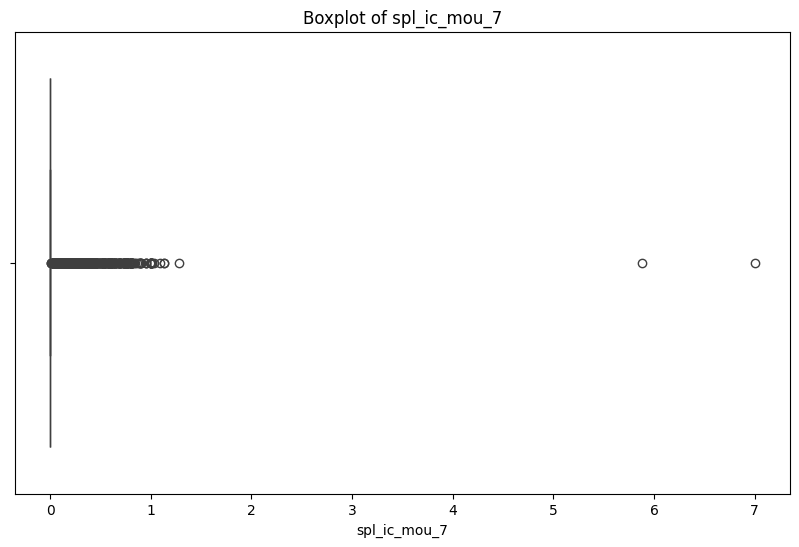

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='spl_ic_mou_8'>

Text(0.5, 1.0, 'Boxplot of spl_ic_mou_8')

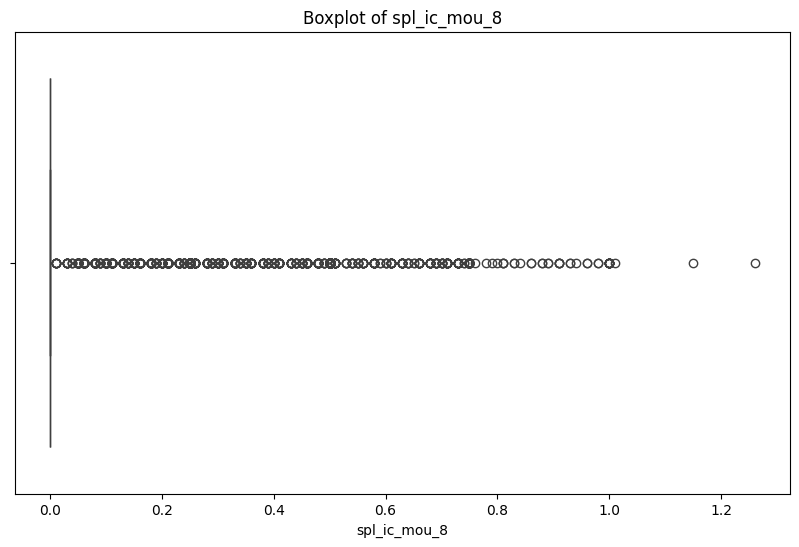

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='isd_ic_mou_6'>

Text(0.5, 1.0, 'Boxplot of isd_ic_mou_6')

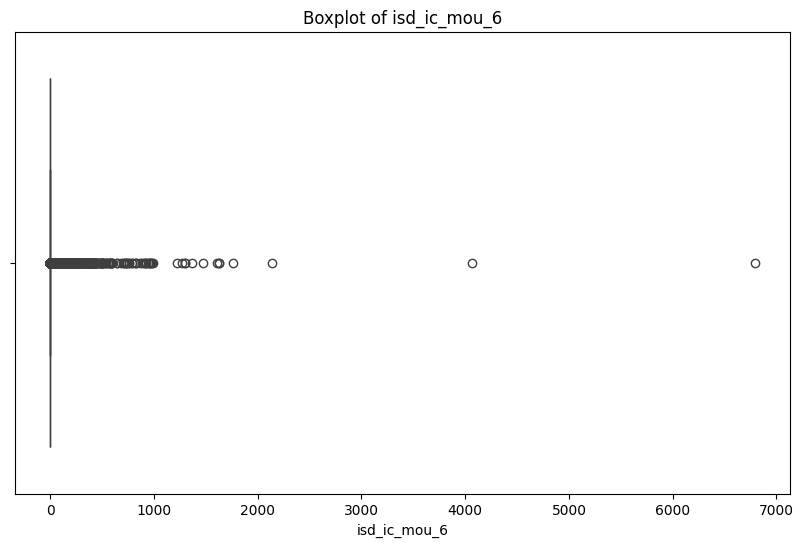

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='isd_ic_mou_7'>

Text(0.5, 1.0, 'Boxplot of isd_ic_mou_7')

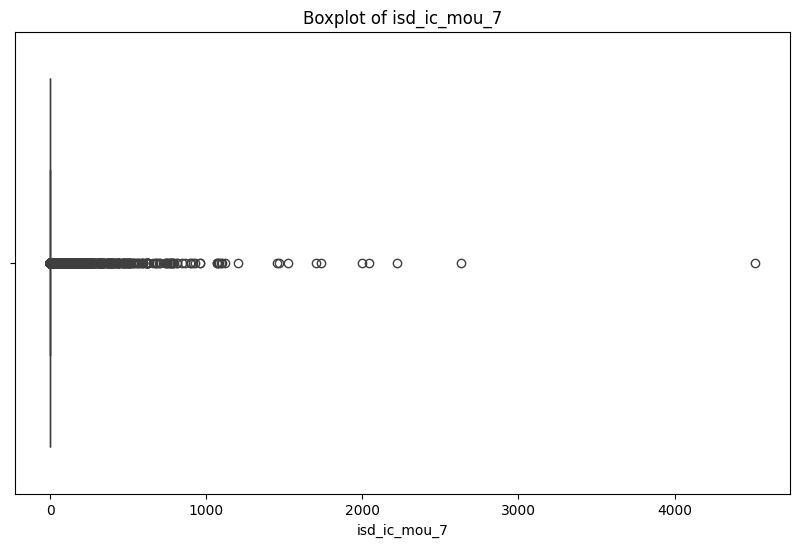

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='isd_ic_mou_8'>

Text(0.5, 1.0, 'Boxplot of isd_ic_mou_8')

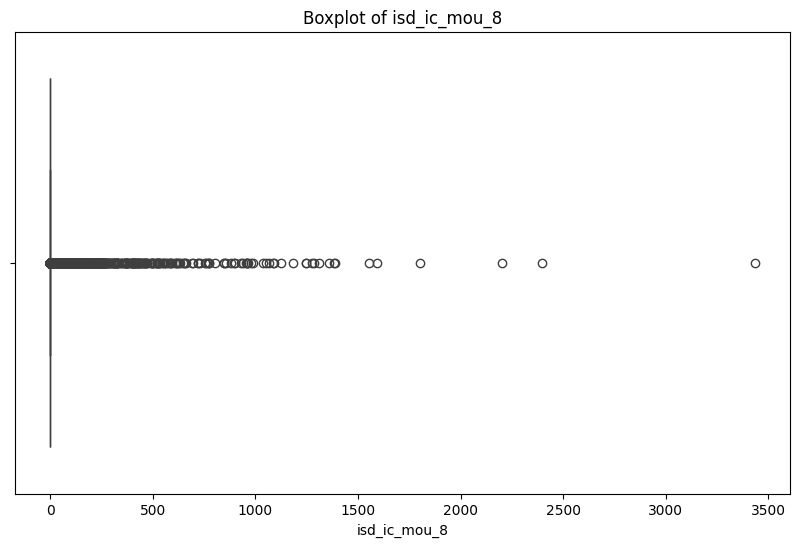

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='ic_others_6'>

Text(0.5, 1.0, 'Boxplot of ic_others_6')

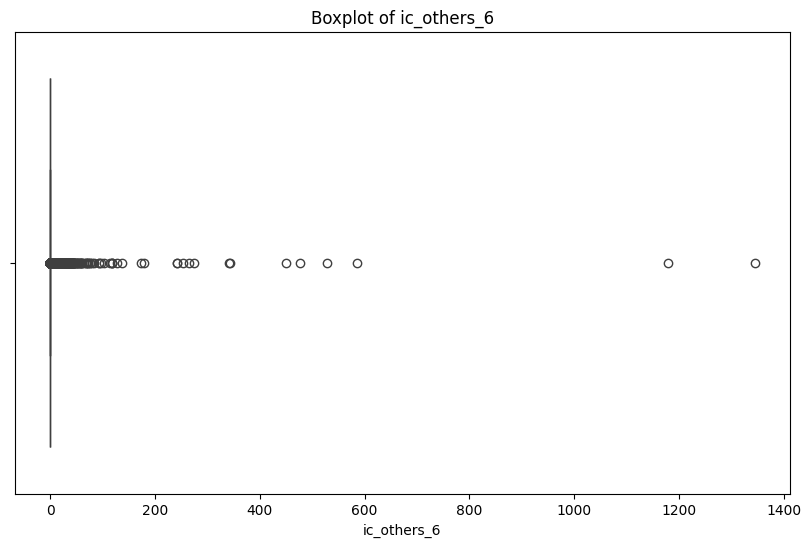

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='ic_others_7'>

Text(0.5, 1.0, 'Boxplot of ic_others_7')

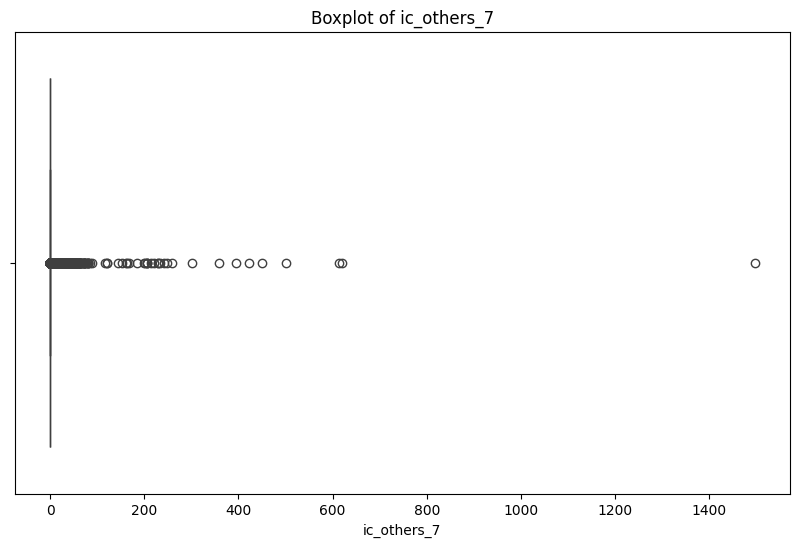

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='ic_others_8'>

Text(0.5, 1.0, 'Boxplot of ic_others_8')

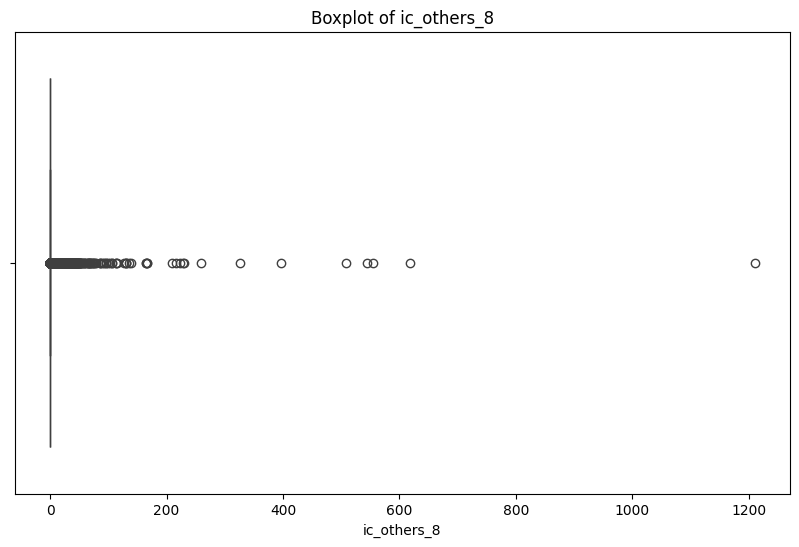

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='total_rech_num_6'>

Text(0.5, 1.0, 'Boxplot of total_rech_num_6')

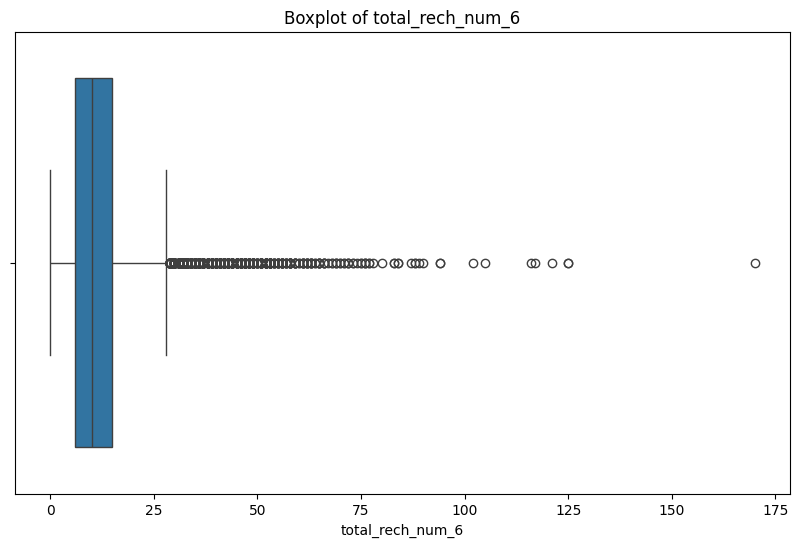

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='total_rech_num_7'>

Text(0.5, 1.0, 'Boxplot of total_rech_num_7')

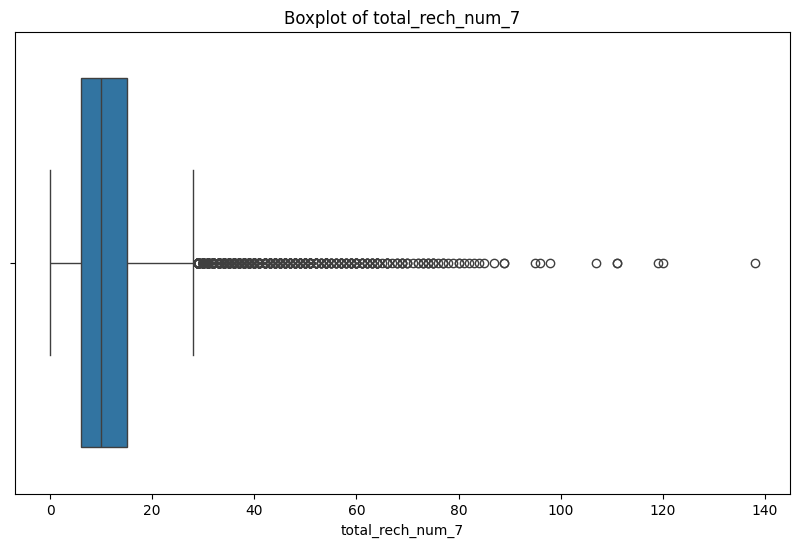

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='total_rech_num_8'>

Text(0.5, 1.0, 'Boxplot of total_rech_num_8')

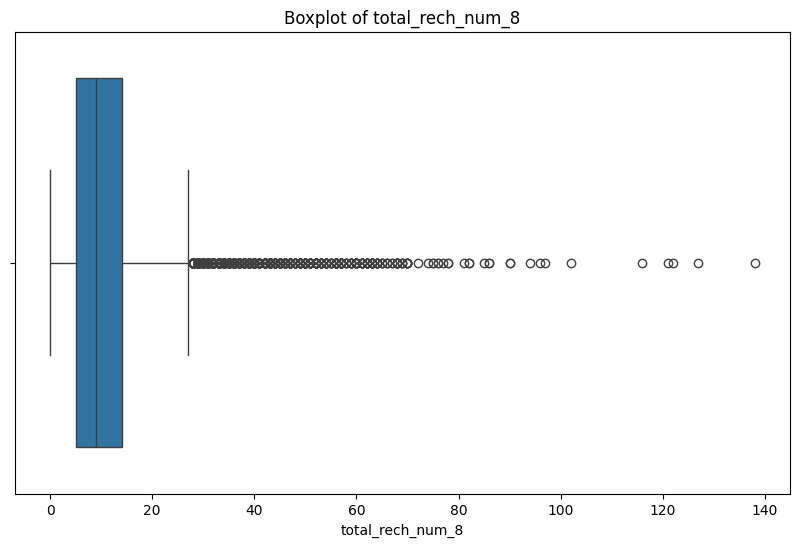

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='max_rech_amt_6'>

Text(0.5, 1.0, 'Boxplot of max_rech_amt_6')

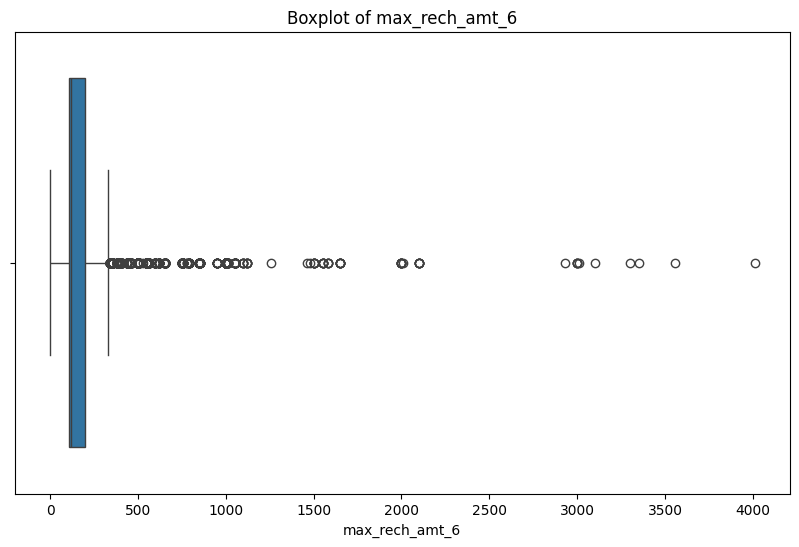

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='max_rech_amt_7'>

Text(0.5, 1.0, 'Boxplot of max_rech_amt_7')

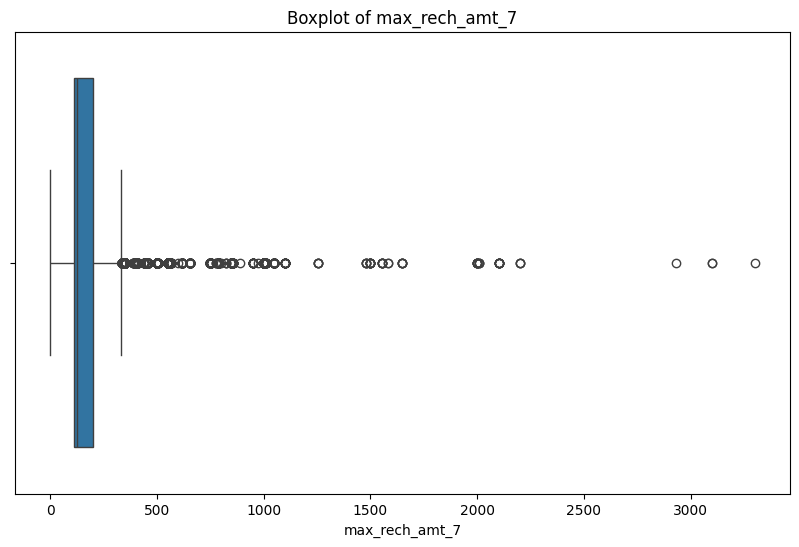

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='max_rech_amt_8'>

Text(0.5, 1.0, 'Boxplot of max_rech_amt_8')

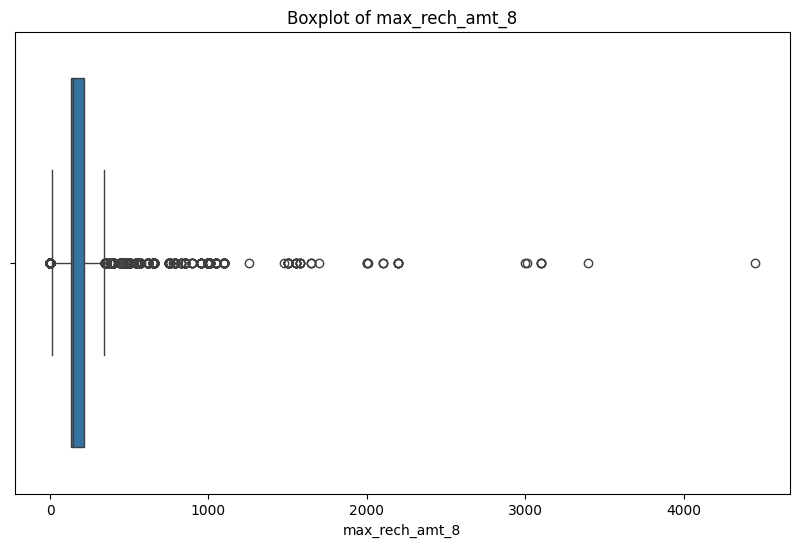

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='last_day_rch_amt_6'>

Text(0.5, 1.0, 'Boxplot of last_day_rch_amt_6')

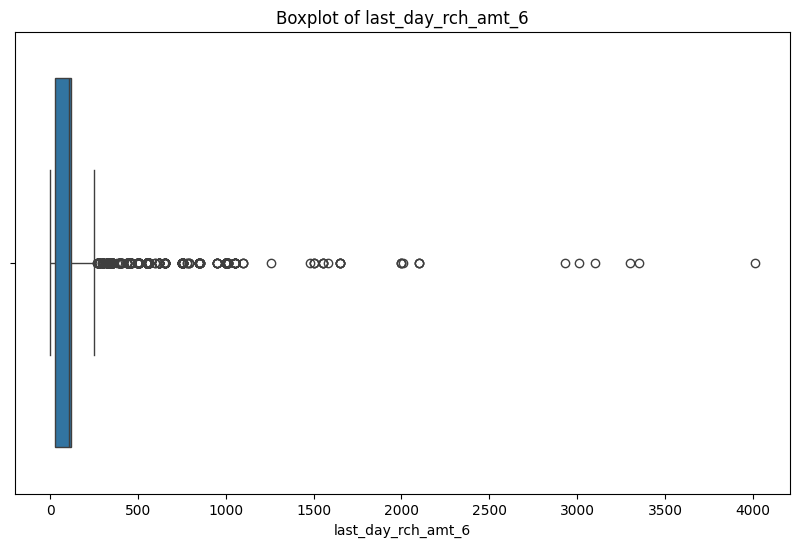

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='last_day_rch_amt_7'>

Text(0.5, 1.0, 'Boxplot of last_day_rch_amt_7')

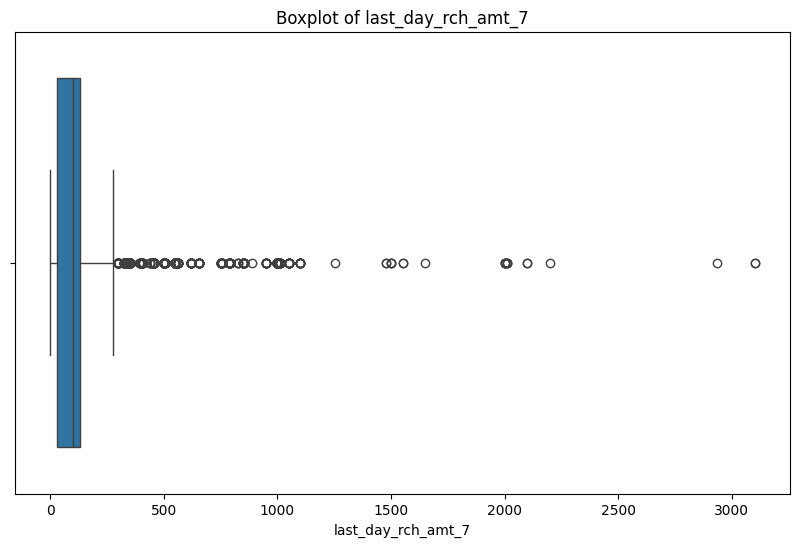

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='last_day_rch_amt_8'>

Text(0.5, 1.0, 'Boxplot of last_day_rch_amt_8')

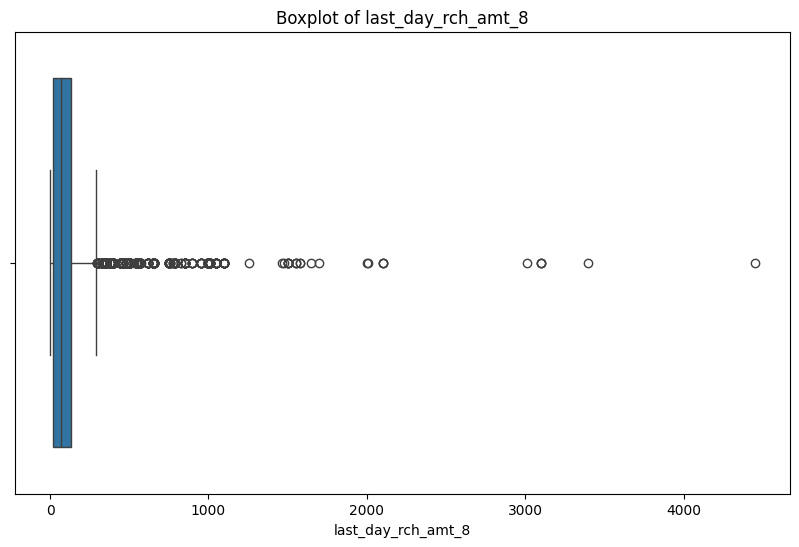

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='vol_2g_mb_6'>

Text(0.5, 1.0, 'Boxplot of vol_2g_mb_6')

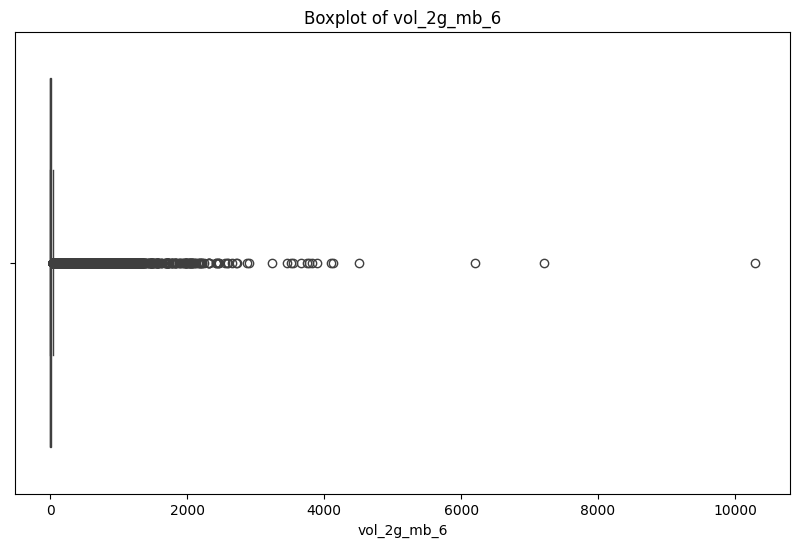

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='vol_2g_mb_7'>

Text(0.5, 1.0, 'Boxplot of vol_2g_mb_7')

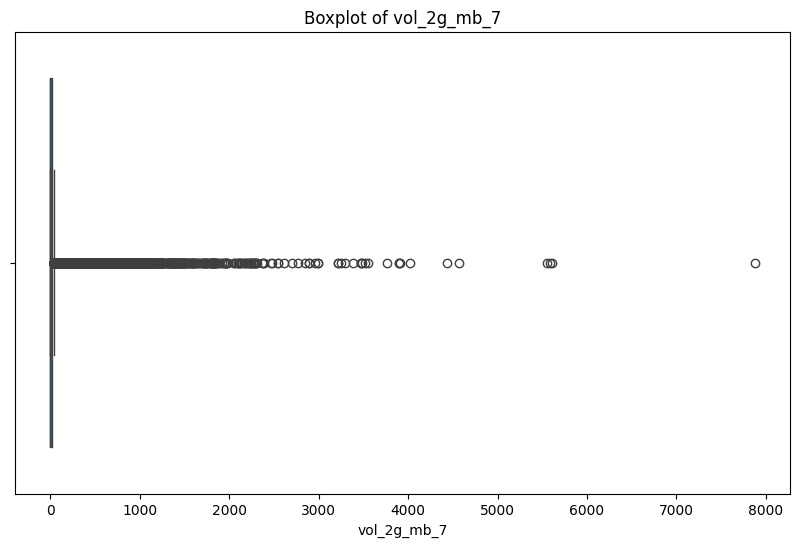

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='vol_2g_mb_8'>

Text(0.5, 1.0, 'Boxplot of vol_2g_mb_8')

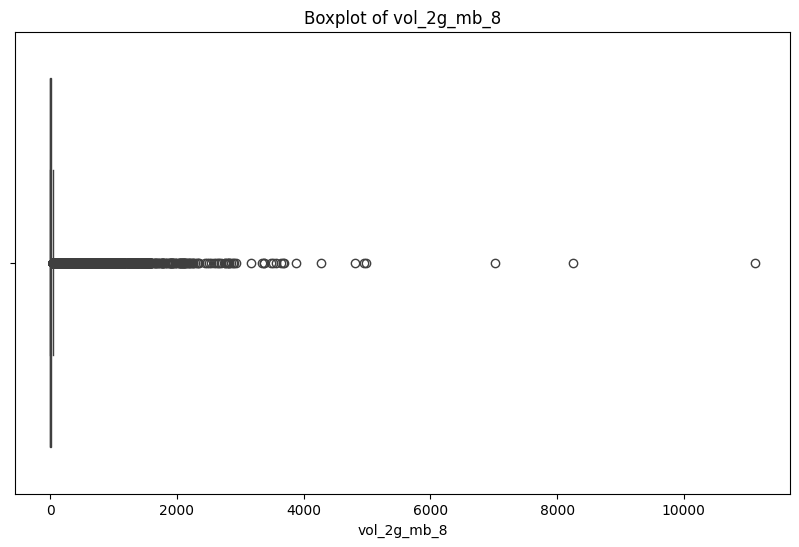

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='vol_3g_mb_6'>

Text(0.5, 1.0, 'Boxplot of vol_3g_mb_6')

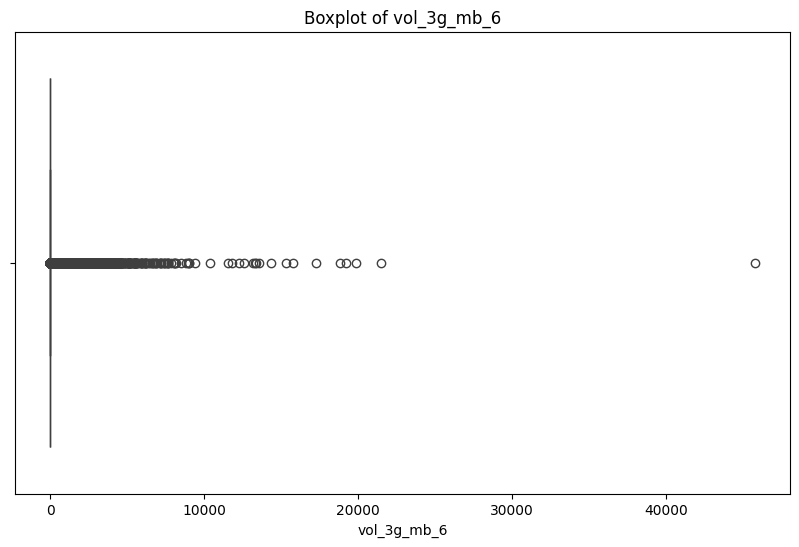

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='vol_3g_mb_7'>

Text(0.5, 1.0, 'Boxplot of vol_3g_mb_7')

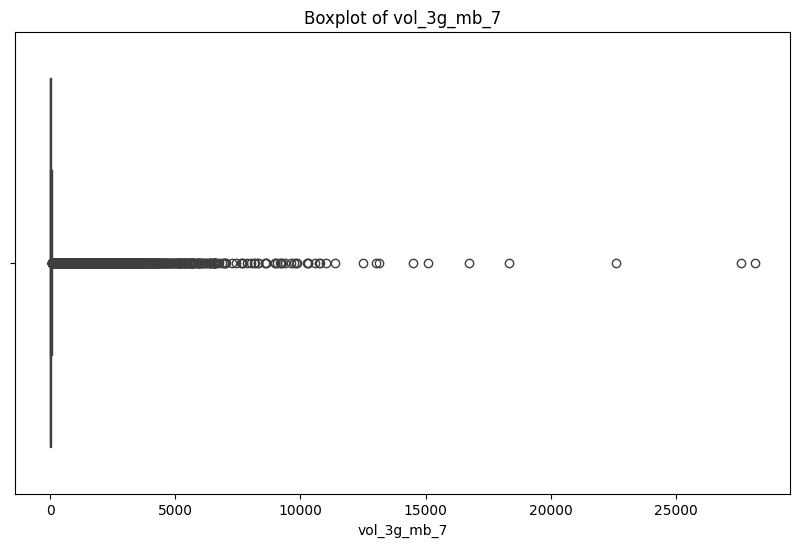

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='vol_3g_mb_8'>

Text(0.5, 1.0, 'Boxplot of vol_3g_mb_8')

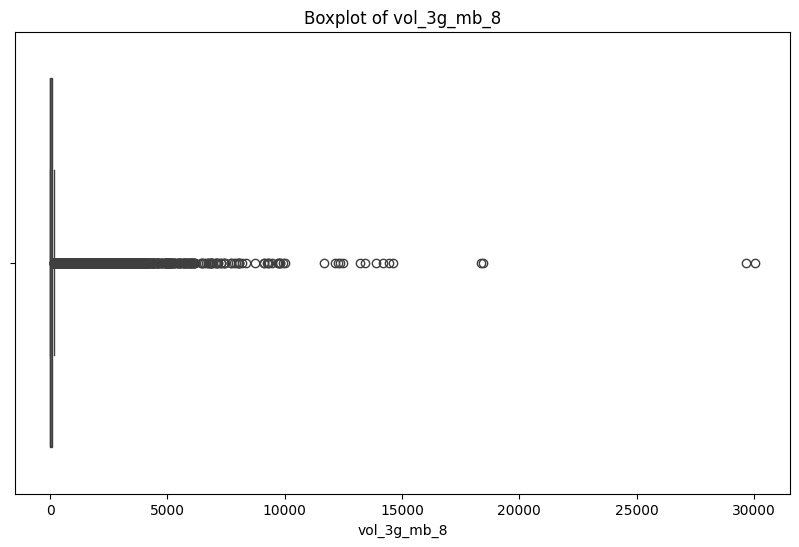

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='monthly_2g_6'>

Text(0.5, 1.0, 'Boxplot of monthly_2g_6')

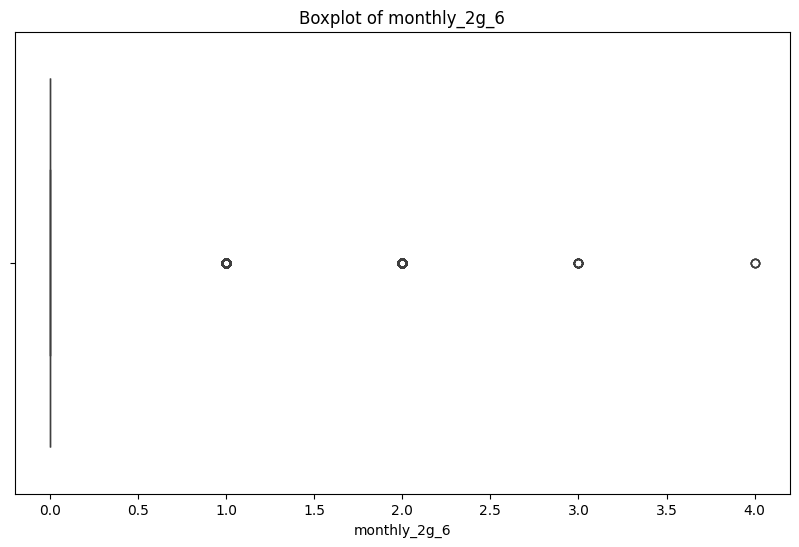

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='monthly_2g_7'>

Text(0.5, 1.0, 'Boxplot of monthly_2g_7')

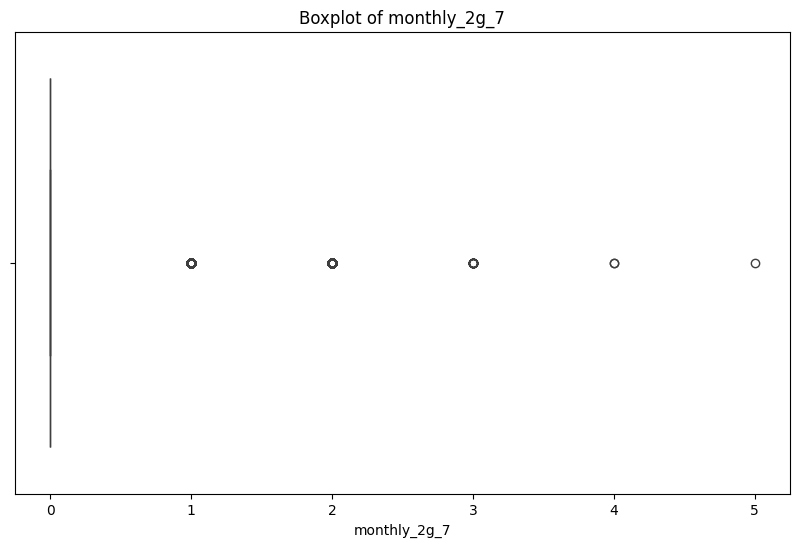

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='monthly_2g_8'>

Text(0.5, 1.0, 'Boxplot of monthly_2g_8')

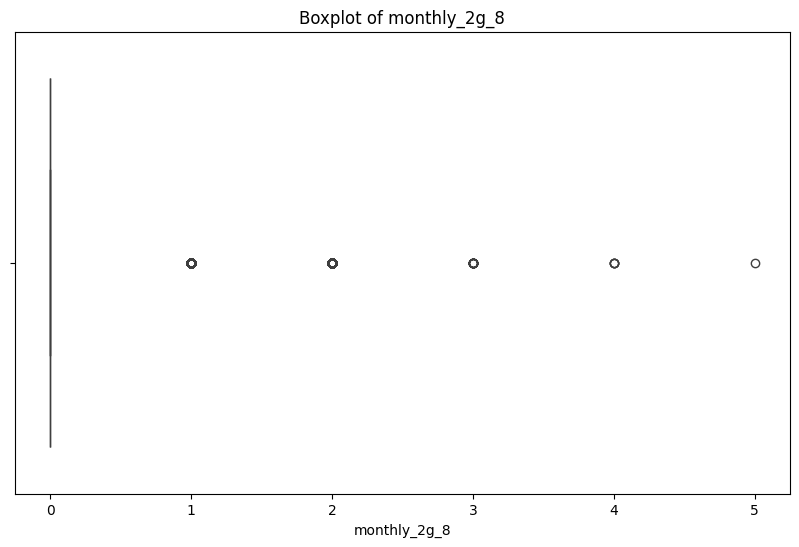

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='sachet_2g_6'>

Text(0.5, 1.0, 'Boxplot of sachet_2g_6')

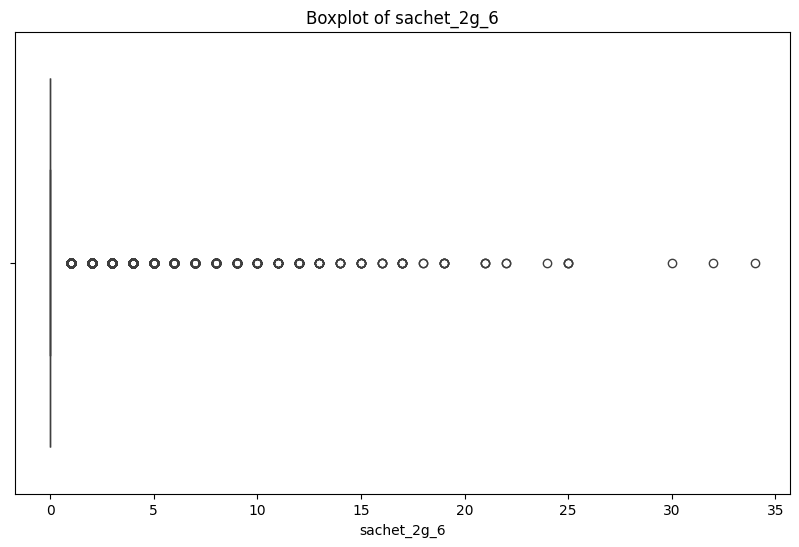

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='sachet_2g_7'>

Text(0.5, 1.0, 'Boxplot of sachet_2g_7')

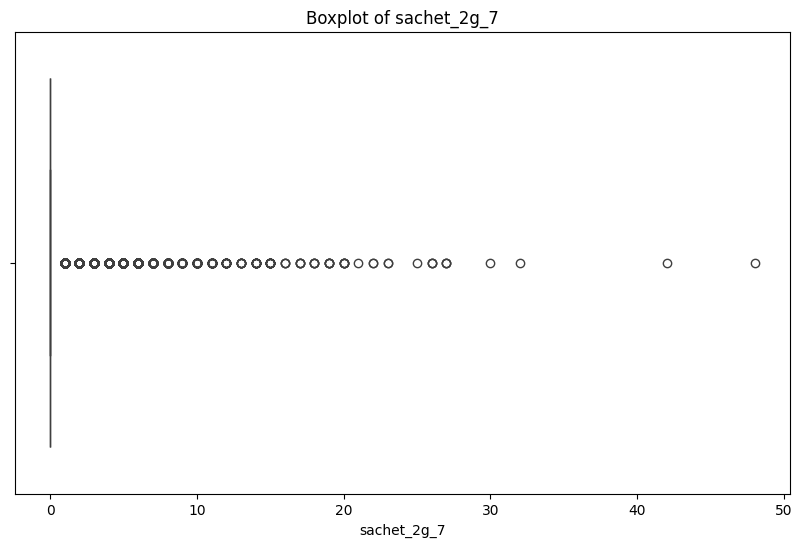

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='sachet_2g_8'>

Text(0.5, 1.0, 'Boxplot of sachet_2g_8')

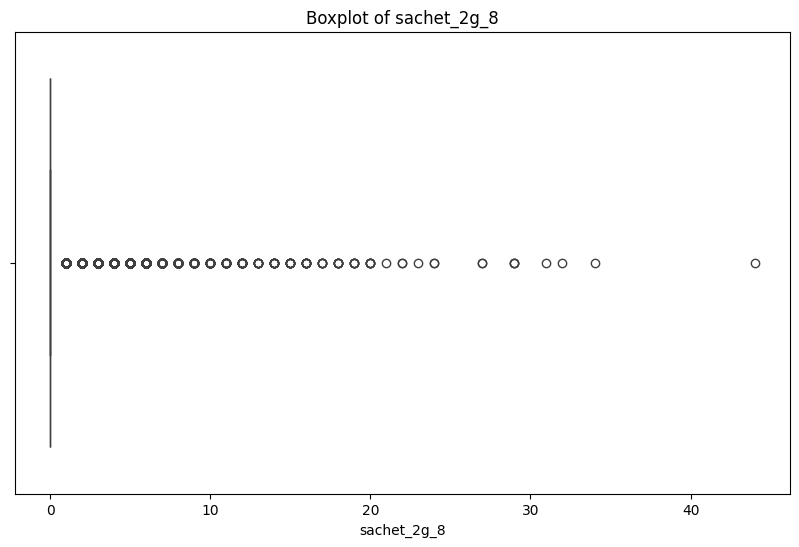

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='monthly_3g_6'>

Text(0.5, 1.0, 'Boxplot of monthly_3g_6')

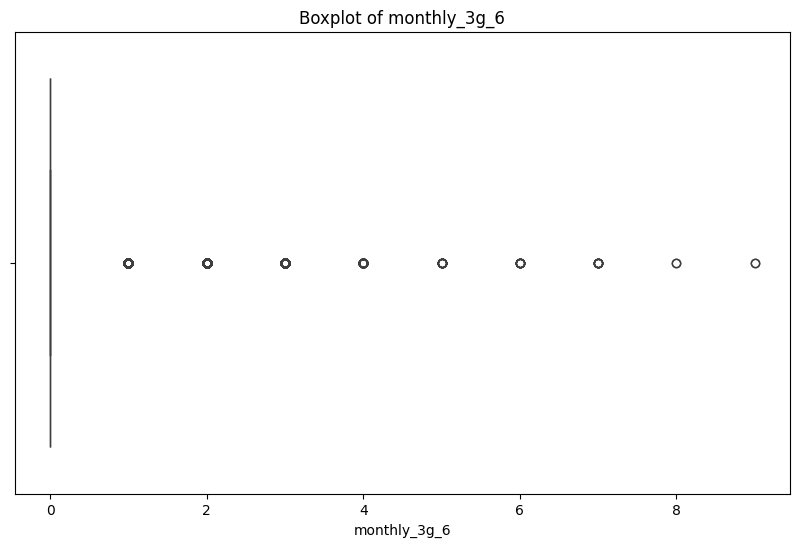

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='monthly_3g_7'>

Text(0.5, 1.0, 'Boxplot of monthly_3g_7')

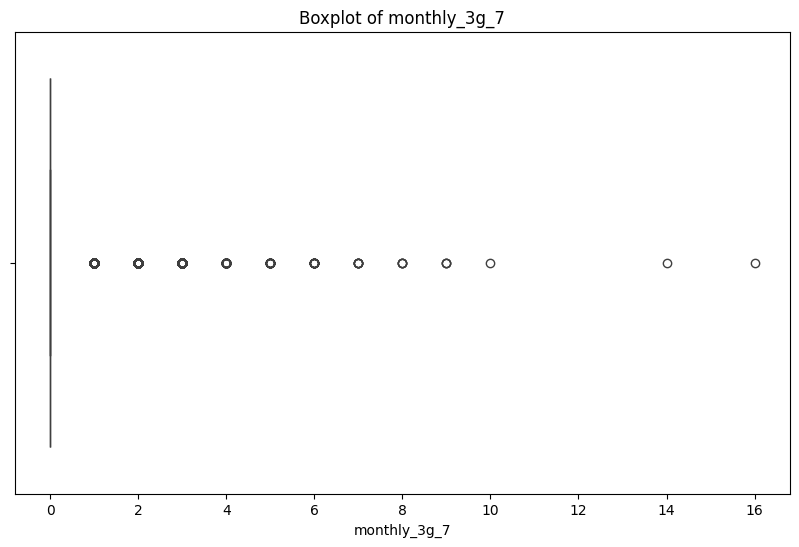

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='monthly_3g_8'>

Text(0.5, 1.0, 'Boxplot of monthly_3g_8')

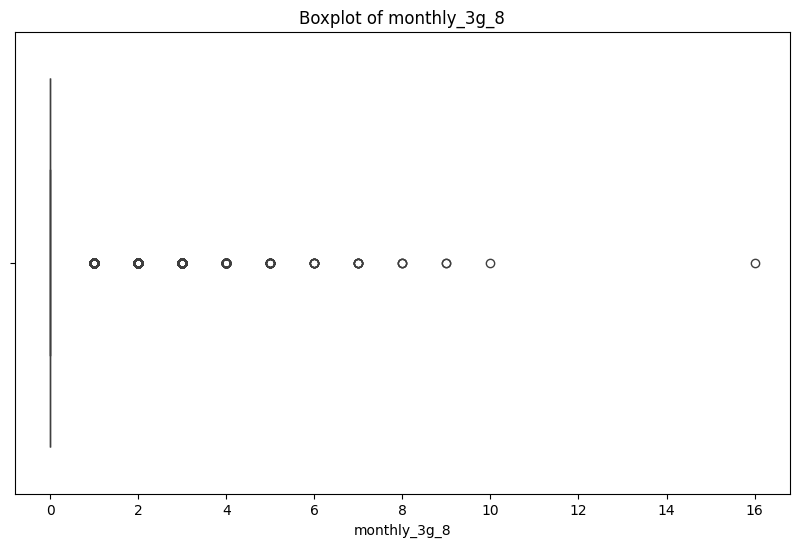

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='sachet_3g_6'>

Text(0.5, 1.0, 'Boxplot of sachet_3g_6')

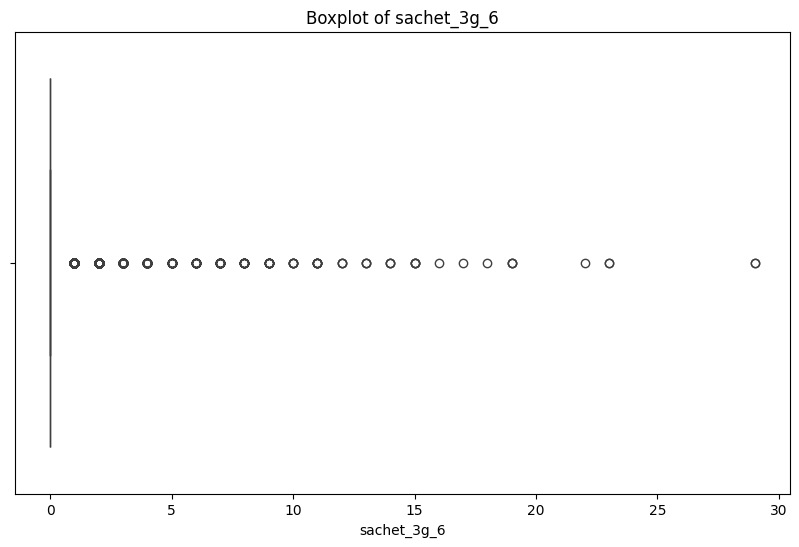

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='sachet_3g_7'>

Text(0.5, 1.0, 'Boxplot of sachet_3g_7')

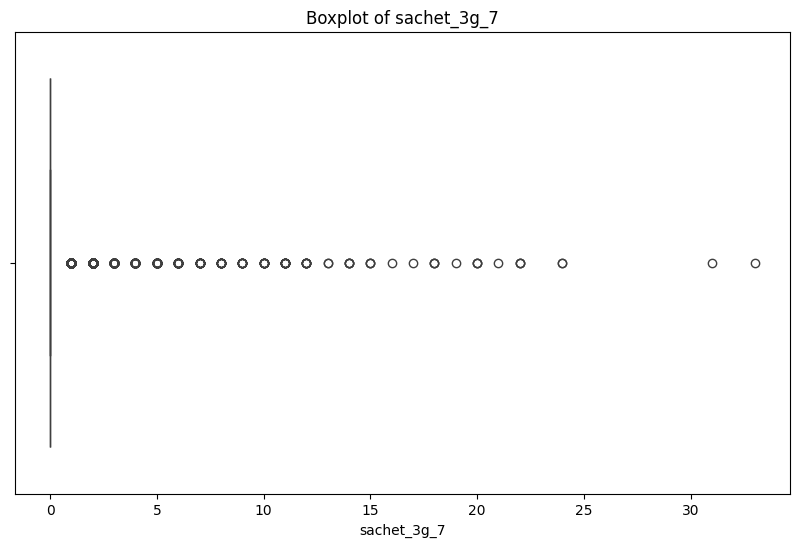

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='sachet_3g_8'>

Text(0.5, 1.0, 'Boxplot of sachet_3g_8')

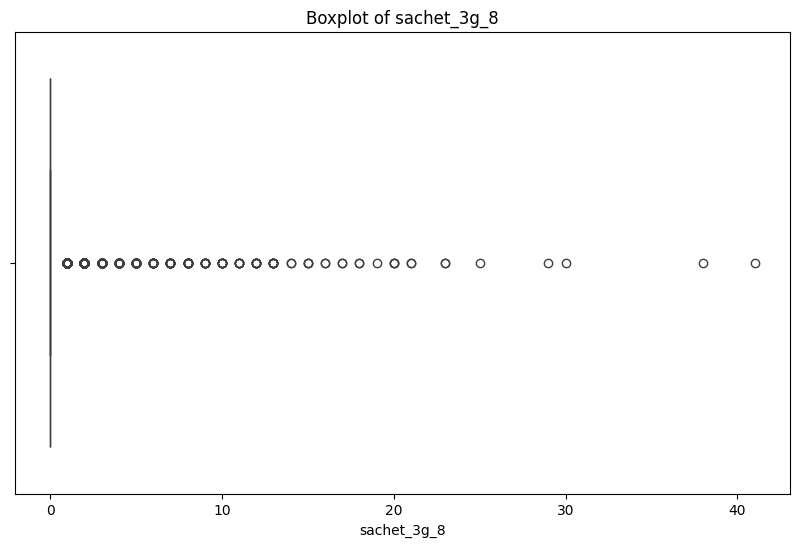

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='aon'>

Text(0.5, 1.0, 'Boxplot of aon')

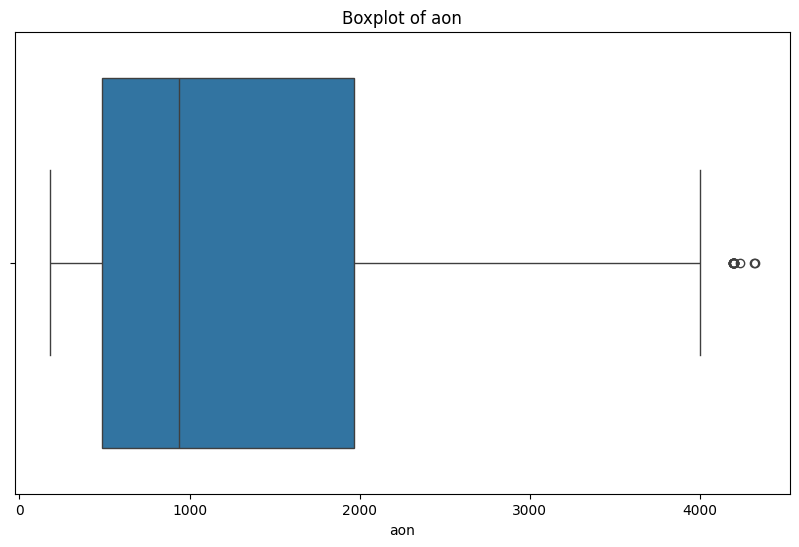

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='aug_vbc_3g'>

Text(0.5, 1.0, 'Boxplot of aug_vbc_3g')

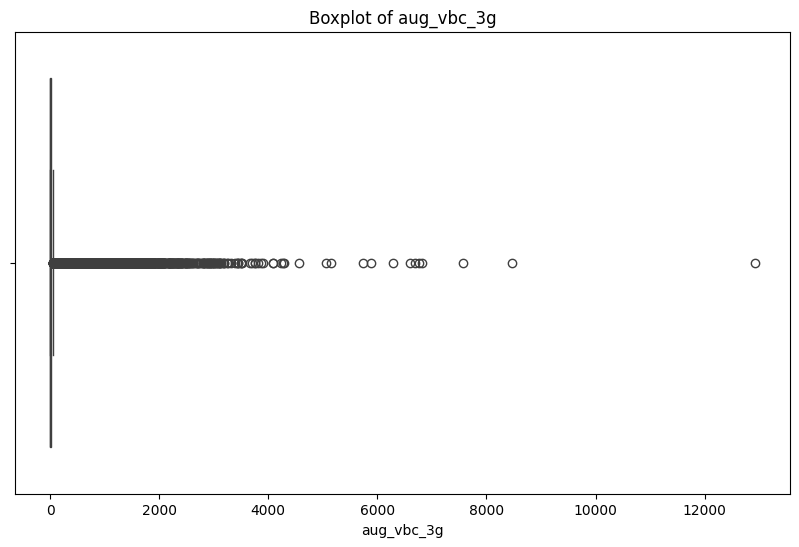

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='jul_vbc_3g'>

Text(0.5, 1.0, 'Boxplot of jul_vbc_3g')

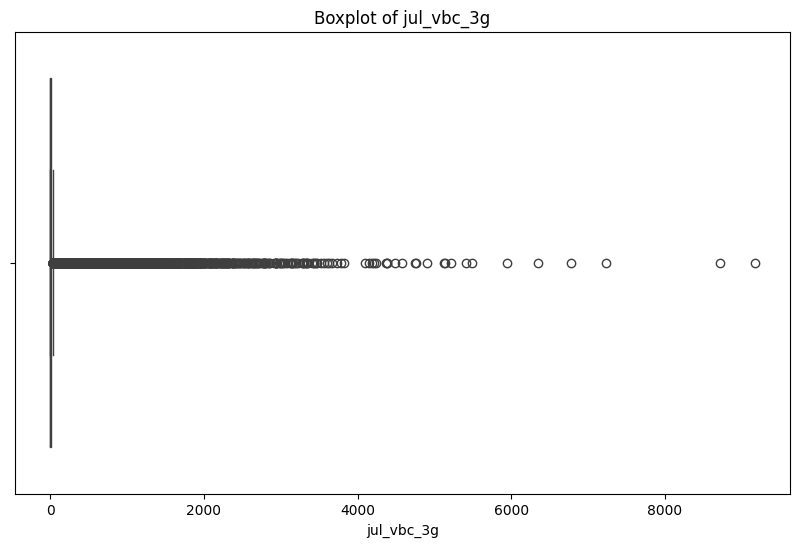

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='jun_vbc_3g'>

Text(0.5, 1.0, 'Boxplot of jun_vbc_3g')

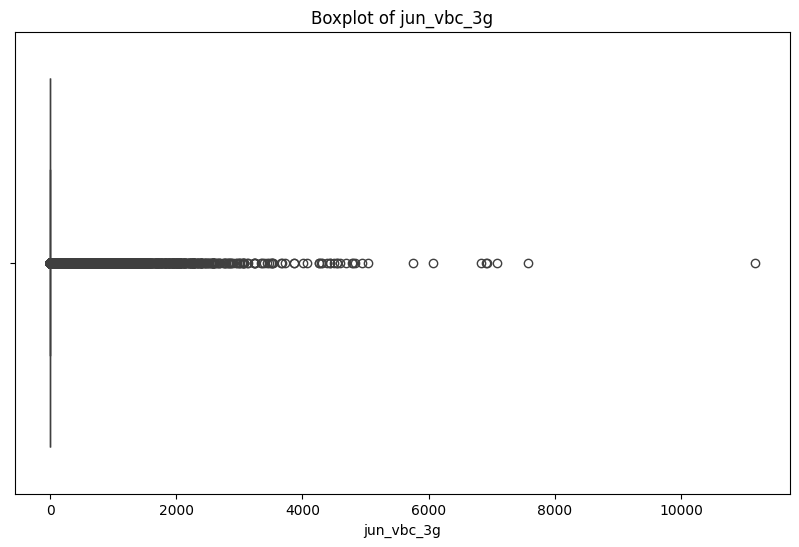

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='total_recharge_amount'>

Text(0.5, 1.0, 'Boxplot of total_recharge_amount')

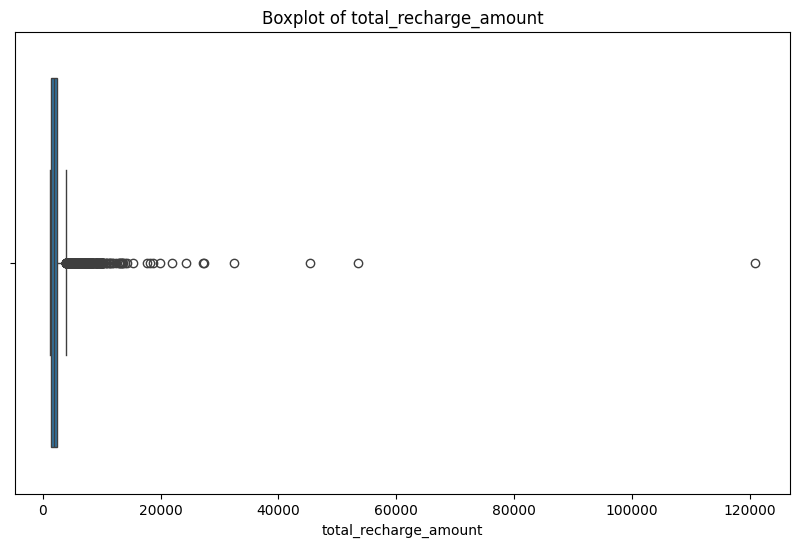

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='onnet_offnet_ratio'>

Text(0.5, 1.0, 'Boxplot of onnet_offnet_ratio')

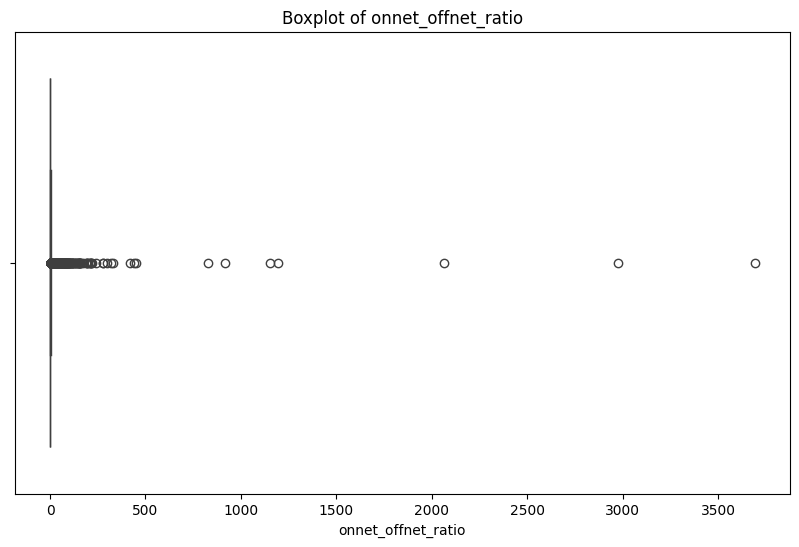

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='total_calls_mou_8'>

Text(0.5, 1.0, 'Boxplot of total_calls_mou_8')

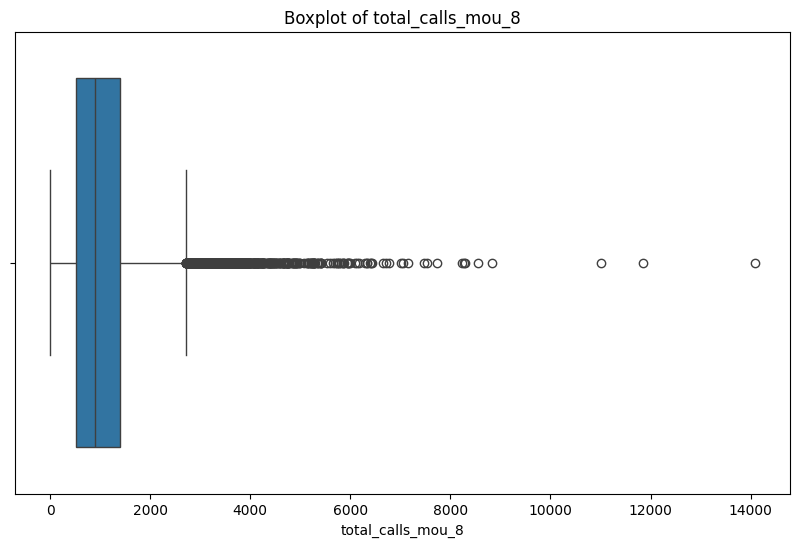

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='2g_3g_consumption'>

Text(0.5, 1.0, 'Boxplot of 2g_3g_consumption')

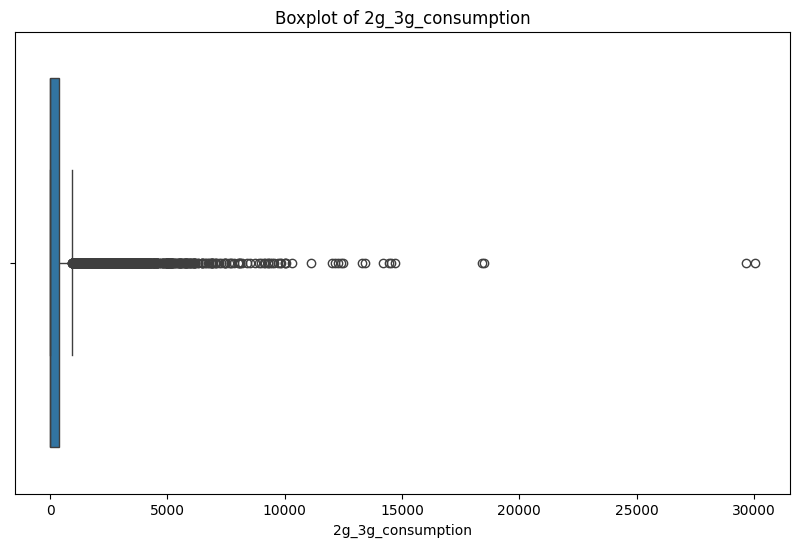

In [ ]:
#Identifying outliers
import matplotlib.pyplot as plt
import seaborn as sns

# Identify outliers using boxplots
numeric_columns = train_cleaned_filtered.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=train_cleaned_filtered, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

In [ ]:
categorical_columns = train_cleaned_filtered.select_dtypes(include=['object', 'category']).columns
category_counts = categorical_columns.value_counts(normalize=True)
outliers = category_counts[category_counts < 0.01].index


In [ ]:
outliers

Index([], dtype='object')

In [ ]:
train_cleaned_filtered_no_outliers = train_cleaned_filtered


In [ ]:
from scipy import stats
import numpy as np

# Z-score method to remove outliers
z_scores = np.abs(stats.zscore(train_cleaned_filtered_no_outliers[numeric_columns]))
train_cleaned_filtered = train_cleaned_filtered_no_outliers[(z_scores < 3).all(axis=1)]

print("Shape of the dataset after removing outliers:", train_cleaned_filtered_no_outliers.shape)


Shape of the dataset after removing outliers: (17523, 130)


In [ ]:
def get_highly_correlated_pairs(corr_matrix, threshold=0.8):
    highly_correlated_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                highly_correlated_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
    return highly_correlated_pairs

correlation_matrix = train_cleaned_filtered_no_outliers.corr()
# Get pairs of highly correlated features
highly_correlated_pairs = get_highly_correlated_pairs(correlation_matrix, threshold=0.8)
print("Highly correlated pairs:")
for pair in highly_correlated_pairs:
    print(f"{pair[0]} and {pair[1]} with correlation {pair[2]:.2f}")


ValueError: could not convert string to float: '6/29/2014'

In [ ]:
# Check the data types of your columns
print(train_cleaned_filtered_no_outliers.dtypes)


id                        float64
arpu_6                    float64
arpu_7                    float64
arpu_8                    float64
onnet_mou_6               float64
onnet_mou_7               float64
onnet_mou_8               float64
offnet_mou_6              float64
offnet_mou_7              float64
offnet_mou_8              float64
roam_ic_mou_6             float64
roam_ic_mou_7             float64
roam_ic_mou_8             float64
roam_og_mou_6             float64
roam_og_mou_7             float64
roam_og_mou_8             float64
loc_og_t2t_mou_6          float64
loc_og_t2t_mou_7          float64
loc_og_t2t_mou_8          float64
loc_og_t2m_mou_6          float64
loc_og_t2m_mou_7          float64
loc_og_t2m_mou_8          float64
loc_og_t2f_mou_6          float64
loc_og_t2f_mou_7          float64
loc_og_t2f_mou_8          float64
loc_og_t2c_mou_6          float64
loc_og_t2c_mou_7          float64
loc_og_t2c_mou_8          float64
loc_og_mou_6              float64
loc_og_mou_7  

In [ ]:
# Convert date columns to datetime format
date_columns = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']
for col in date_columns:
    train_cleaned_filtered_no_outliers[col] = pd.to_datetime(train_cleaned_filtered_no_outliers[col], format='%m/%d/%Y', errors='coerce')


In [ ]:
# Extract the month from the date columns
for col in date_columns:
    train_cleaned_filtered_no_outliers[f'{col}_month'] = train_cleaned_filtered_no_outliers[col].dt.month


In [ ]:
# Drop the original date columns
train_cleaned_filtered_no_outliers = train_cleaned_filtered_no_outliers.drop(columns=date_columns)


In [ ]:
print(train_cleaned_filtered_no_outliers.head())

     id    arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  12.0   439.919  397.946  392.024       244.46       108.31        42.98   
1  15.0   580.549  377.294  338.286        10.43        24.99       194.43   
2  23.0  1130.948  905.506  479.762       859.53       372.71         0.89   
3  25.0   362.951  321.763  689.603       193.71       124.53       197.54   
4  27.0   390.489  350.985  421.300         8.58        11.48        12.68   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0        571.98        727.91        644.43            0.0            0.0   
1        317.11        341.79        197.09            0.0            0.0   
2        293.46        450.11        386.91            0.0            0.0   
3        423.21        184.88        556.61            0.0            0.0   
4        133.16        158.73        182.83            0.0            0.0   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0  

In [ ]:
train_cleaned_filtered_no_outliers['churn_probability'] = pd.to_numeric(train_cleaned_filtered_no_outliers['churn_probability'])

<Figure size 2000x2000 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix')

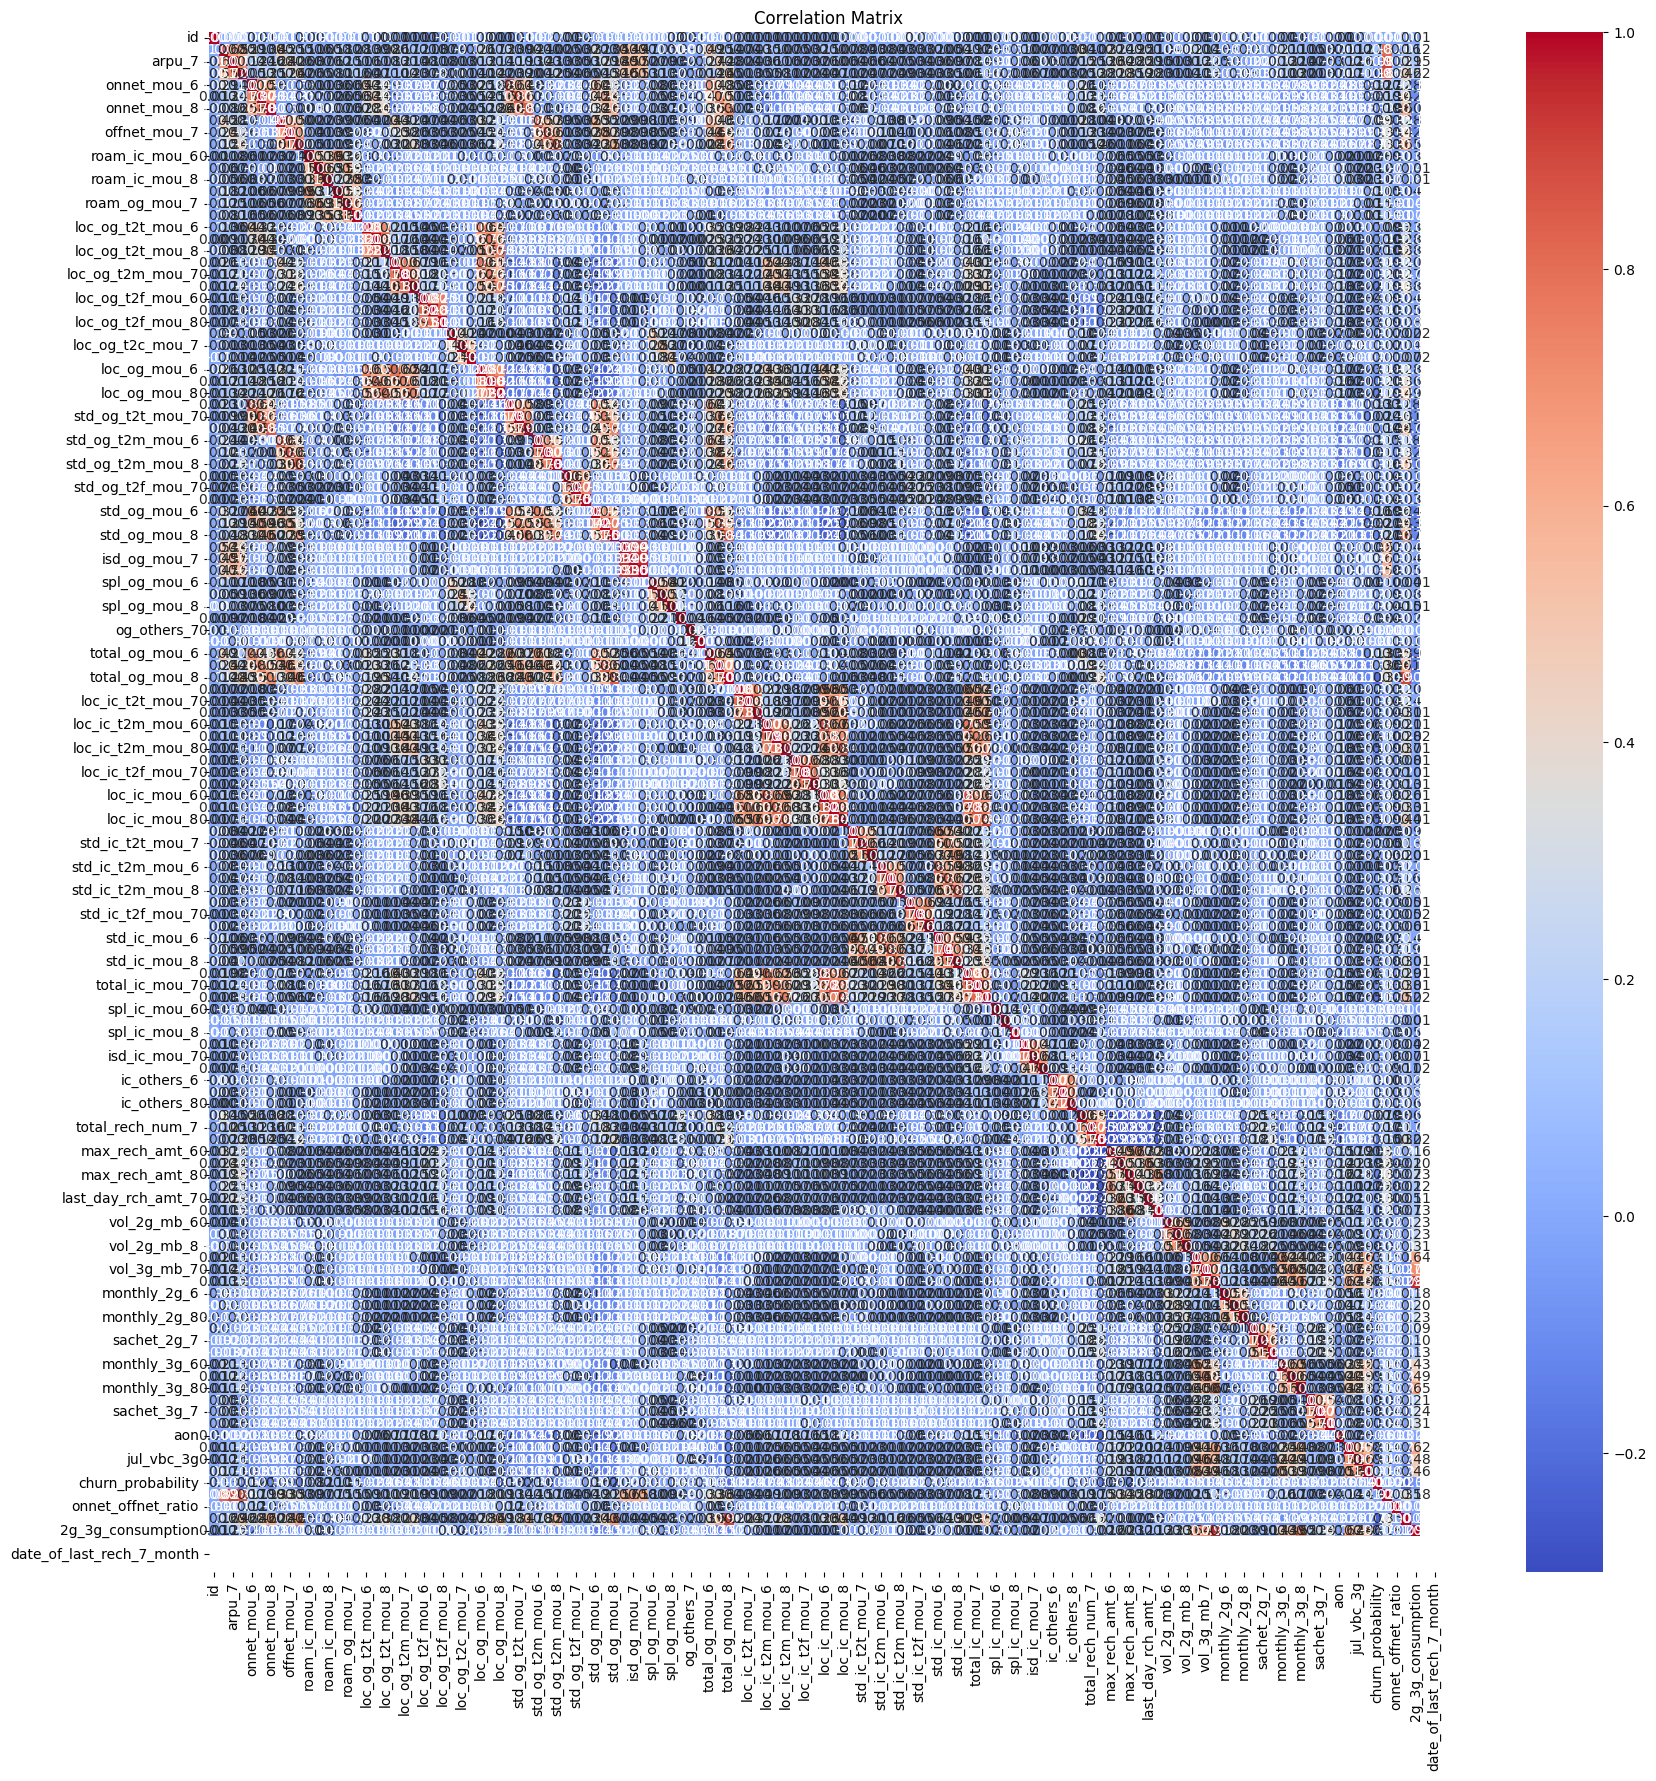

Highly correlated pairs:
loc_og_t2t_mou_7 and loc_og_t2t_mou_6 with correlation 0.81
loc_og_t2t_mou_8 and loc_og_t2t_mou_7 with correlation 0.82
loc_og_t2m_mou_8 and loc_og_t2m_mou_7 with correlation 0.80
loc_og_t2f_mou_7 and loc_og_t2f_mou_6 with correlation 0.82
loc_og_t2f_mou_8 and loc_og_t2f_mou_7 with correlation 0.81
loc_og_mou_7 and loc_og_mou_6 with correlation 0.81
loc_og_mou_8 and loc_og_mou_7 with correlation 0.82
std_og_t2t_mou_6 and onnet_mou_6 with correlation 0.85
std_og_t2t_mou_7 and onnet_mou_7 with correlation 0.85
std_og_t2t_mou_8 and onnet_mou_8 with correlation 0.85
std_og_t2m_mou_6 and offnet_mou_6 with correlation 0.82
std_og_t2m_mou_7 and offnet_mou_7 with correlation 0.85
std_og_t2m_mou_8 and offnet_mou_8 with correlation 0.86
isd_og_mou_7 and isd_og_mou_6 with correlation 0.94
isd_og_mou_8 and isd_og_mou_6 with correlation 0.93
isd_og_mou_8 and isd_og_mou_7 with correlation 0.95
total_og_mou_6 and std_og_mou_6 with correlation 0.82
total_og_mou_7 and std_og_mo

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def get_highly_correlated_pairs(corr_matrix, threshold=0.75):
    highly_correlated_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                highly_correlated_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
    return highly_correlated_pairs

# Calculate the correlation matrix
correlation_matrix = train_cleaned_filtered_no_outliers.corr()

# Visualize the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Get pairs of highly correlated features
highly_correlated_pairs = get_highly_correlated_pairs(correlation_matrix, threshold=0.8)
print("Highly correlated pairs:")
for pair in highly_correlated_pairs:
    print(f"{pair[0]} and {pair[1]} with correlation {pair[2]:.2f}")


In [ ]:
# List of highly correlated pairs (right-side features to drop)
features_to_drop = [
    'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7',
    'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_mou_6',
    'loc_og_mou_7', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
    'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'isd_og_mou_6',
    'isd_og_mou_6', 'isd_og_mou_7', 'std_og_mou_6', 'std_og_mou_7',
    'std_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
    'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',
    'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_mou_7',
    'loc_ic_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7',
    'std_ic_t2m_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'total_ic_mou_6',
    'loc_ic_mou_8', 'total_ic_mou_7', 'arpu_6', 'arpu_7', 'arpu_8',
    'total_og_mou_8', 'vol_3g_mb_8'
]


# Drop the identified features from the dataset
train_cleaned_filtered_no_outliers = train_cleaned_filtered_no_outliers.drop(columns=features_to_drop)

# Verify the new shape of the dataset
print("Shape of the dataset after dropping highly correlated features:", train_cleaned_filtered_no_outliers.shape)


Shape of the dataset after dropping highly correlated features: (17523, 94)


In [ ]:
train_cleaned_filtered_no_outliers.columns


Index(['id', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7',
       'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8',
       'total_og_mou_6', 'total_og_mou_7', 'loc_ic_t2t_mou_8',
       'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
       'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
       'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
       'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_8',
       'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_

In [ ]:
X = train_cleaned_filtered_no_outliers.drop(columns=['churn_probability'])
y = train_cleaned_filtered_no_outliers['churn_probability']

# Replace infinity values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Verify replacement
print("Number of infinity values:", np.isinf(X).sum().sum())

# Check for any NaN values in the entire DataFrame
print("Number of NaN values in the dataset:", X.isnull().sum().sum())

# Check which columns have NaN values and their count
nan_counts = X.isnull().sum()
print("Columns with NaN values:\n", nan_counts[nan_counts > 0])

# Impute missing values for numerical columns with the median
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
imputer_num = SimpleImputer(strategy='median')
X[numerical_cols] = imputer_num.fit_transform(X[numerical_cols])

# Verify that there are no missing values after imputation
print("Number of NaN values after imputation:", X.isnull().sum().sum())

Number of infinity values: 0
Number of NaN values in the dataset: 158
Columns with NaN values:
 onnet_offnet_ratio    158
dtype: int64
Number of NaN values after imputation: 0


In [ ]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


RandomForestClassifier(random_state=42)

[[3403    0]
 [   0  102]]


NameError: name 'classification_report' is not defined

In [ ]:
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(14018, 93)

(14018,)

(3505, 93)

(3505,)

<Axes: xlabel='churn_probability', ylabel='Count'>

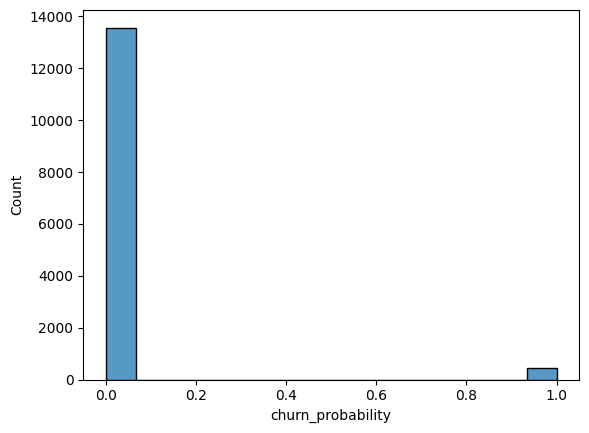

In [ ]:
#Distribution for the churn probability
sns.histplot(y_train)

PCA - Principal Component Analysis

In [ ]:
pca = PCA()
pca_components = pca.fit_transform(X_train)

<Axes: >

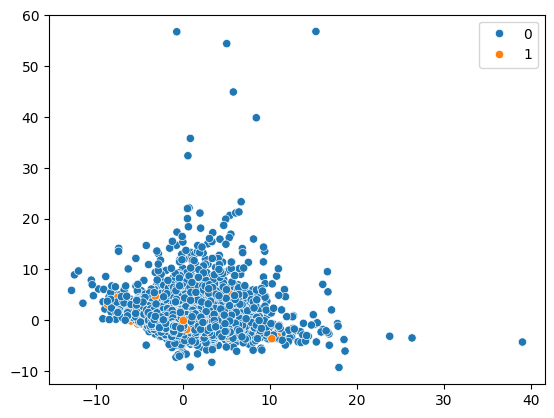

In [ ]:
#PCA Components 0 and 1
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1], hue=y_train.to_numpy().reshape(-1,))

<Axes: >

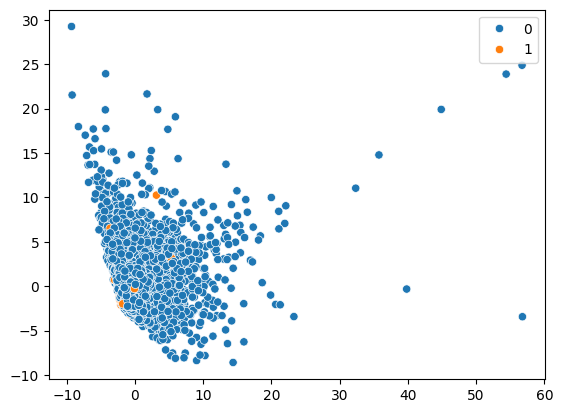

In [ ]:
sns.scatterplot(x=pca_components[:,1], y=pca_components[:,2], hue=y_train.to_numpy().reshape(-1,))

<Axes: >

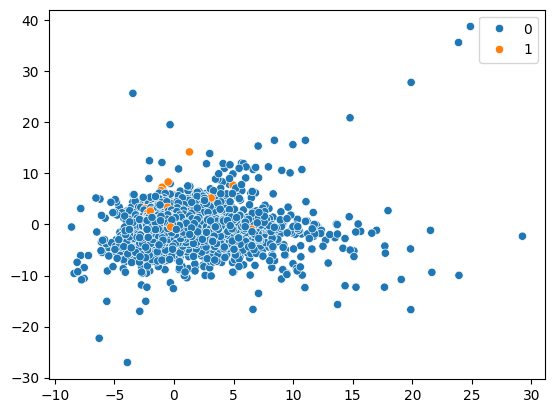

In [ ]:
sns.scatterplot(x=pca_components[:,2], y=pca_components[:,3], hue=y_train.to_numpy().reshape(-1,))

<Figure size 875x500 with 0 Axes>

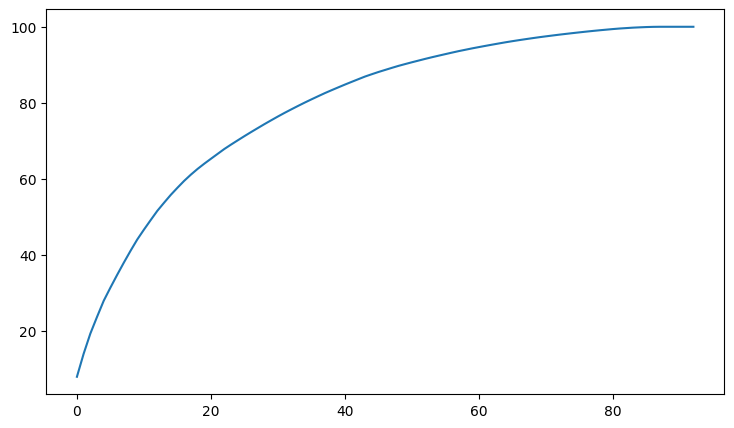

In [ ]:
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20, 100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

In [ ]:
#lets find out which features/component s have a high importance towards churn prediction

In [ ]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf.fit(pca_components, y_train)

RandomForestClassifier(n_jobs=-1)

<Figure size 1500x800 with 0 Axes>

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

<BarContainer object of 93 artists>

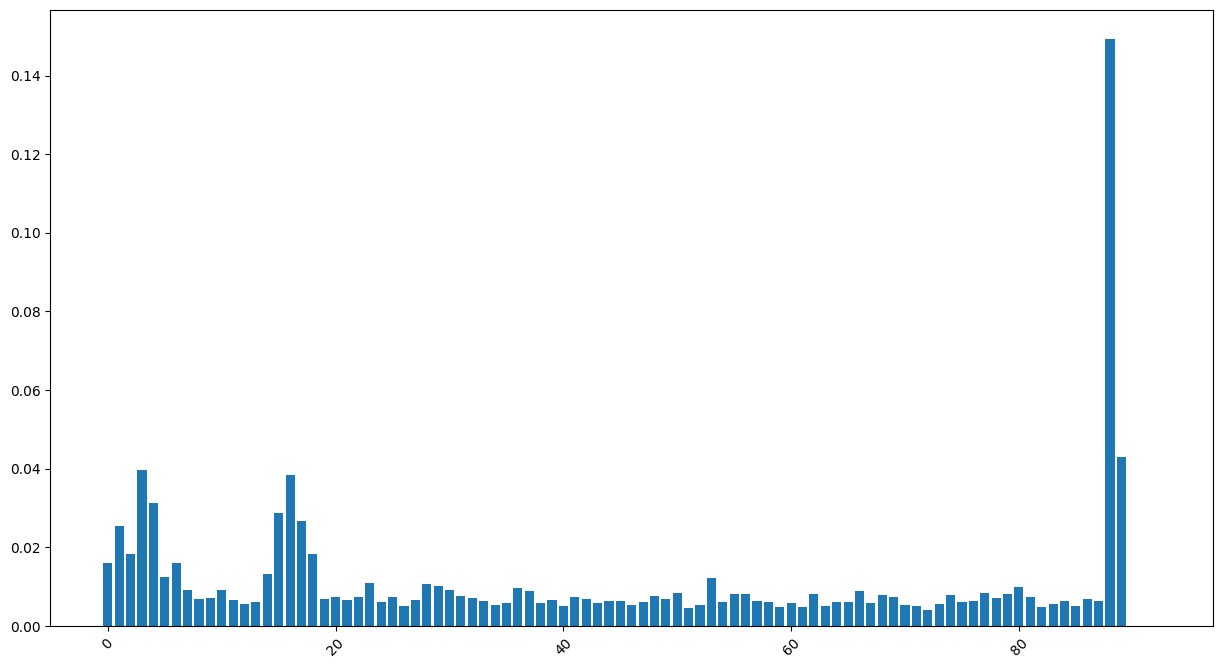

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
plt.bar(x = [i for i in range(len(rf.feature_importances_))], height=rf.feature_importances_)

Model Building will be done using the following:


*   Random Forest
*   PCA
*   Logistic Regression





In [ ]:
lr = LogisticRegression(max_iter=1000, tol=0.001, solver='sag')
lr.fit(pca_components[:,:2], y_train)

LogisticRegression(max_iter=1000, solver='sag', tol=0.001)

In [ ]:
lr.score(pca_components[:,:2], y_train)

0.9681124268797261

Score has 96.8% accuracy, now lets make a pipeleine to score model faster



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


# Create Pipeline with Scaler, PCA, and modeling with LogisticRegression
PCA_VARS = 60
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight = 'balanced'))
        ]
pipeline_pca_rl = Pipeline(steps)

# fit model
pipeline_pca_rl.fit(X_train, y_train)

# check score on train data
pipeline_pca_rl.score(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=60)),
                ('logistic', LogisticRegression(class_weight='balanced'))])

0.9800256812669424

In [ ]:
from sklearn.metrics import f1_score
# predict churn on test data
y_pred = pipeline_pca_rl.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Check Precision, Accuracy, Recall and F1-Score
print("Precision: ", round(precision_score(y_test, y_pred),4))
print("Accuracy: ",  round(accuracy_score(y_test, y_pred),4))
print("Recall: ",    round(recall_score(y_test, y_pred),4))
print("F1-Score: ",  round(f1_score(y_test, y_pred),4))

# Check area under curve
y_pred_prob = pipeline_pca_rl.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),4))

[[3338   65]
 [   2  100]]
Precision:  0.6061
Accuracy:  0.9809
Recall:  0.9804
F1-Score:  0.7491
AUC:    	 0.9961


In [ ]:
y_train.value_counts() / y_train.shape

churn_probability
0    0.968184
1    0.031816
Name: count, dtype: float64

In [ ]:
from sklearn.model_selection import StratifiedKFold
pca = PCA()

# Logistic Regression - the class weight is used to handle class imbalance
# It adjusts the cost function
logistic = LogisticRegression(class_weight={0: 0.1, 1: 0.9})

# Create pipeline
steps = [("scaler", StandardScaler()),
         ("pca", pca),
         ("logistic", logistic)
        ]

# Compile Pipeline
pipeline_pca_rl_tunned = Pipeline(steps)

# Hyperparameter Space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# Create 5 Folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
rl_model_tunned = GridSearchCV(estimator=pipeline_pca_rl_tunned, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [ ]:
# Fit Model
rl_model_tunned.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             scoring='roc_auc', verbose=1)

In [ ]:
# Cross Validation Results
pd.DataFrame(rl_model_tunned.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.631889      0.090083         0.000000        0.000000   
1        0.334515      0.055918         0.000000        0.000000   
2        0.709513      0.101558         0.015172        0.004630   
3        0.353315      0.025495         0.014120        0.001814   
4        0.461015      0.017370         0.000000        0.000000   
5        0.296187      0.040259         0.000000        0.000000   
6        0.957870      0.076504         0.025488        0.006202   
7        0.722536      0.074615         0.028484        0.001584   
8        0.600072      0.073943         0.000000        0.000000   
9        0.233674      0.018737         0.000000        0.000000   
10       0.573403      0.031390         0.011351        0.000948   
11       0.463918      0.017517         0.012024        0.000549   
12       0.423153      0.014313         0.000000        0.000000   
13       0.221586      0.007851         0.000000        0.000000   
14       0.694151      0.045880         0.014565        0.006439   
15       0.521118      0.014711         0.011863        0.000657   
16       0.402673      0.015284         0.000000        0.000000   
17       0.225622      0.022328         0.000000        0.000000   
18       1.205483      0.260086         0.020338        0.003161   
19       1.060925      0.216347         0.026347        0.005437   
20       0.566808      0.148995         0.000000        0.000000   
21       0.232537      0.010243         0.000000        0.000000   
22       0.674031      0.039169         0.012634        0.001097   
23       0.532329      0.022189         0.012457        0.001157   
24       0.396197      0.008719         0.000000        0.000000   
25       0.225640      0.017656         0.000000        0.000000   
26       0.981240      0.252004         0.017291        0.005978   
27       1.359235      0.104029         0.027939        0.005177   
28       0.994054      0.088582         0.000000        0.000000   
29       0.447092      0.046254         0.000000        0.000000   
30       1.144269      0.065412         0.021255        0.004586   
31       0.590151      0.089719         0.012628        0.002673   

   param_logistic__C param_logistic__penalty param_pca__n_components  \
0                0.1                      l1                      60   
1                0.1                      l1                      80   
2                0.1                      l2                      60   
3                0.1                      l2                      80   
4                0.5                      l1                      60   
5                0.5                      l1                      80   
6                0.5                      l2                      60   
7                0.5                      l2                      80   
8                  1                      l1                      60   
9                  1                      l1                      80   
10                 1                      l2                      60   
11                 1                      l2                      80   
12                 2                      l1                      60   
13                 2                      l1                      80   
14                 2                      l2                      60   
15                 2                      l2                      80   
16                 3                      l1                      60   
17                 3                      l1                      80   
18                 3                      l2                      60   
19                 3                      l2                      80   
20                 4                      l1                      60   
21                 4                      l1                      80   
22                 4                      l2                      60   
23                 4           

In [ ]:
# Print Best Hyperparameters
print("Best AUC: ", rl_model_tunned.best_score_)
print("Best HyperParameters: ", rl_model_tunned.best_params_)

Best AUC:  0.9969290494838148
Best HyperParameters:  {'logistic__C': 10, 'logistic__penalty': 'l2', 'pca__n_components': 80}


In [ ]:
# Predict Churn on Train.Test Data
y_pred = rl_model_tunned.predict(X_test)

# Create Confusion Matrix again
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Check Precision, Accuracy, Recall and F1-Score
print("Precision: ", round(precision_score(y_test, y_pred),4))
print("Accuracy: ",  round(accuracy_score(y_test, y_pred),4))
print("Recall: ",    round(recall_score(y_test, y_pred),4))
print("F1-Score: ",  round(f1_score(y_test, y_pred),4))

# Check area under curve
y_pred_prob = rl_model_tunned.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),4))

[[3365   38]
 [   1  101]]
Precision:  0.7266
Accuracy:  0.9889
Recall:  0.9902
F1-Score:  0.8382
AUC:    	 0.9987


In [ ]:
#pycarat
# U-map
#Bayesian search
#feature engine - Library
#convert wideform to long form unstack

